# Labolatorium 5: Modele segregacji przestrzennej

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 Model Schellinga

In [56]:
def generate_matrix(L,p,t = 2):
    shape = (L,L)
    matrix = np.zeros(shape)
    p = 0.5

    for i in range(L):
        for j in range(L):
            occupied = np.random.choice(2, p=[p,1-p])
            if occupied == 0:
                matrix[i][j] = np.random.choice(list(range(1,t+1)))
    return matrix

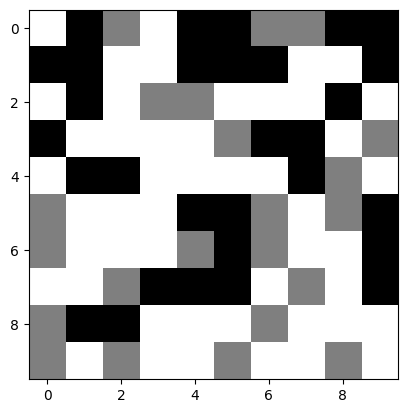

In [57]:
matrix = generate_matrix(10,0.5)

plt.imshow(matrix, cmap='binary', vmin=0, vmax=2, interpolation='nearest')

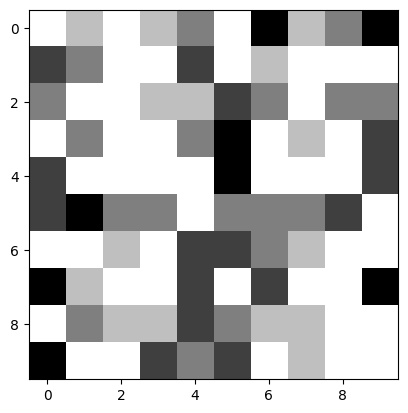

In [58]:
matrix = generate_matrix(10,0.5,t=4)

plt.imshow(matrix, cmap='binary', vmin=0, vmax=4, interpolation='nearest')

In [26]:
from collections import defaultdict


def count_neighbors(matrix, x,y):
    L,_ = matrix.shape
    neighbors = 0
    for i in [x-1,x,x+1]:
        for j in [y-1,y,y+1]:
            if not (i == x and j == y):
                if matrix[i%L][j%L] == matrix[x][y]:
                    neighbors += 1
    return neighbors

def find_empty(matrix, x, y):
    L,_ = matrix.shape
    empty = []
    for i in [x-1,x,x+1]:
        for j in [y-1,y,y+1]:
            if not (i == x and j == y):
                if matrix[i%L][j%L] == 0:
                    empty.append((i%L,j%L))
    return empty


def remove_conflicts(moves):
    counts = defaultdict(lambda: 0)
    for dest,_ in moves:
        counts[dest] += 1
    
    moves = dict(moves)
    for dest,count in counts.items():
        if count > 1:
            del moves[dest]
    
    return moves.items()

def evolve(matrix,a):
    L,_ = matrix.shape
    moves = []
    neighbors_sum = 0
    neighbors_n = 0
    for i in range(L):
        for j in range(L):
            neighbors = count_neighbors(matrix,i,j)
            neighbors_sum += neighbors
            neighbors_n += 1
            if neighbors < a:
                empty = find_empty(matrix,i,j)
                n_empty = len(empty)
                if n_empty != 0:
                    move_id = np.random.choice(n_empty)
                    move = empty[move_id]
                    moves.append((move,(i,j)))
    
    moves = remove_conflicts(moves)
    
    for dest,org in moves:
        dx,dy = dest
        ox,oy = org
        matrix[dx][dy],matrix[ox][oy] = matrix[ox][oy],matrix[dx][dy]
    
    return matrix, neighbors_sum/neighbors_n



In [102]:
def run_test(L,p,a,t = 2, it=3000):
    fig, axis = plt.subplots(1, 3)
    fig.set_figheight(20)
    fig.set_figwidth(30)
    print(f'L={L} p={p} a={a} t={t}')
    
    matrix = generate_matrix(L,p,t)
    mns = []
    axis[0].imshow(matrix, cmap='binary', vmin=0, vmax=t, interpolation='nearest')
    axis[0].set_title('starting state')

    for _ in range(it):
        matrix, mn = evolve(matrix,a)
        mns.append(mn)

    axis[1].imshow(matrix, cmap='binary', vmin=0, vmax=t, interpolation='nearest')
    axis[1].set_title('final state')
    axis[2].scatter(range(it),mns)
    axis[2].set_title('mean number of neighbors')

In [82]:
test_cases = [(L,p,4,t) for t in [2,4] for L in [20,80,200] for p in [0.35,0.5,0.65] ]

L=20 p=0.35 a=4 t=2


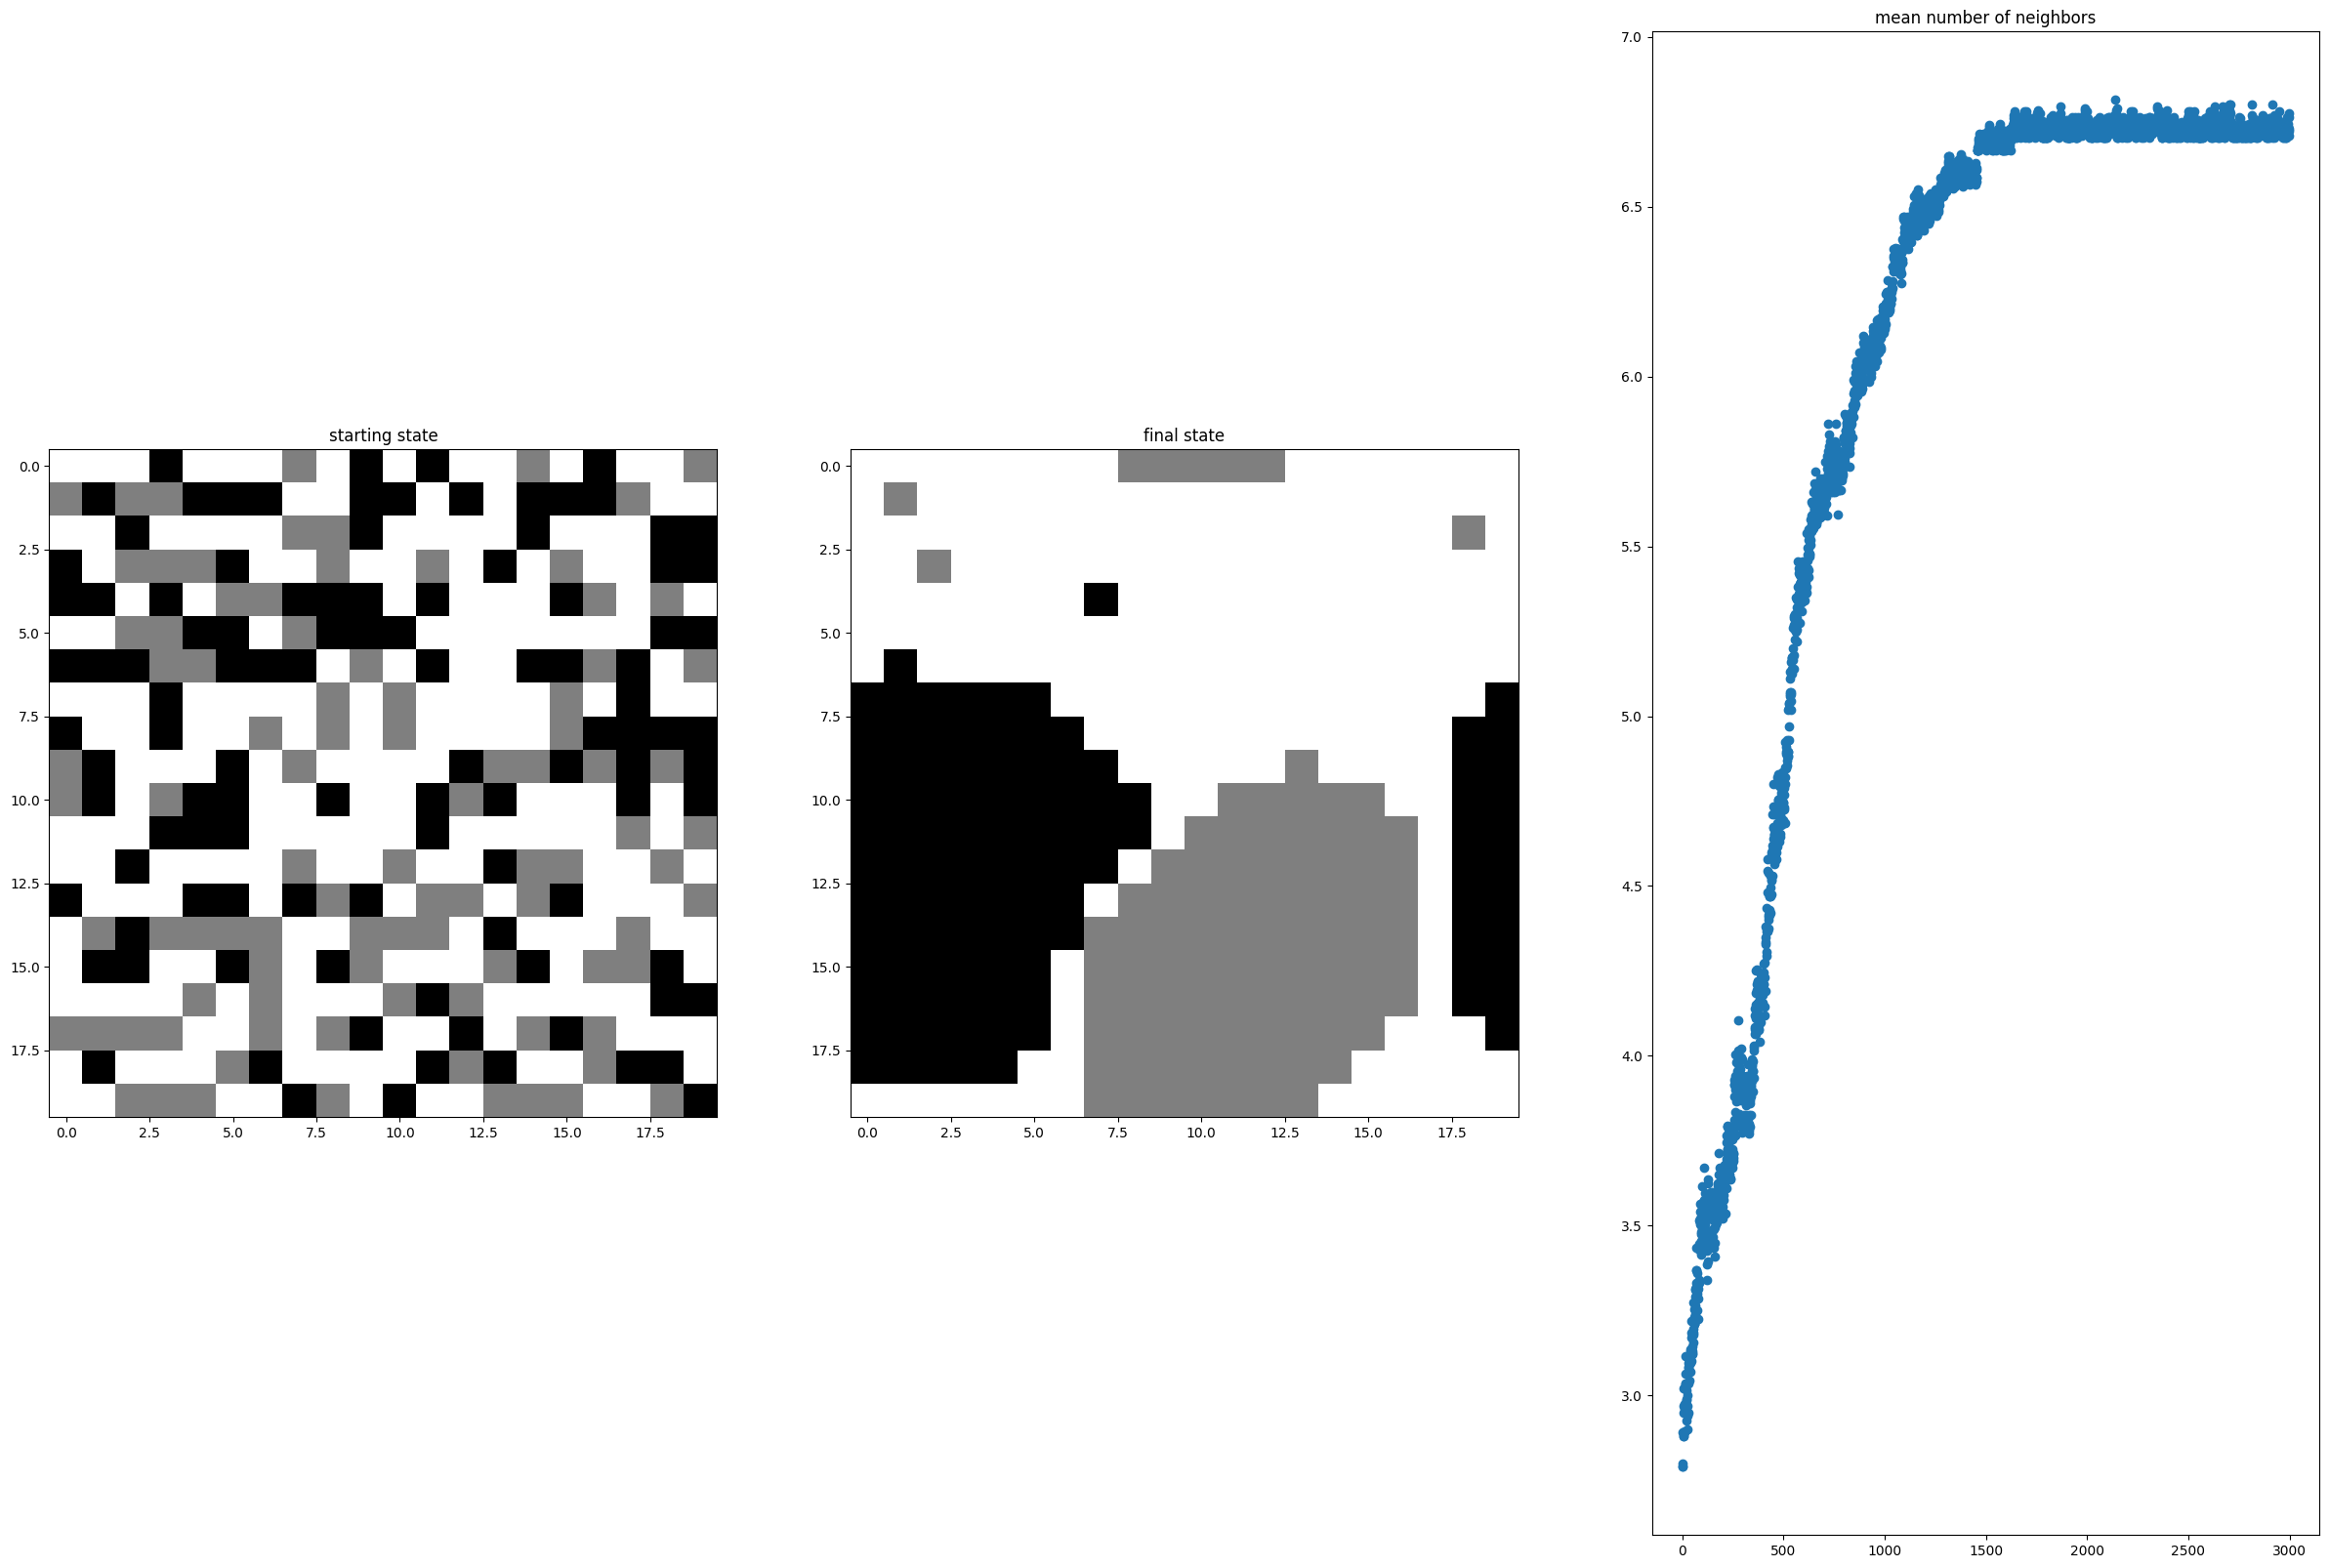

In [86]:
run_test(*test_cases[0])

L=20 p=0.5 a=4 t=2


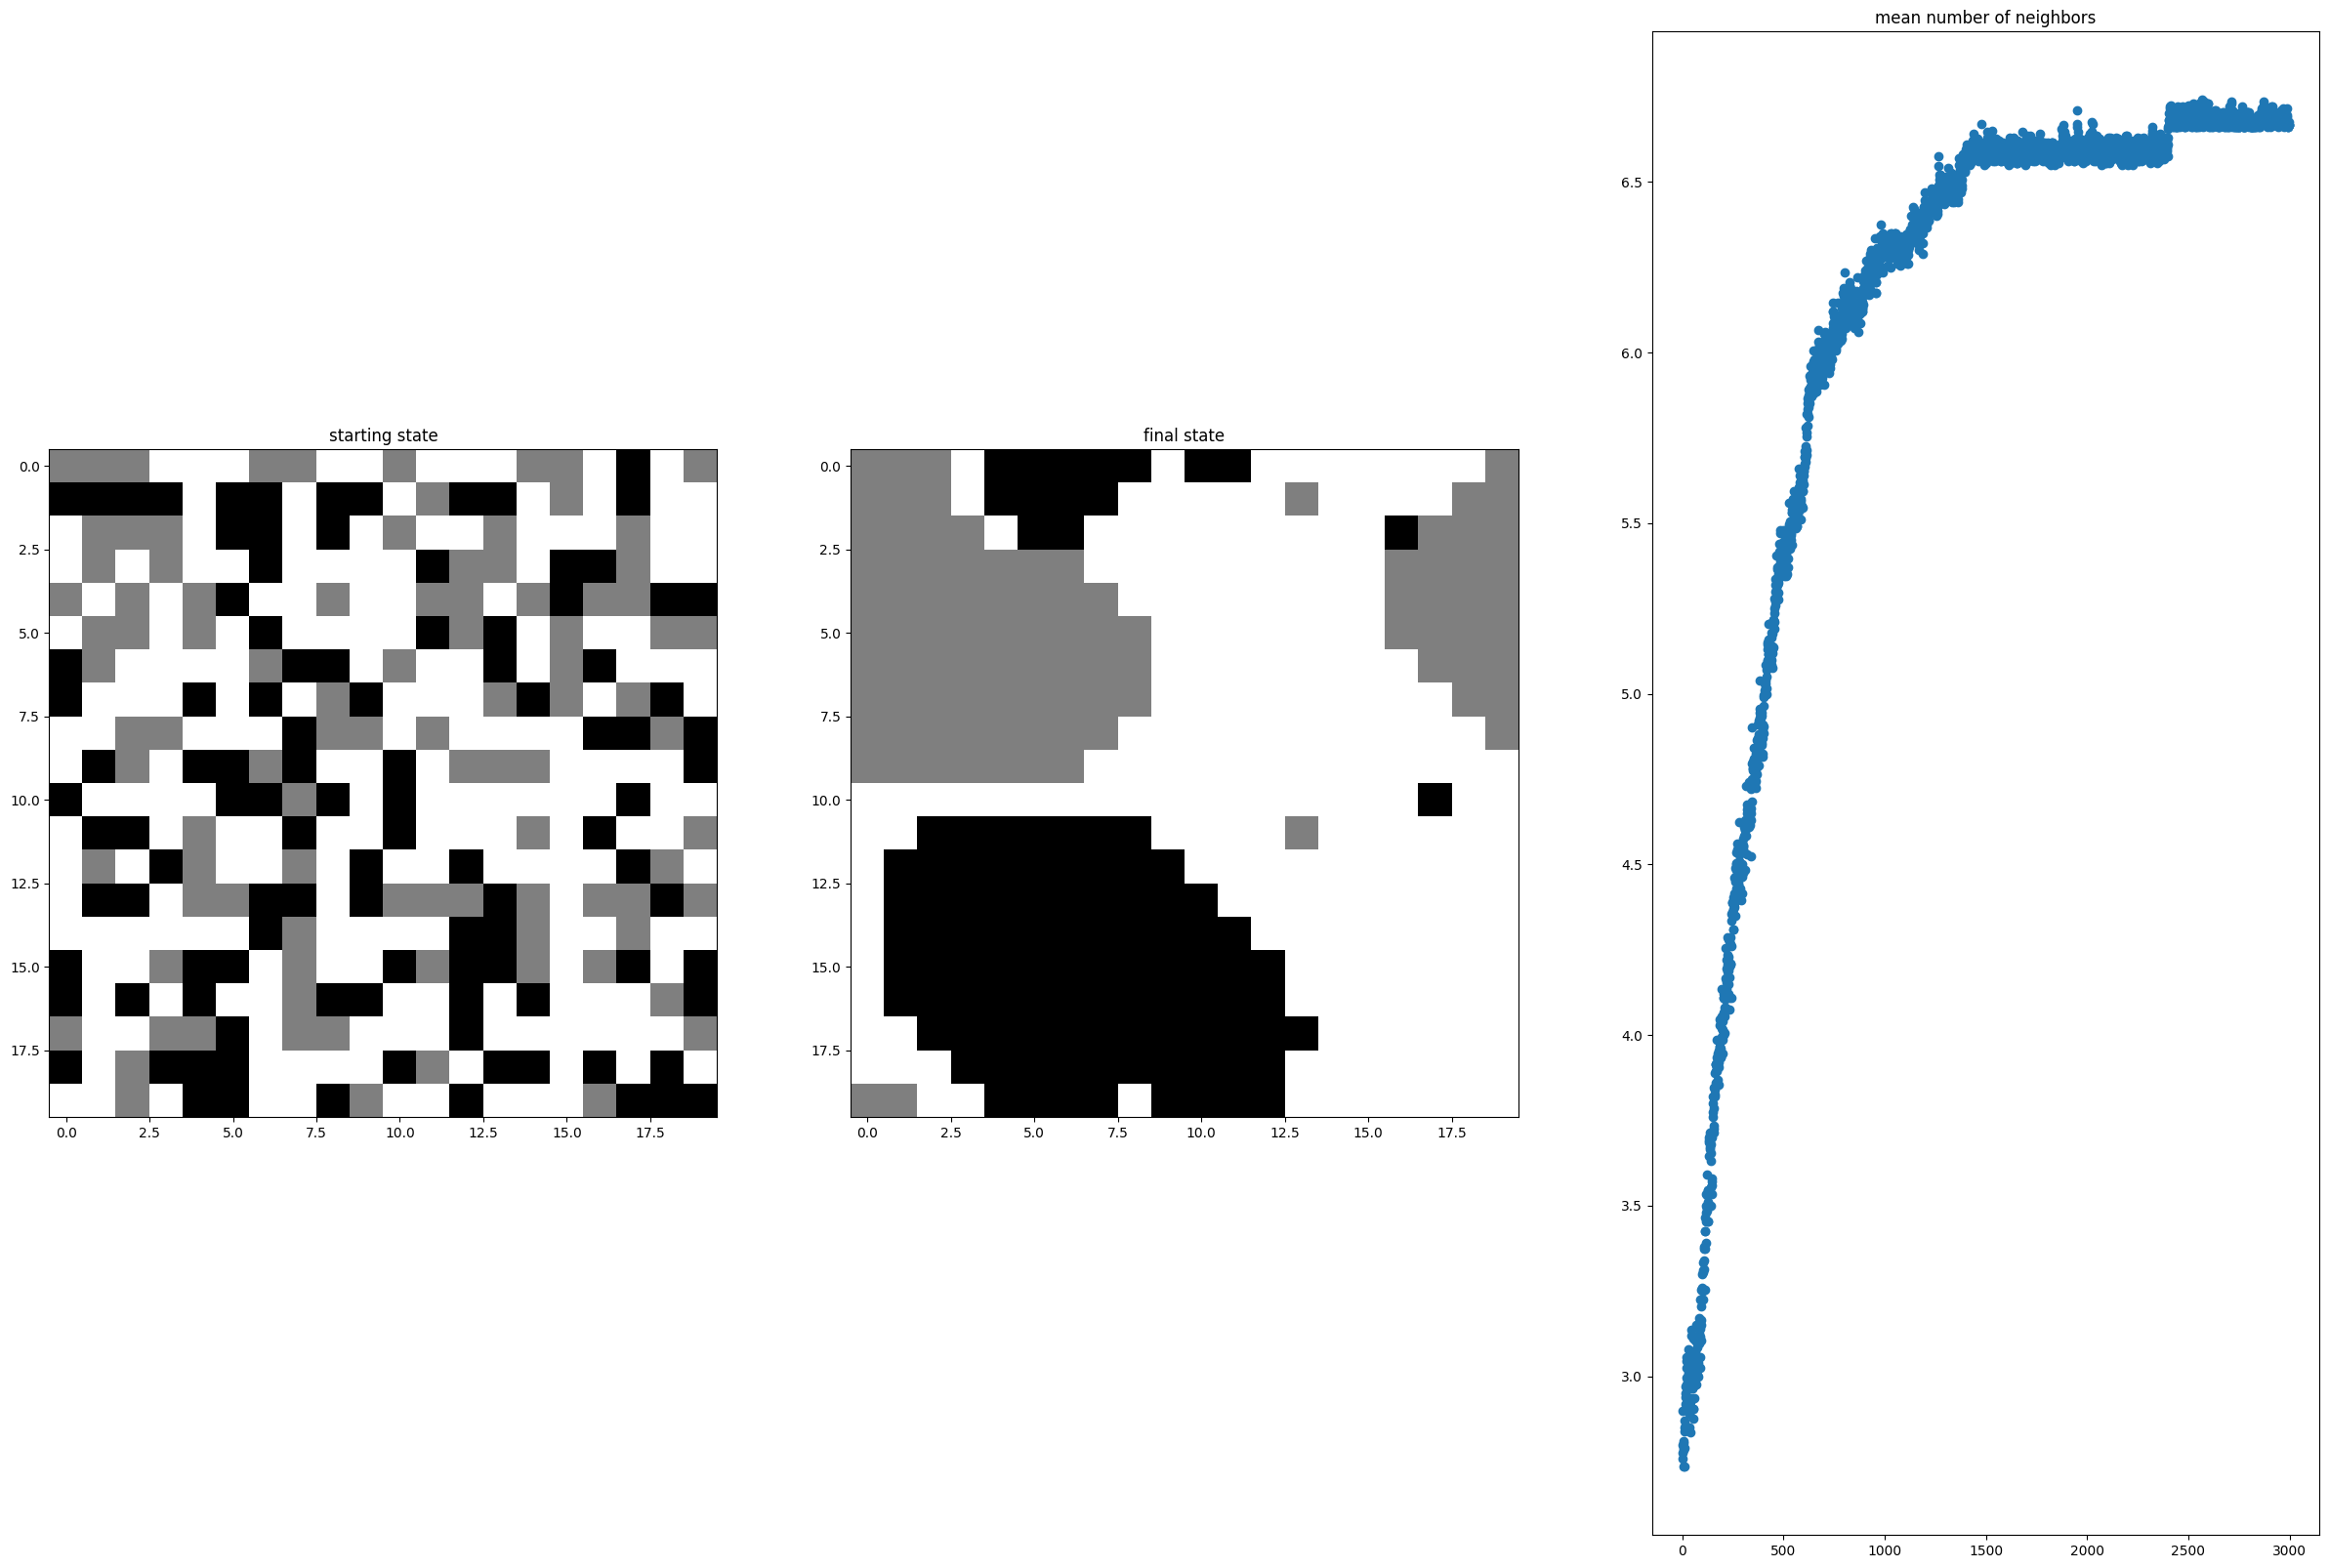

In [87]:
run_test(*test_cases[1])

L=20 p=0.65 a=4 t=2


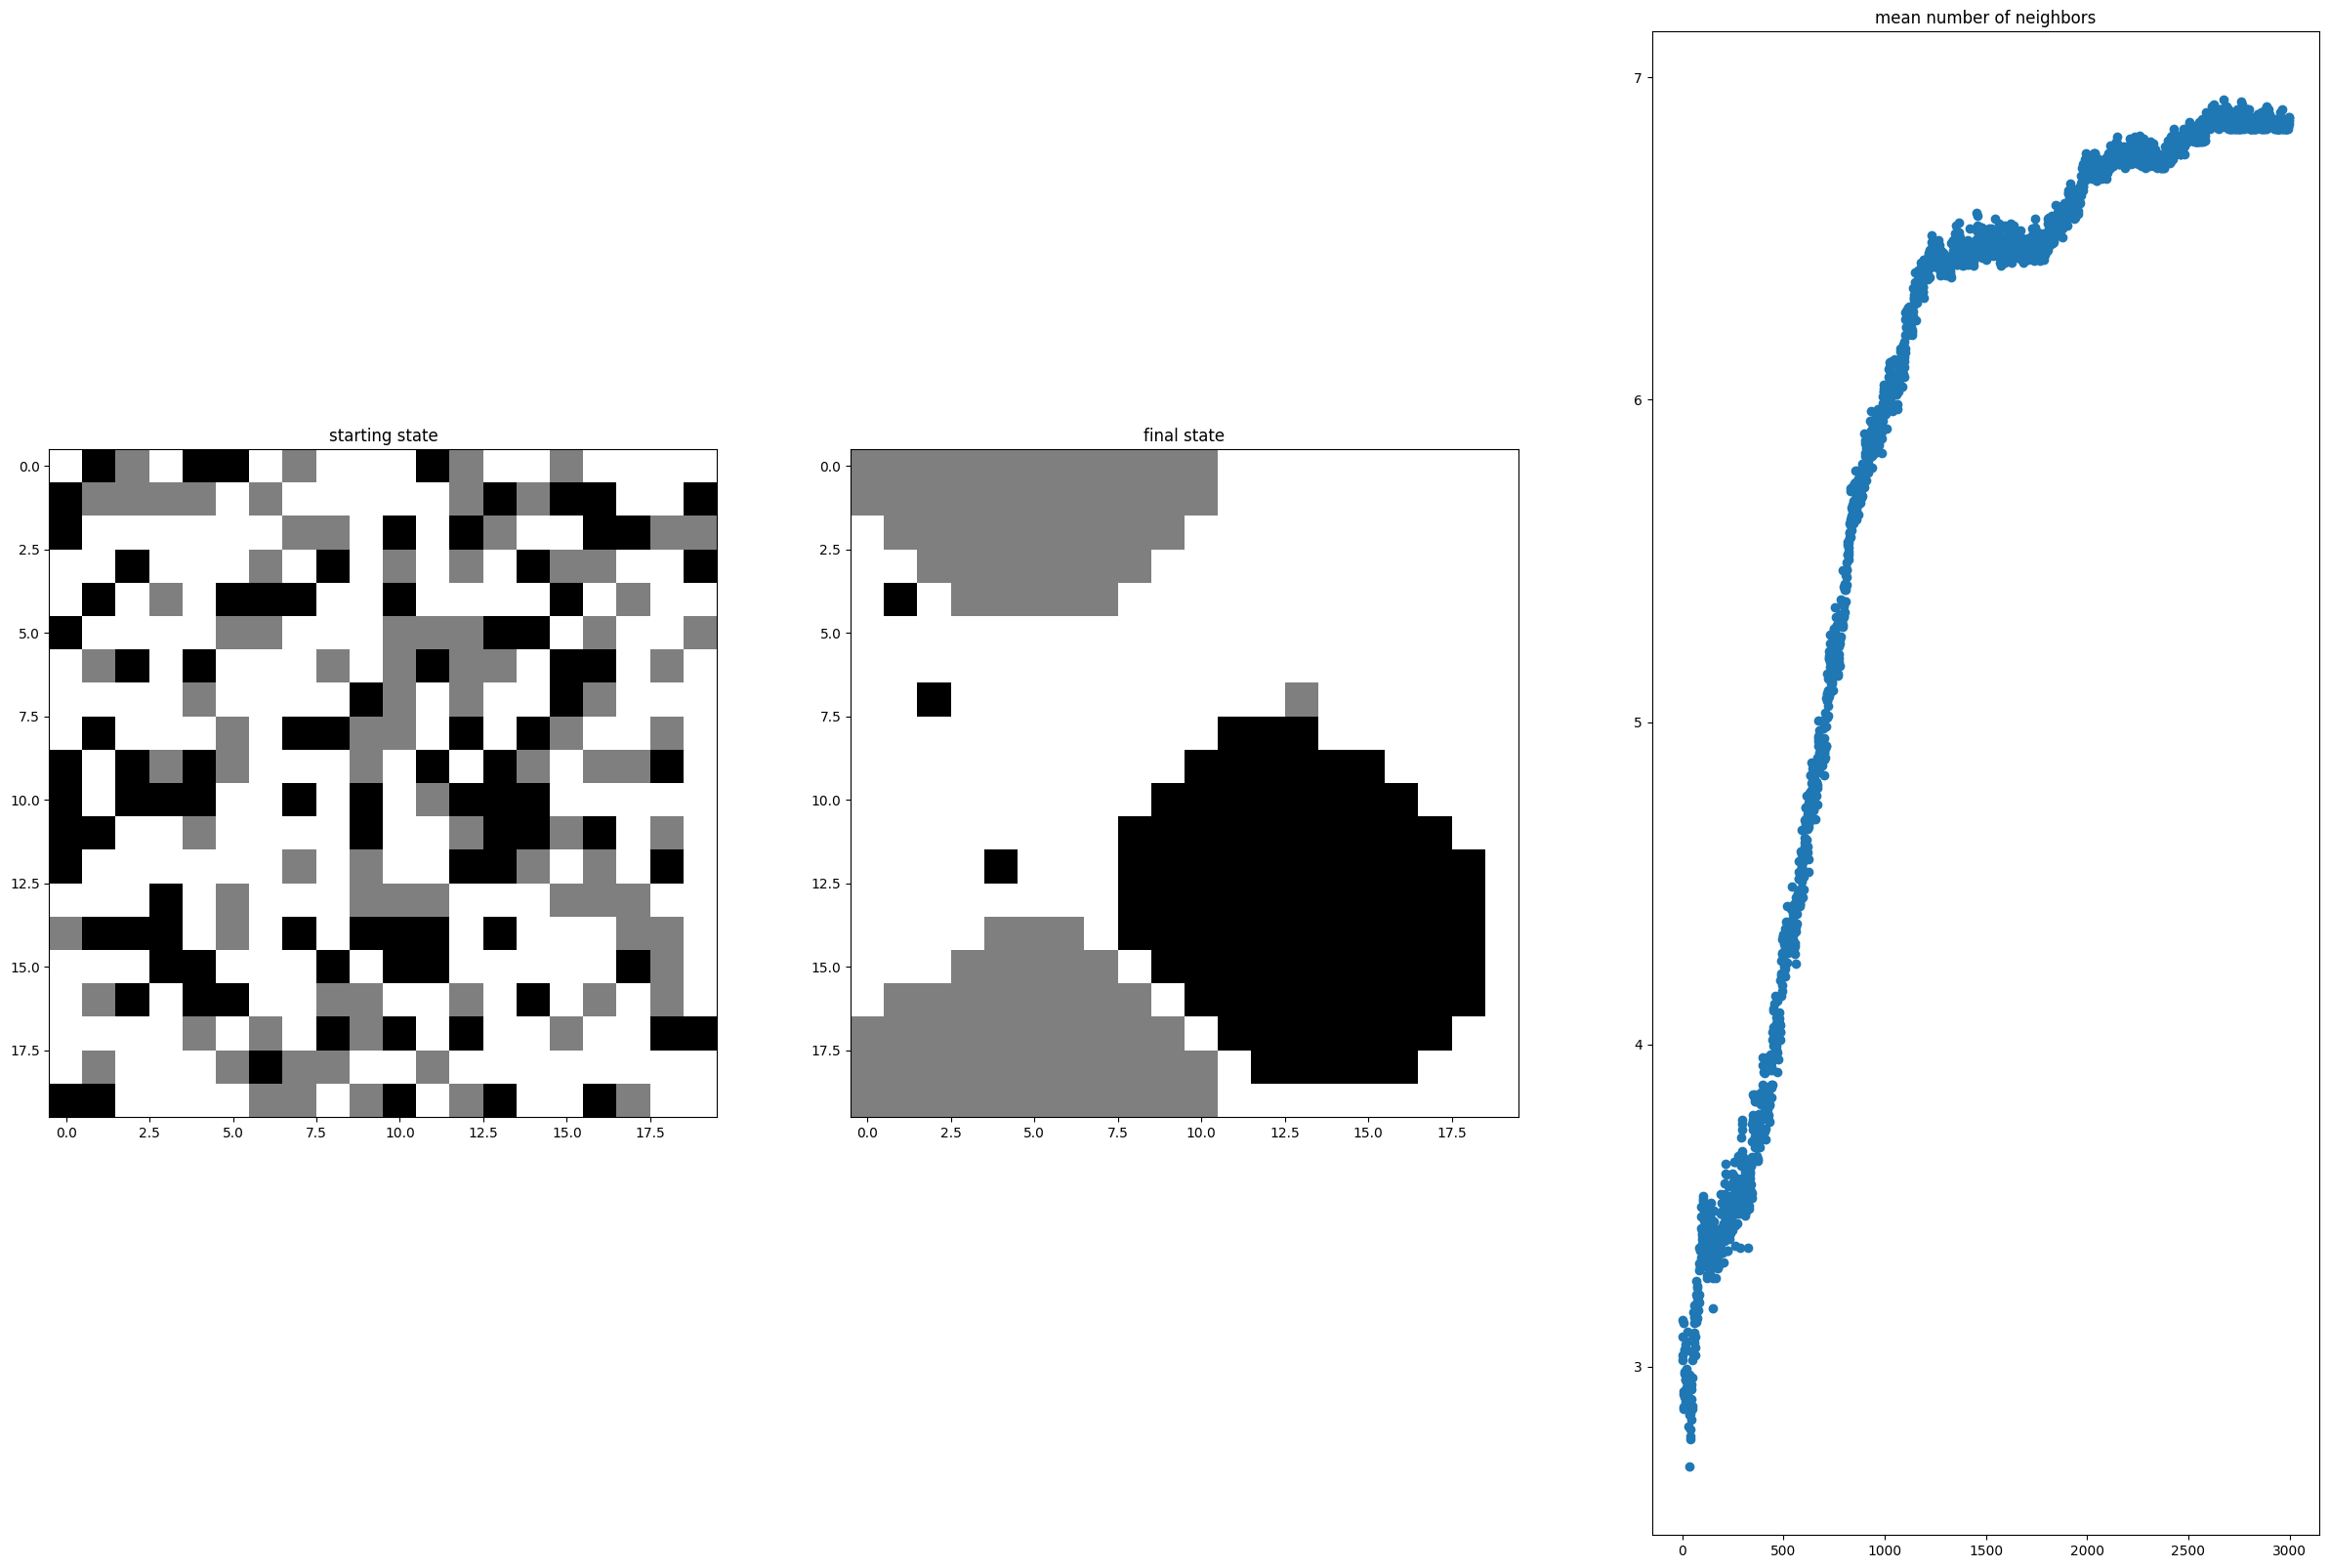

In [88]:
run_test(*test_cases[2])

L=80 p=0.35 a=4 t=2


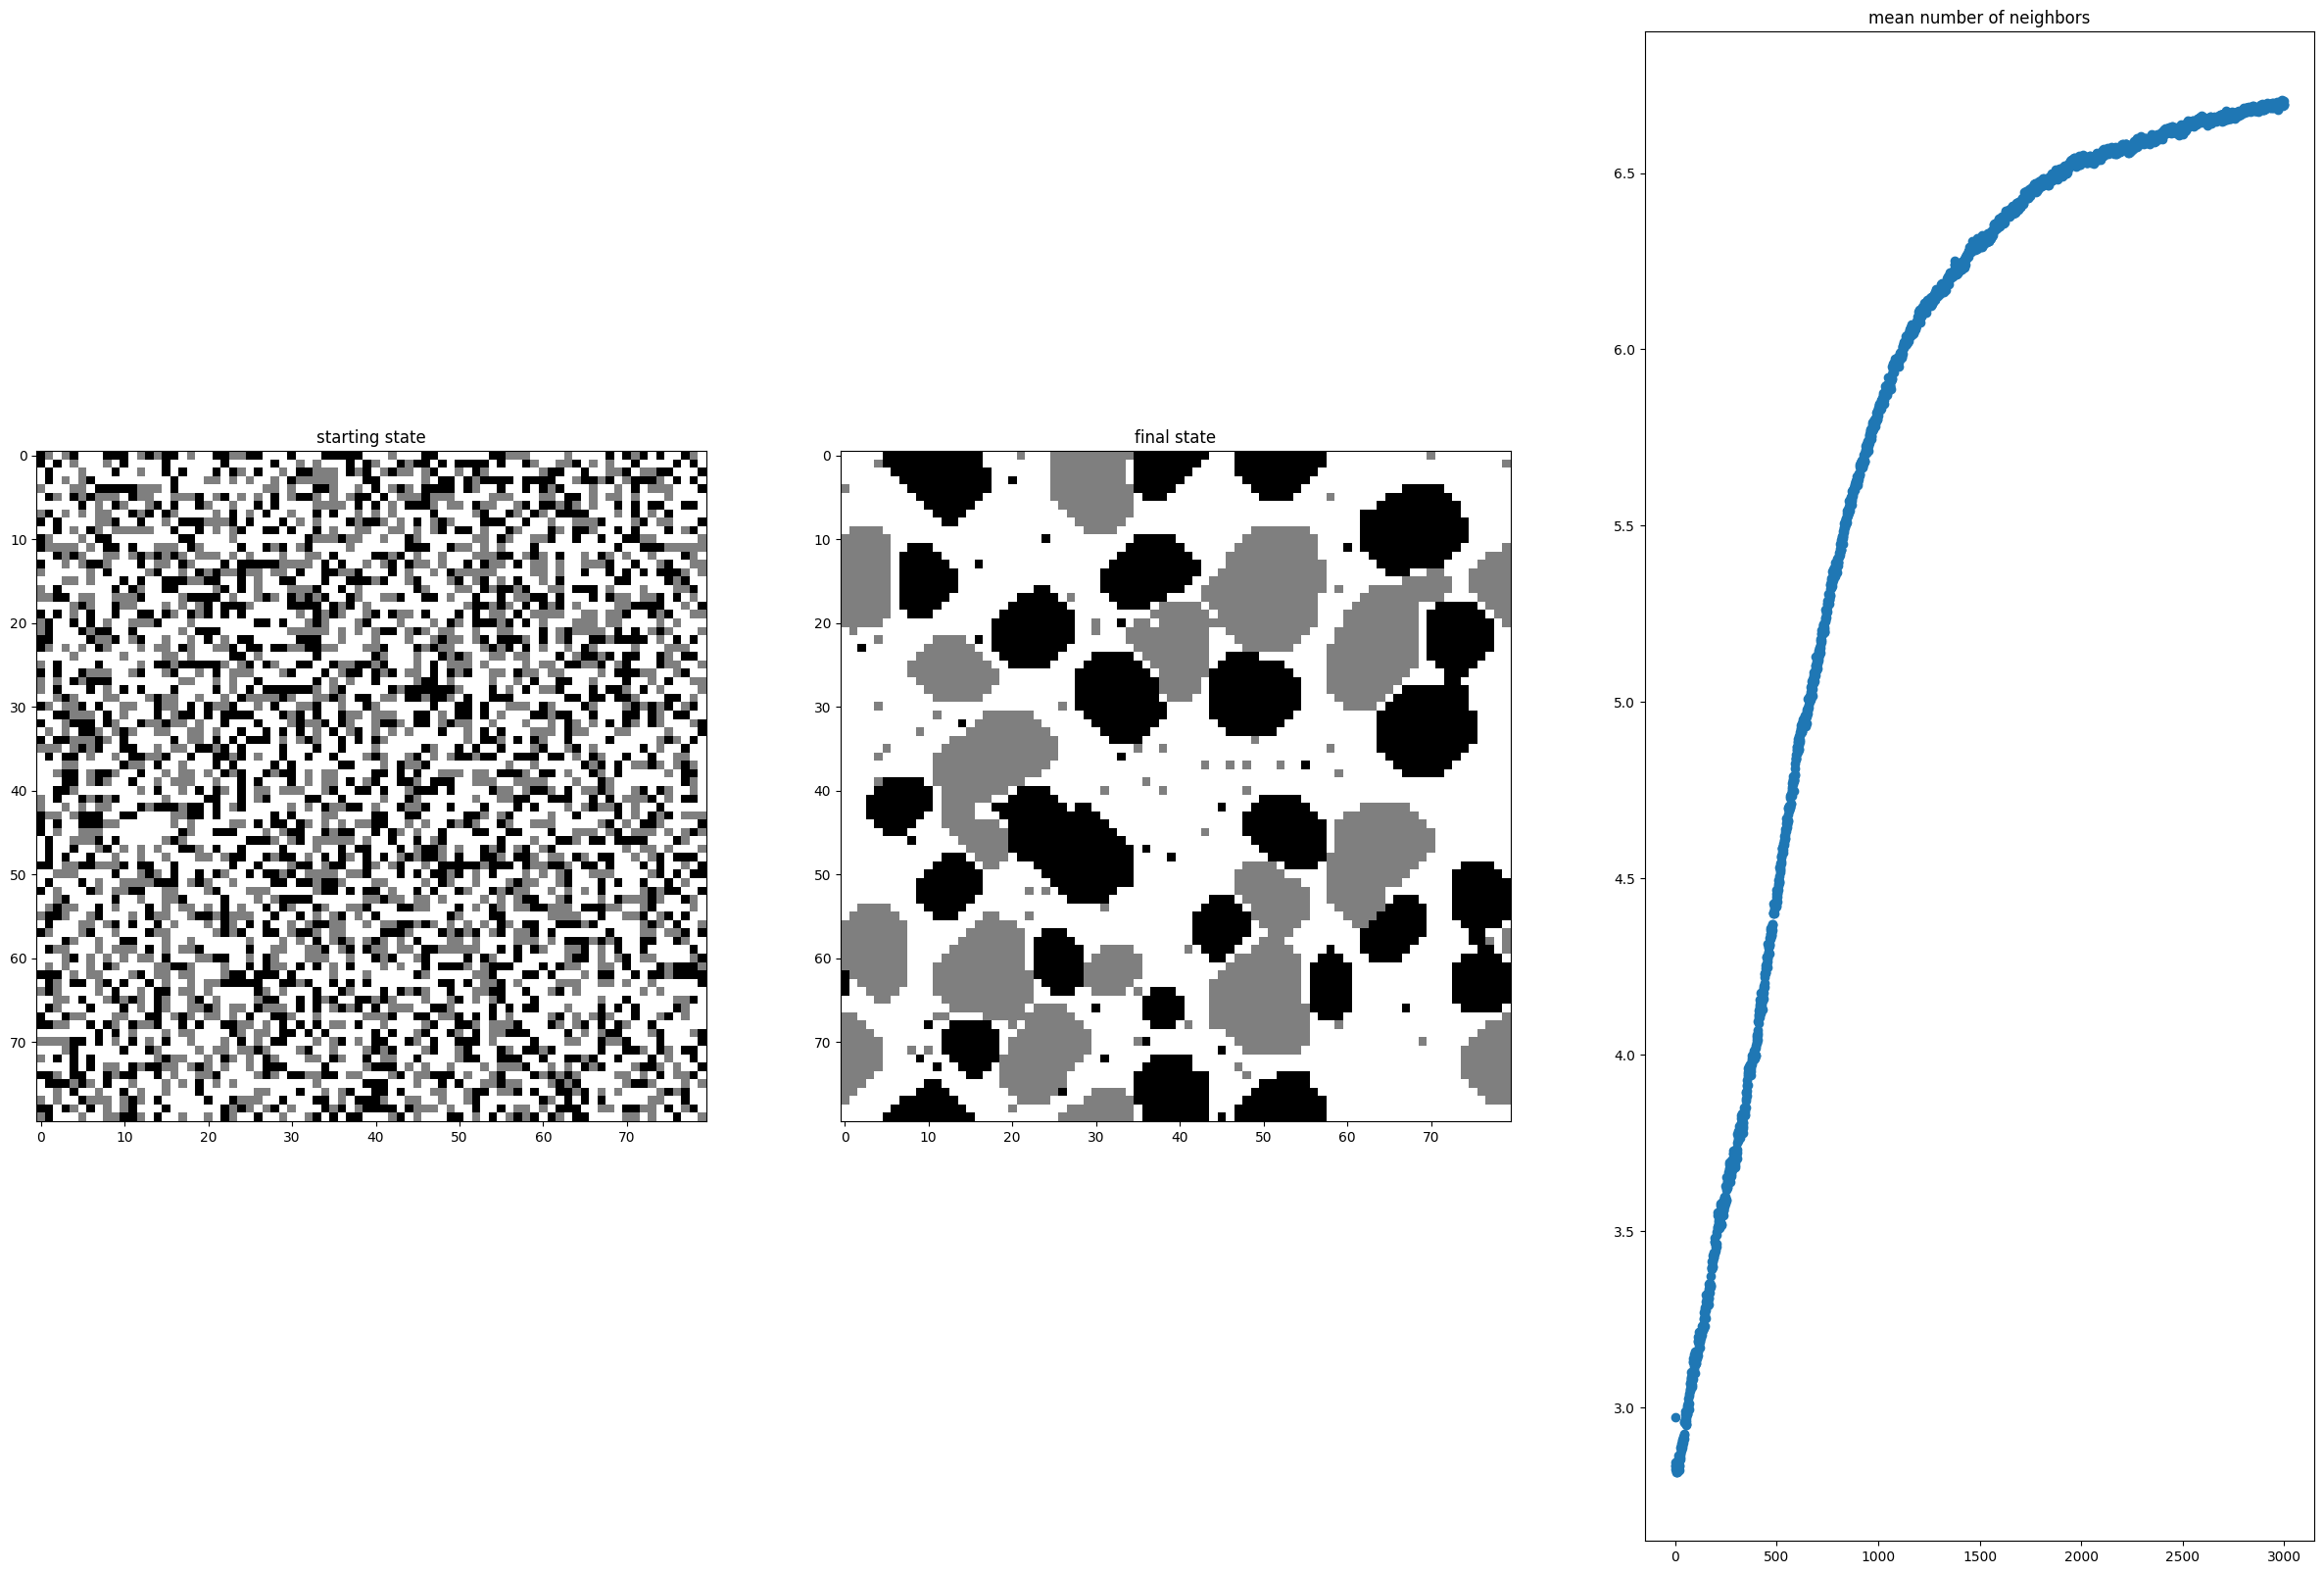

In [89]:
run_test(*test_cases[3])

L=80 p=0.5 a=4 t=2


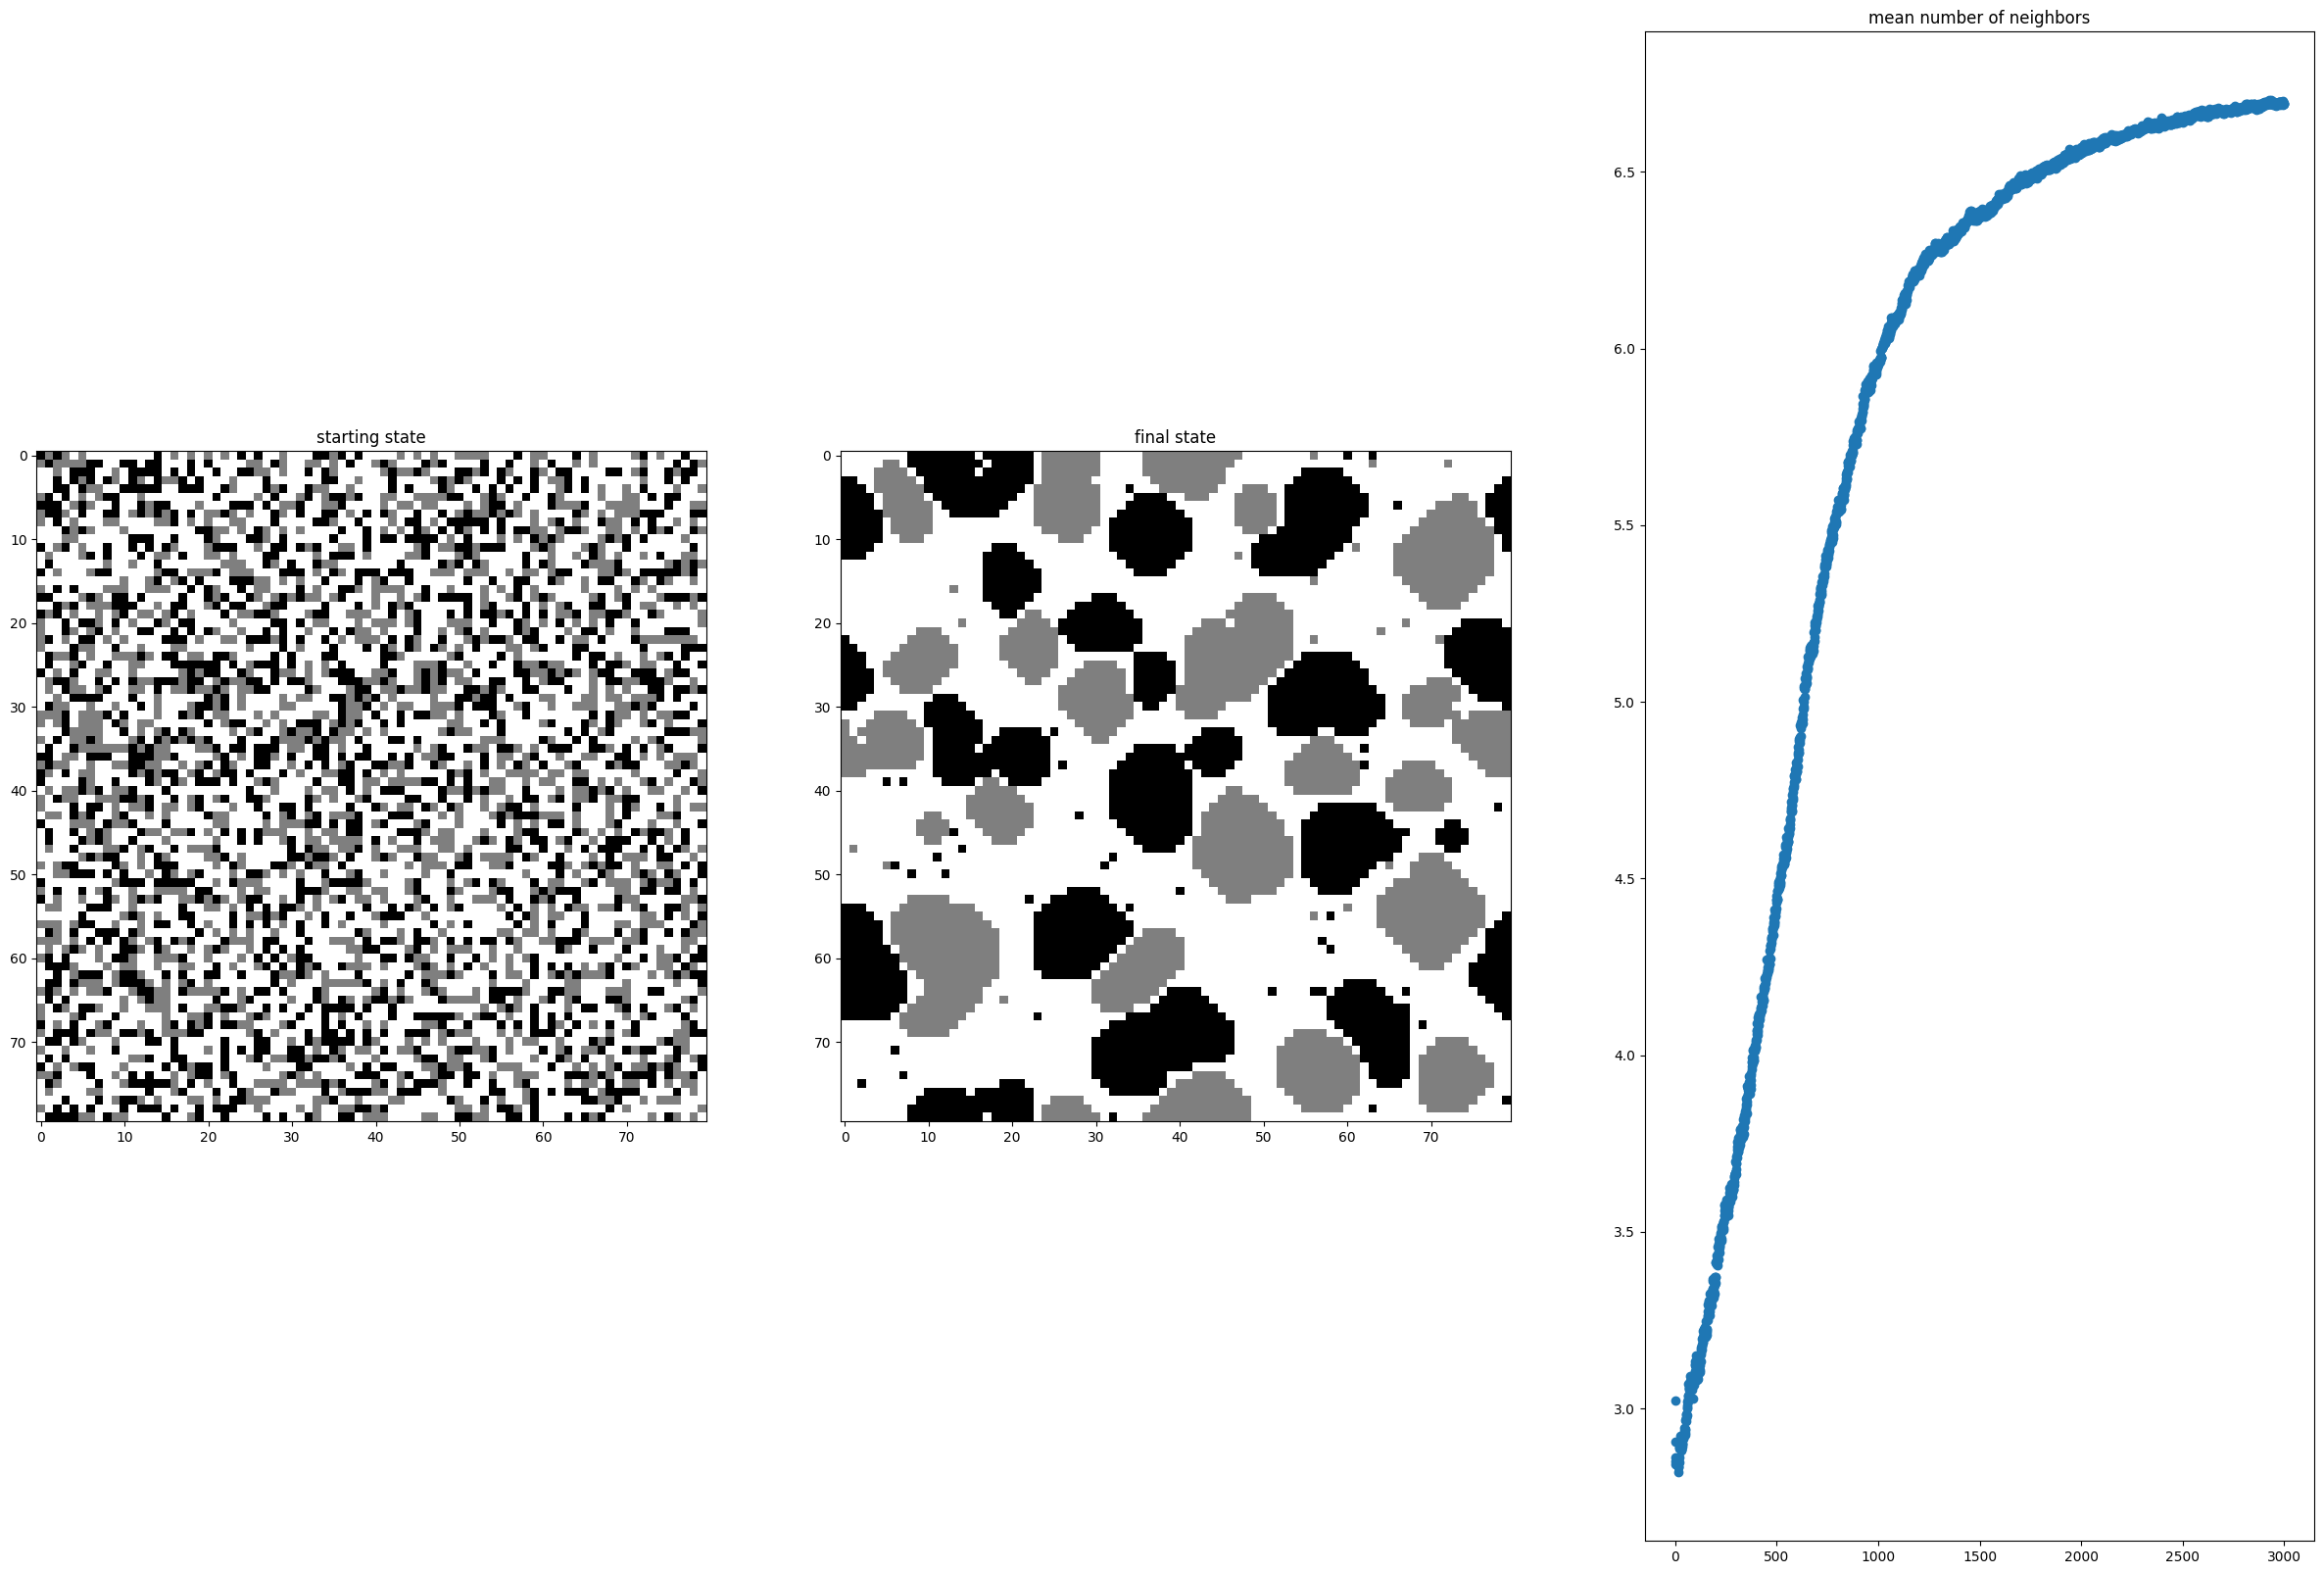

In [90]:
run_test(*test_cases[4])

L=80 p=0.65 a=4 t=2


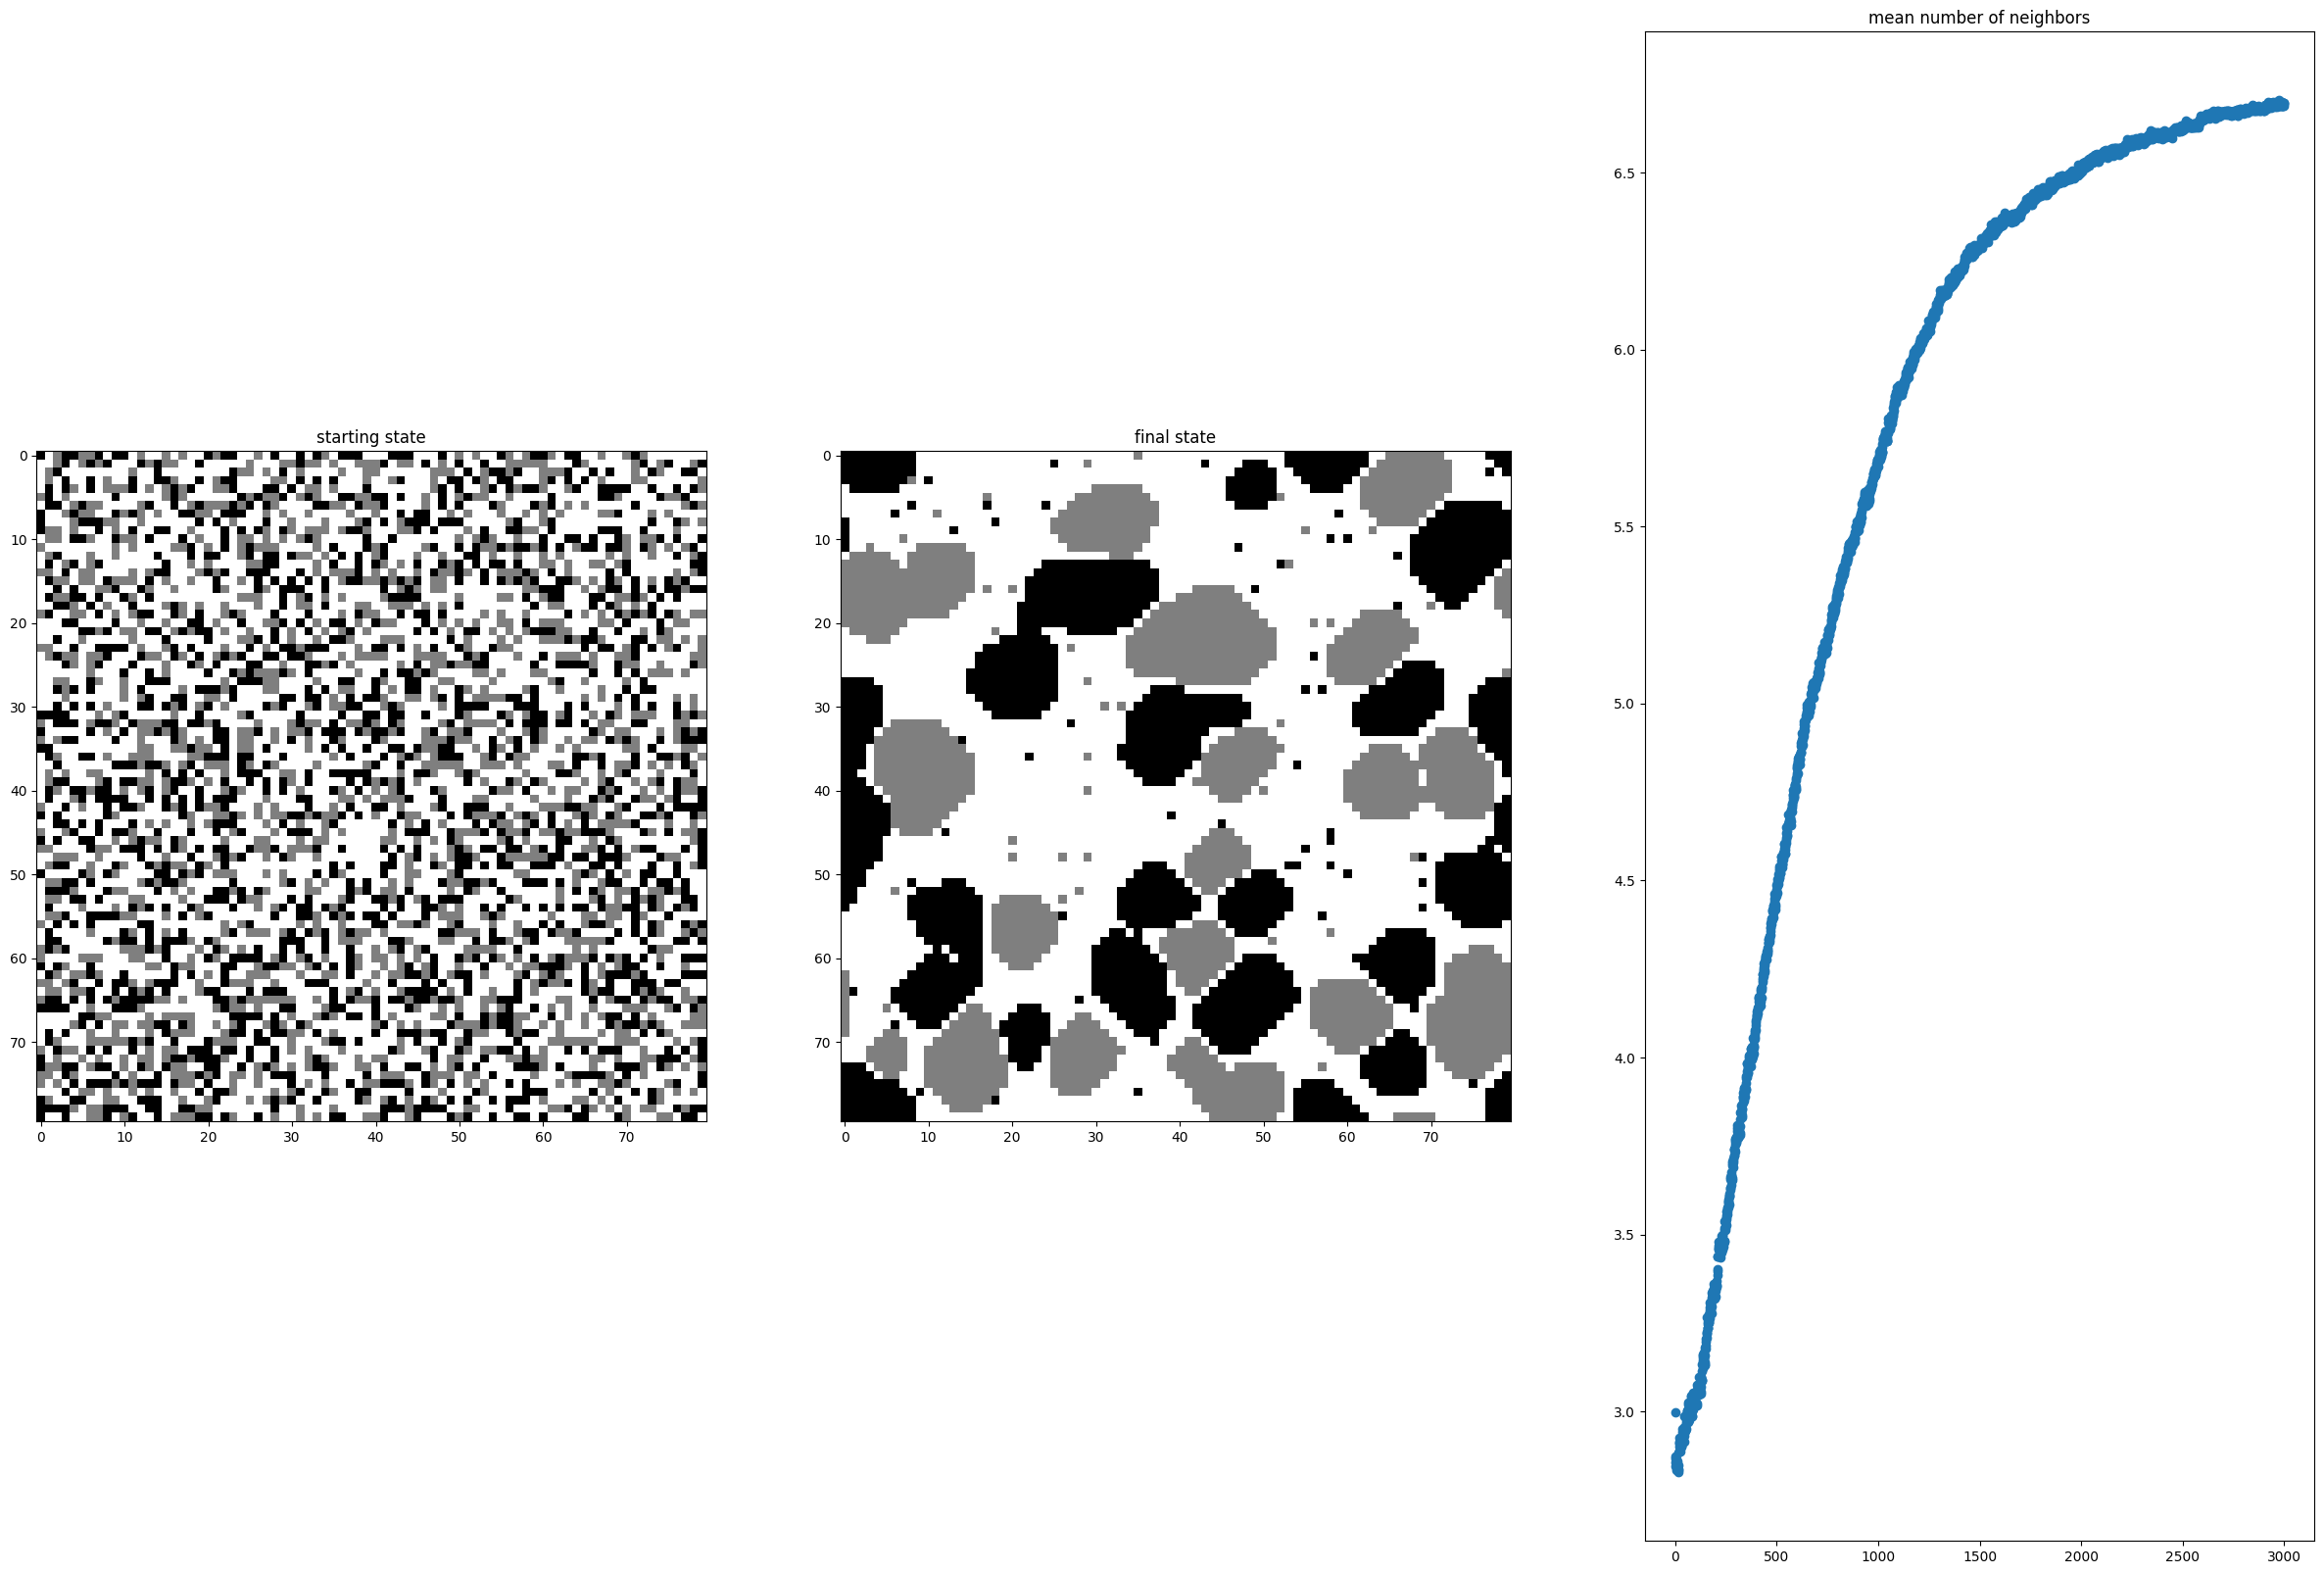

In [91]:
run_test(*test_cases[5])

L=200 p=0.35 a=4 t=2


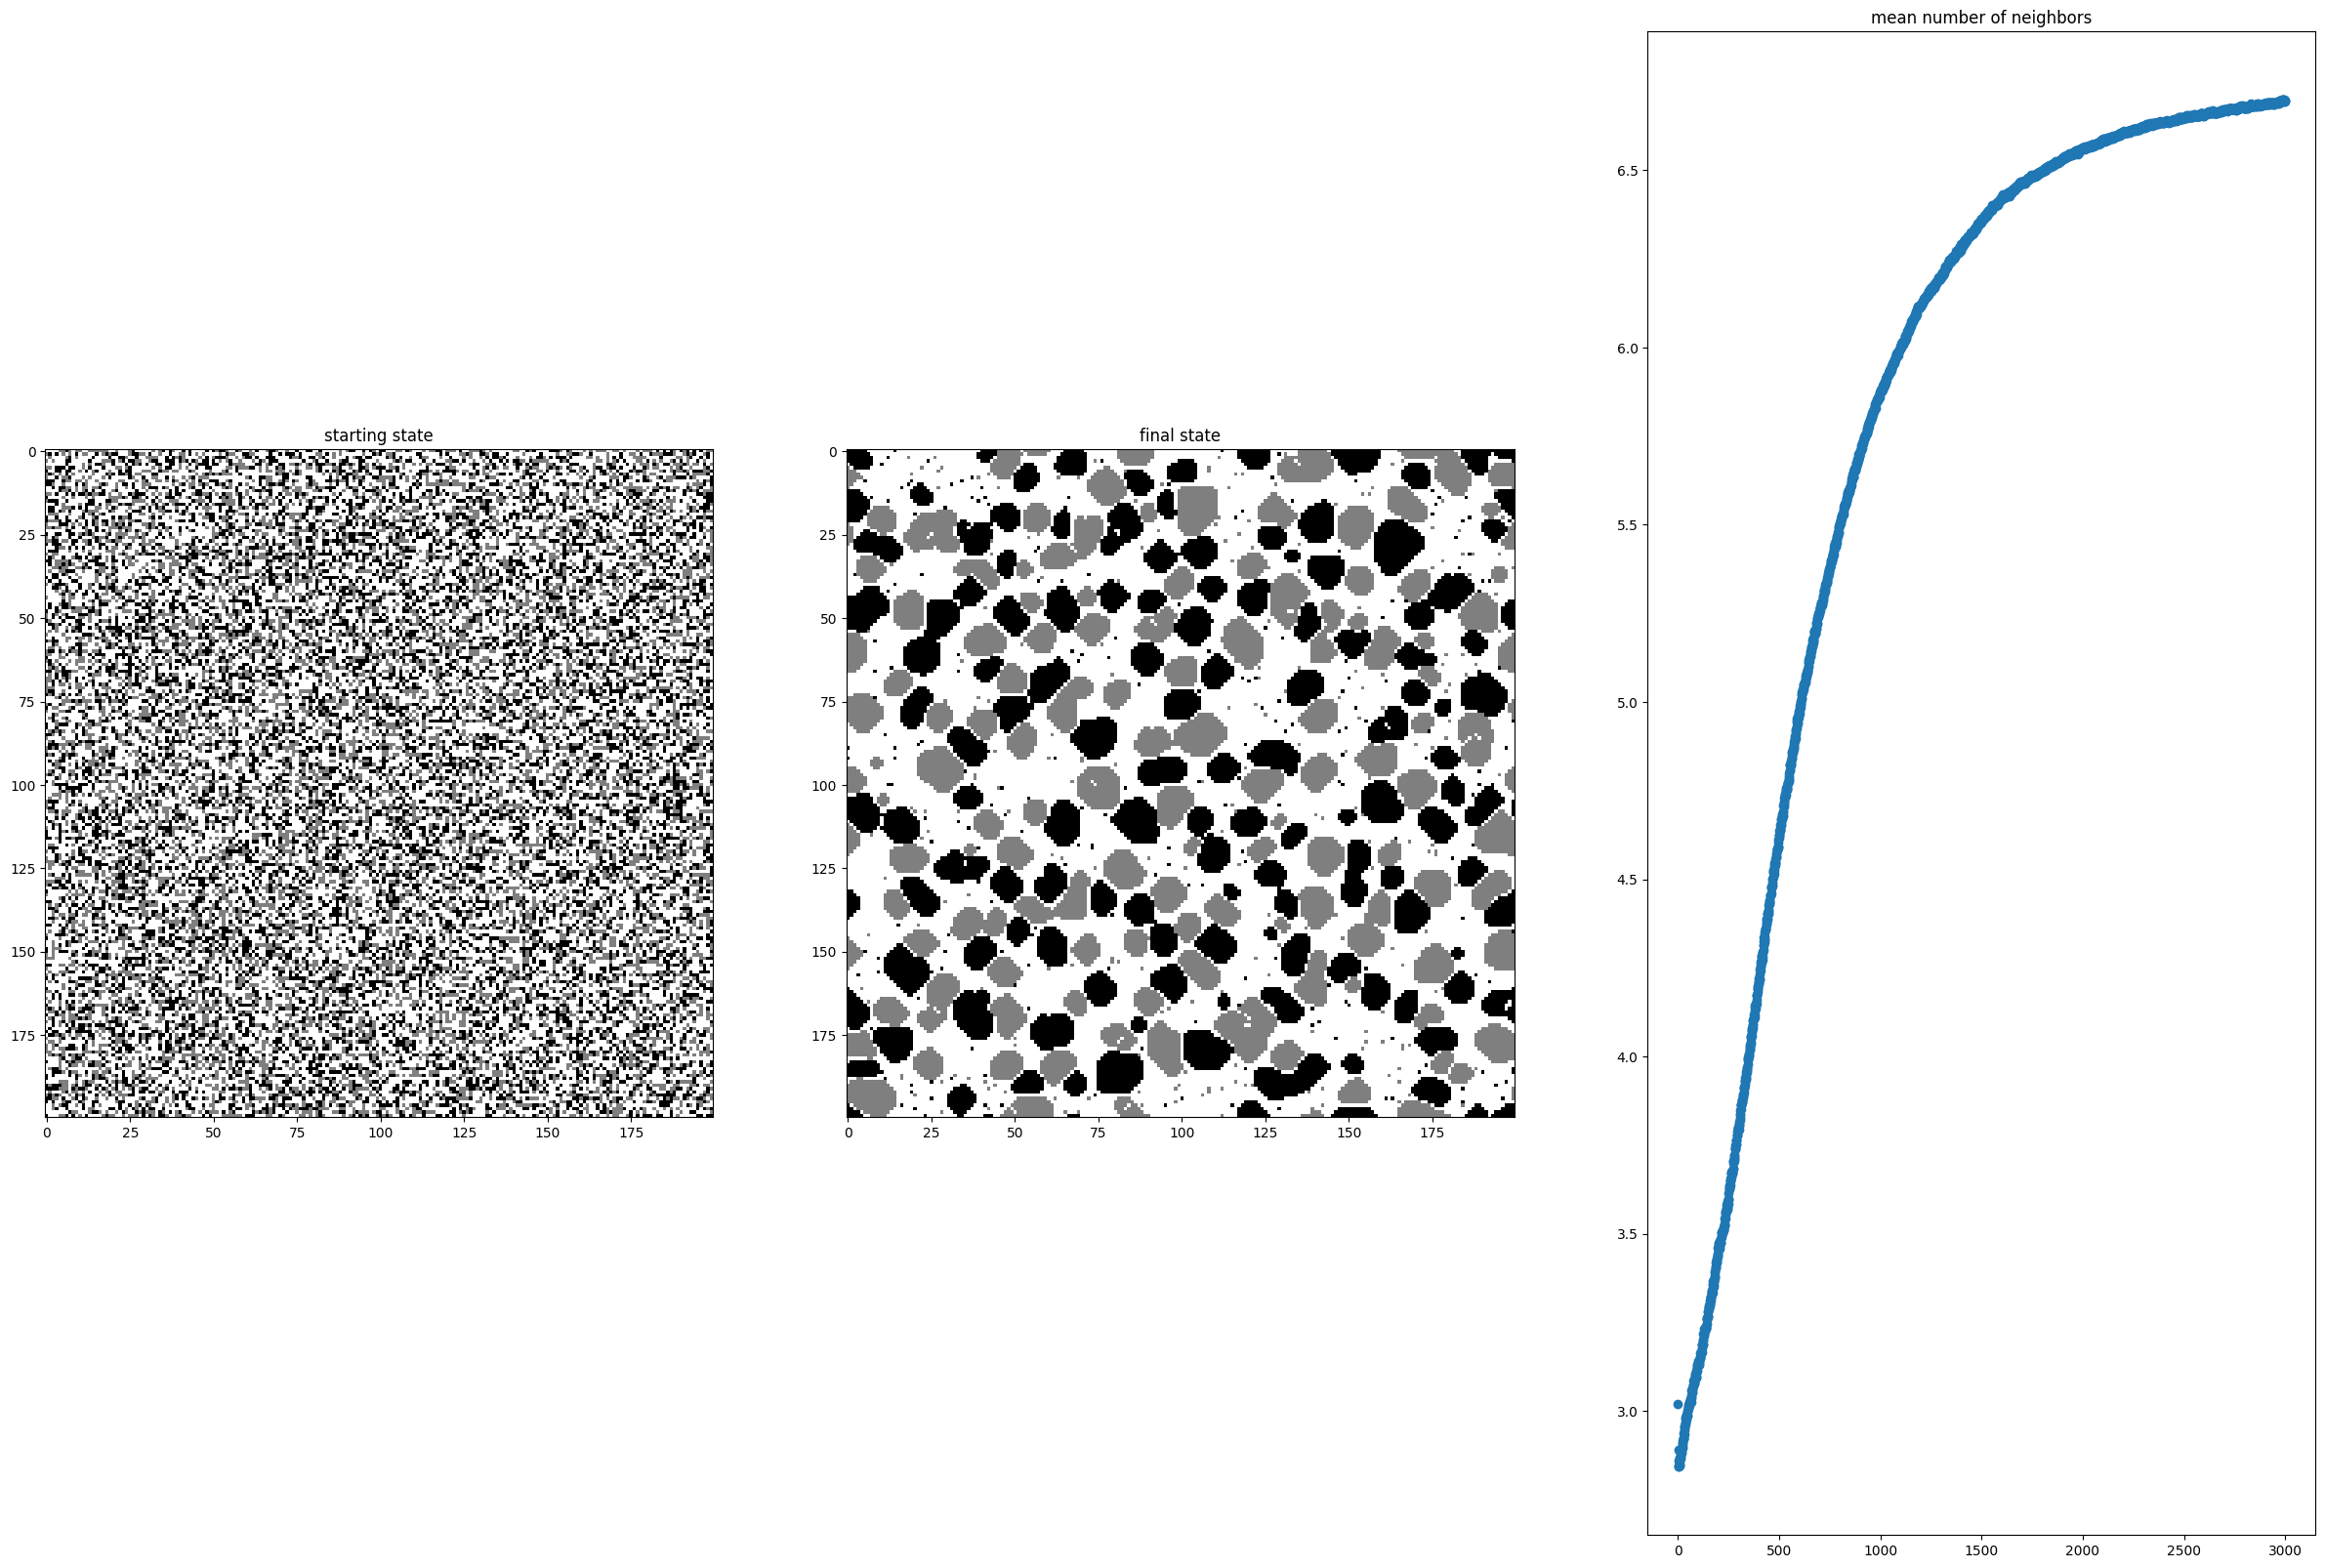

In [92]:
run_test(*test_cases[6])

L=200 p=0.5 a=4 t=2


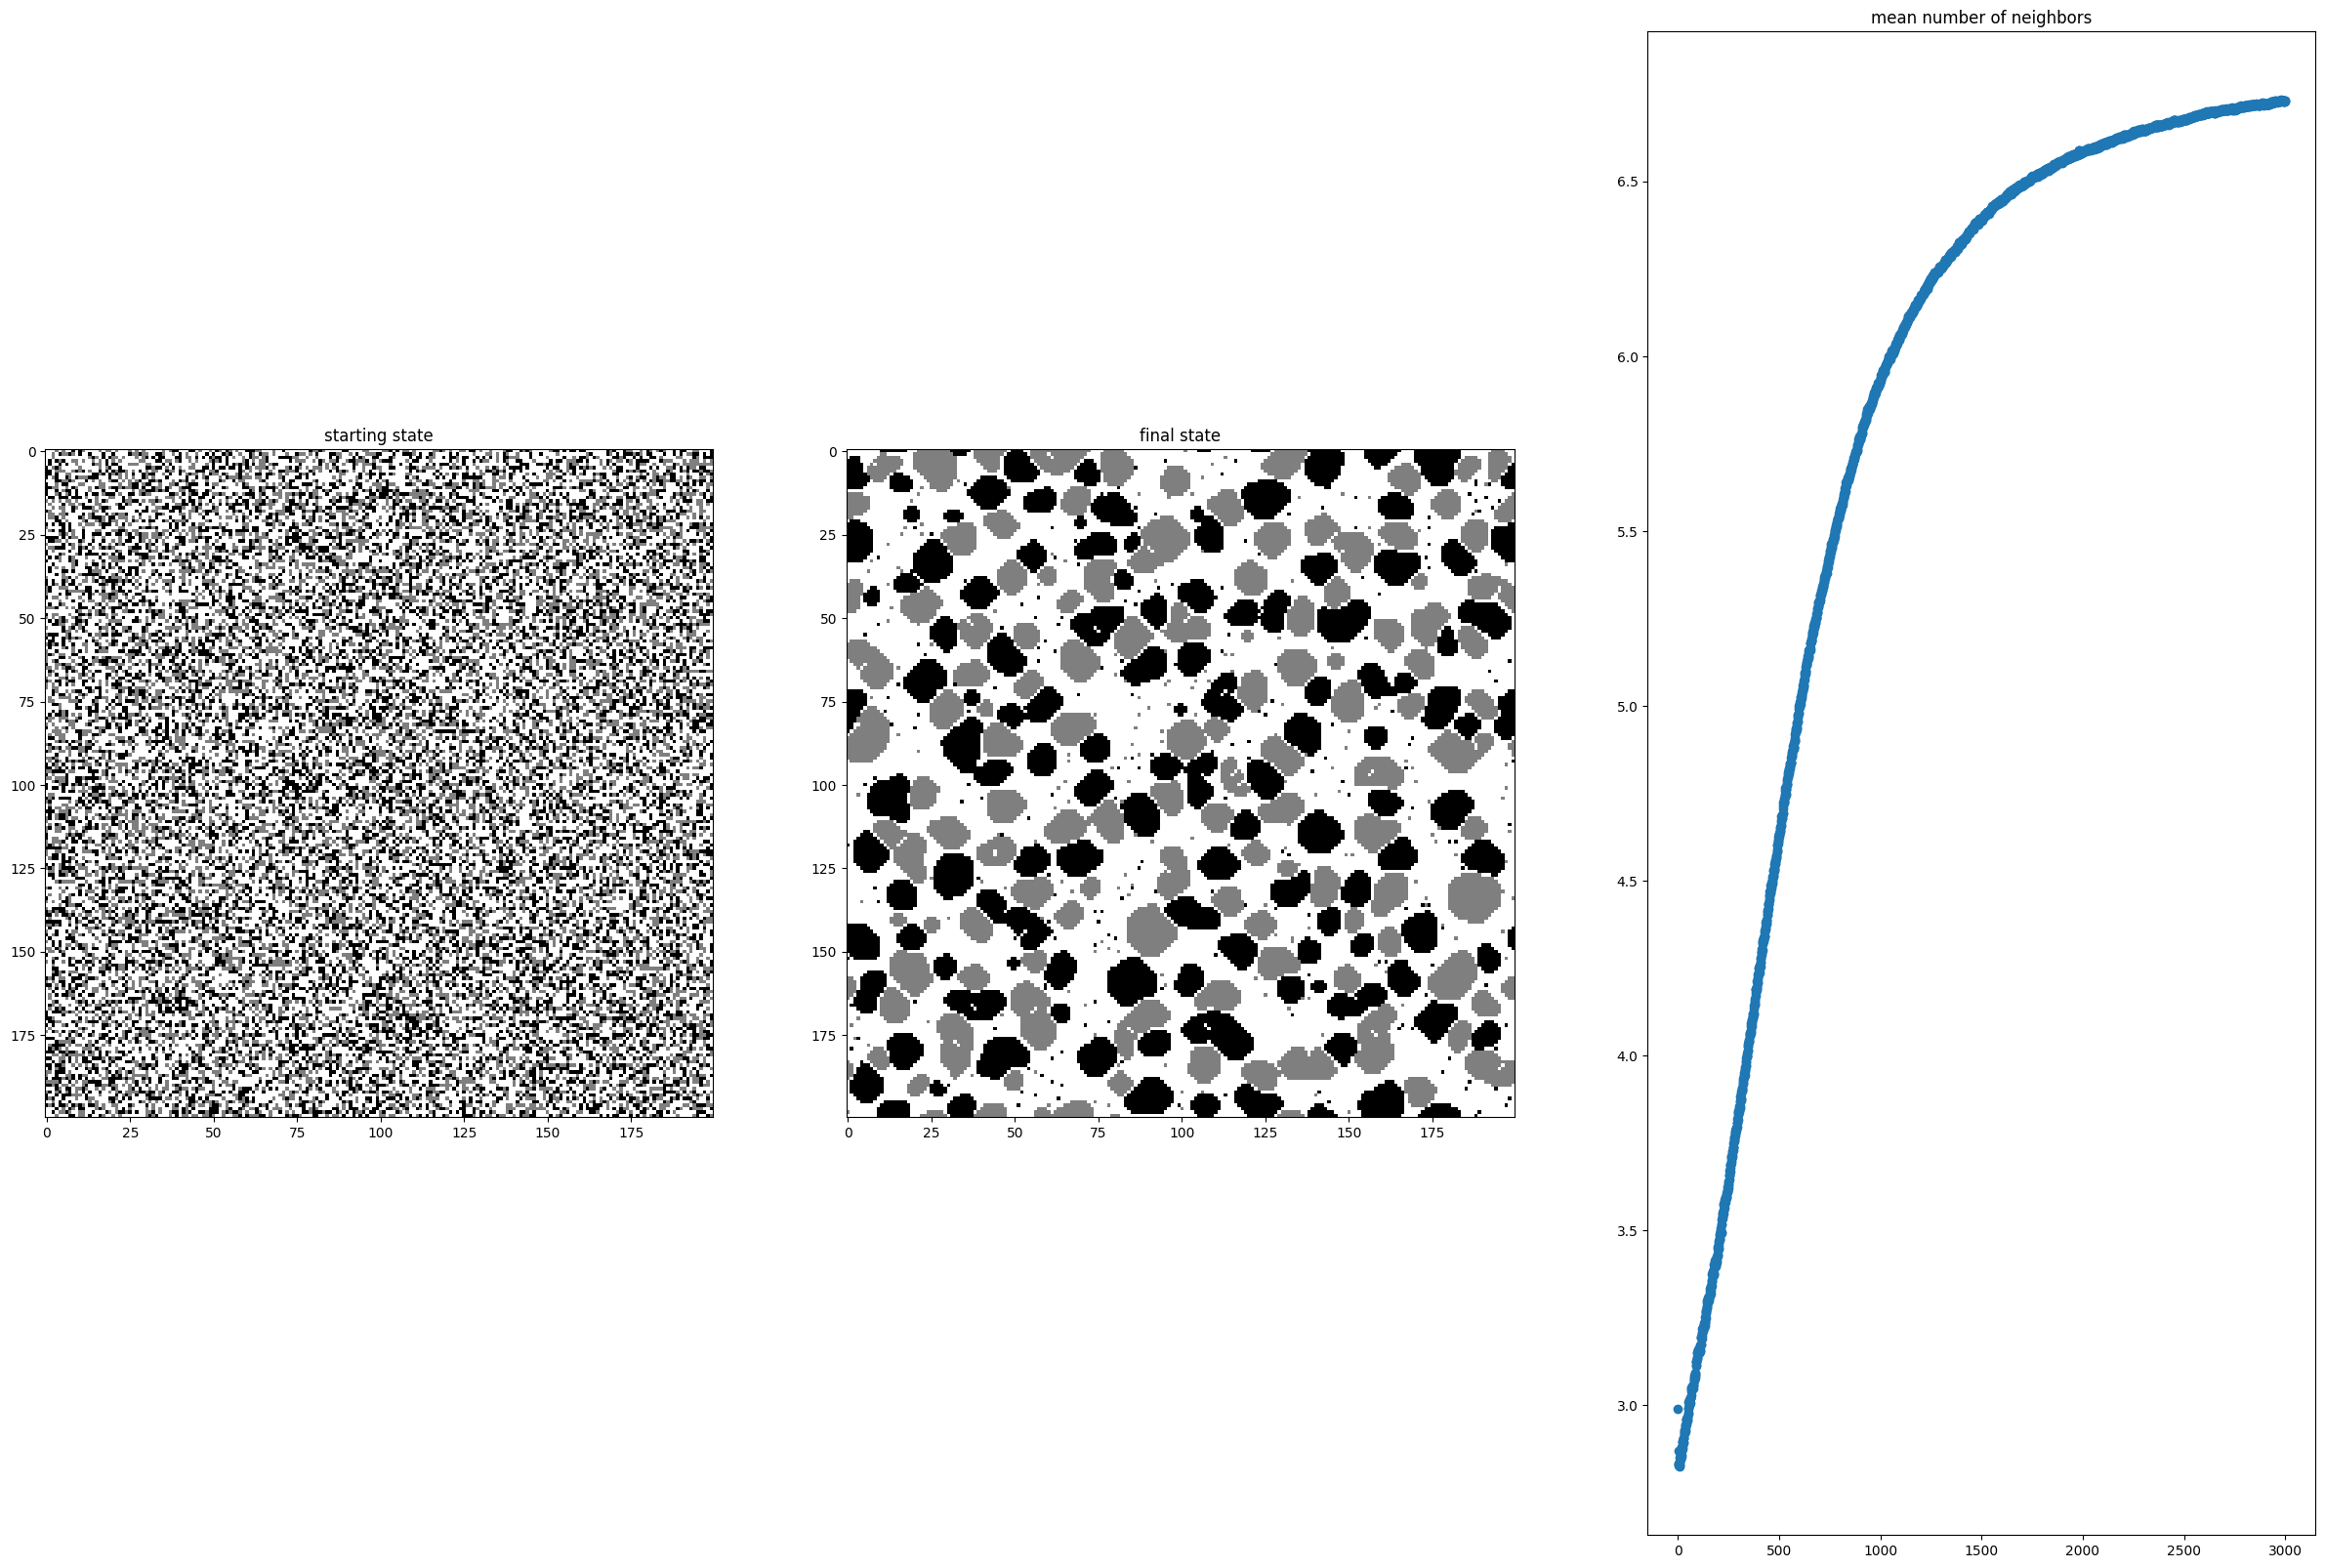

In [93]:
run_test(*test_cases[7])

L=200 p=0.65 a=4 t=2


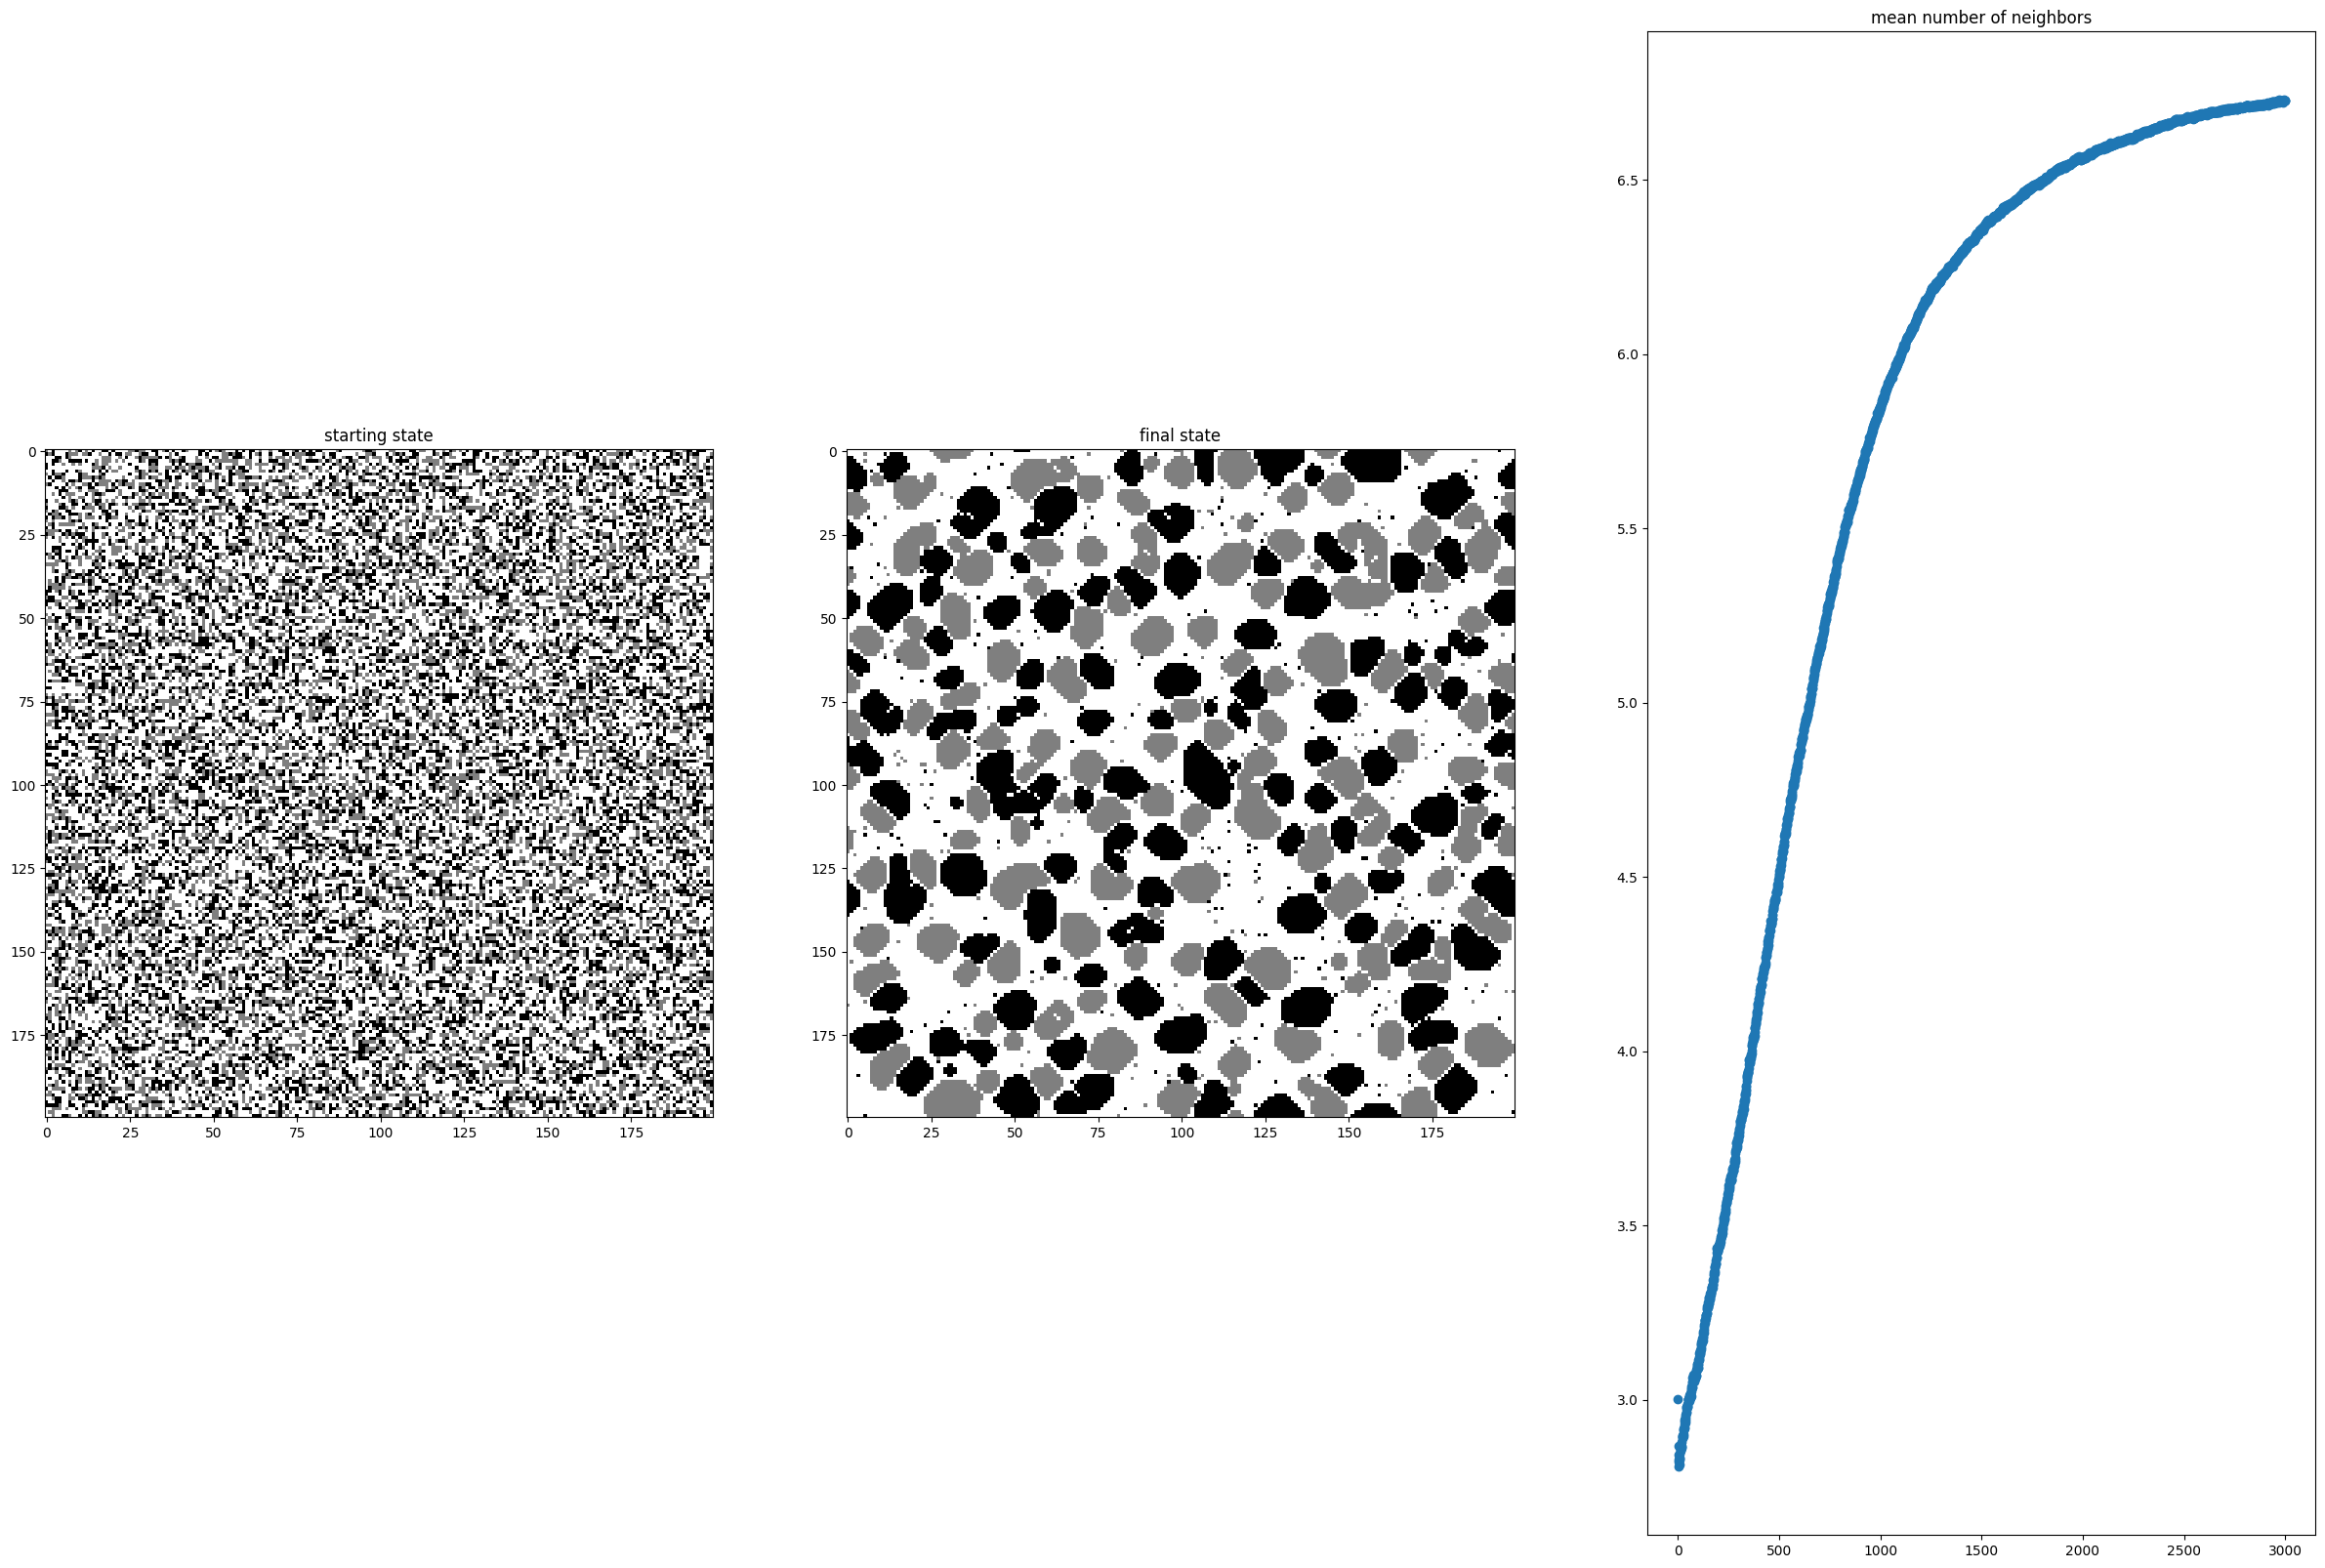

In [94]:
run_test(*test_cases[8])

L=20 p=0.35 a=4 t=4


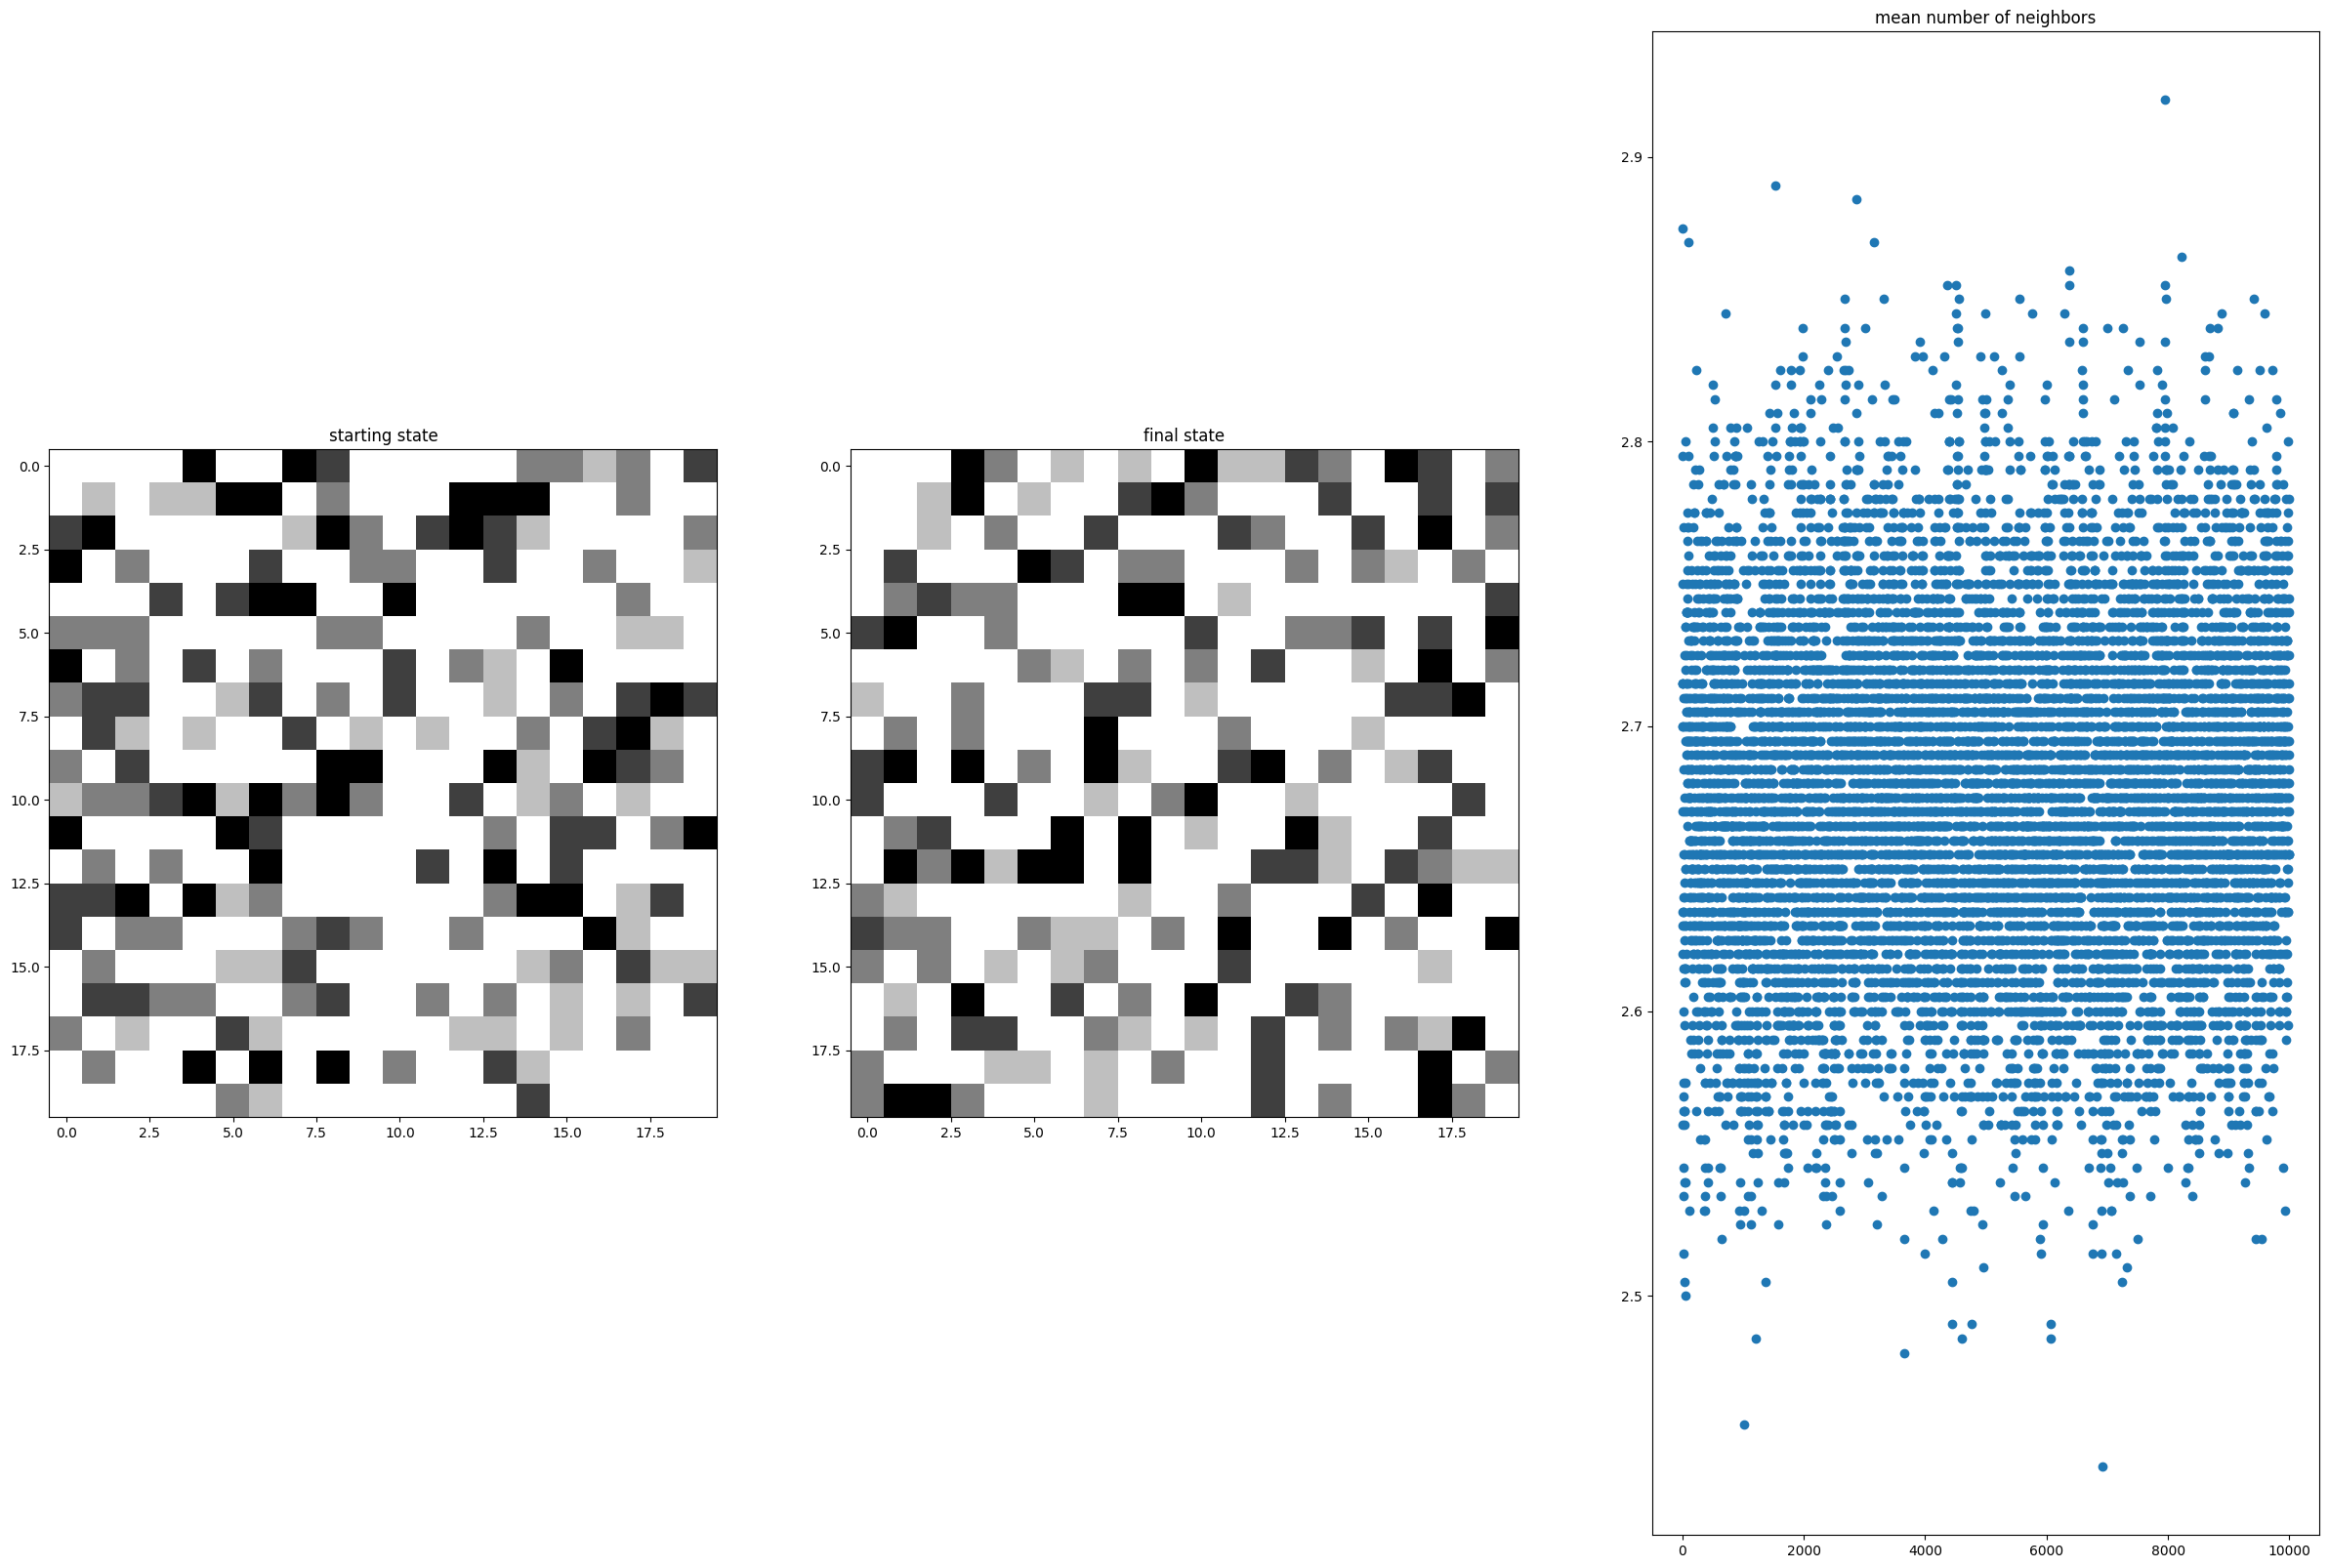

In [104]:
run_test(*test_cases[9],it=10000)

L=20 p=0.5 a=4 t=4


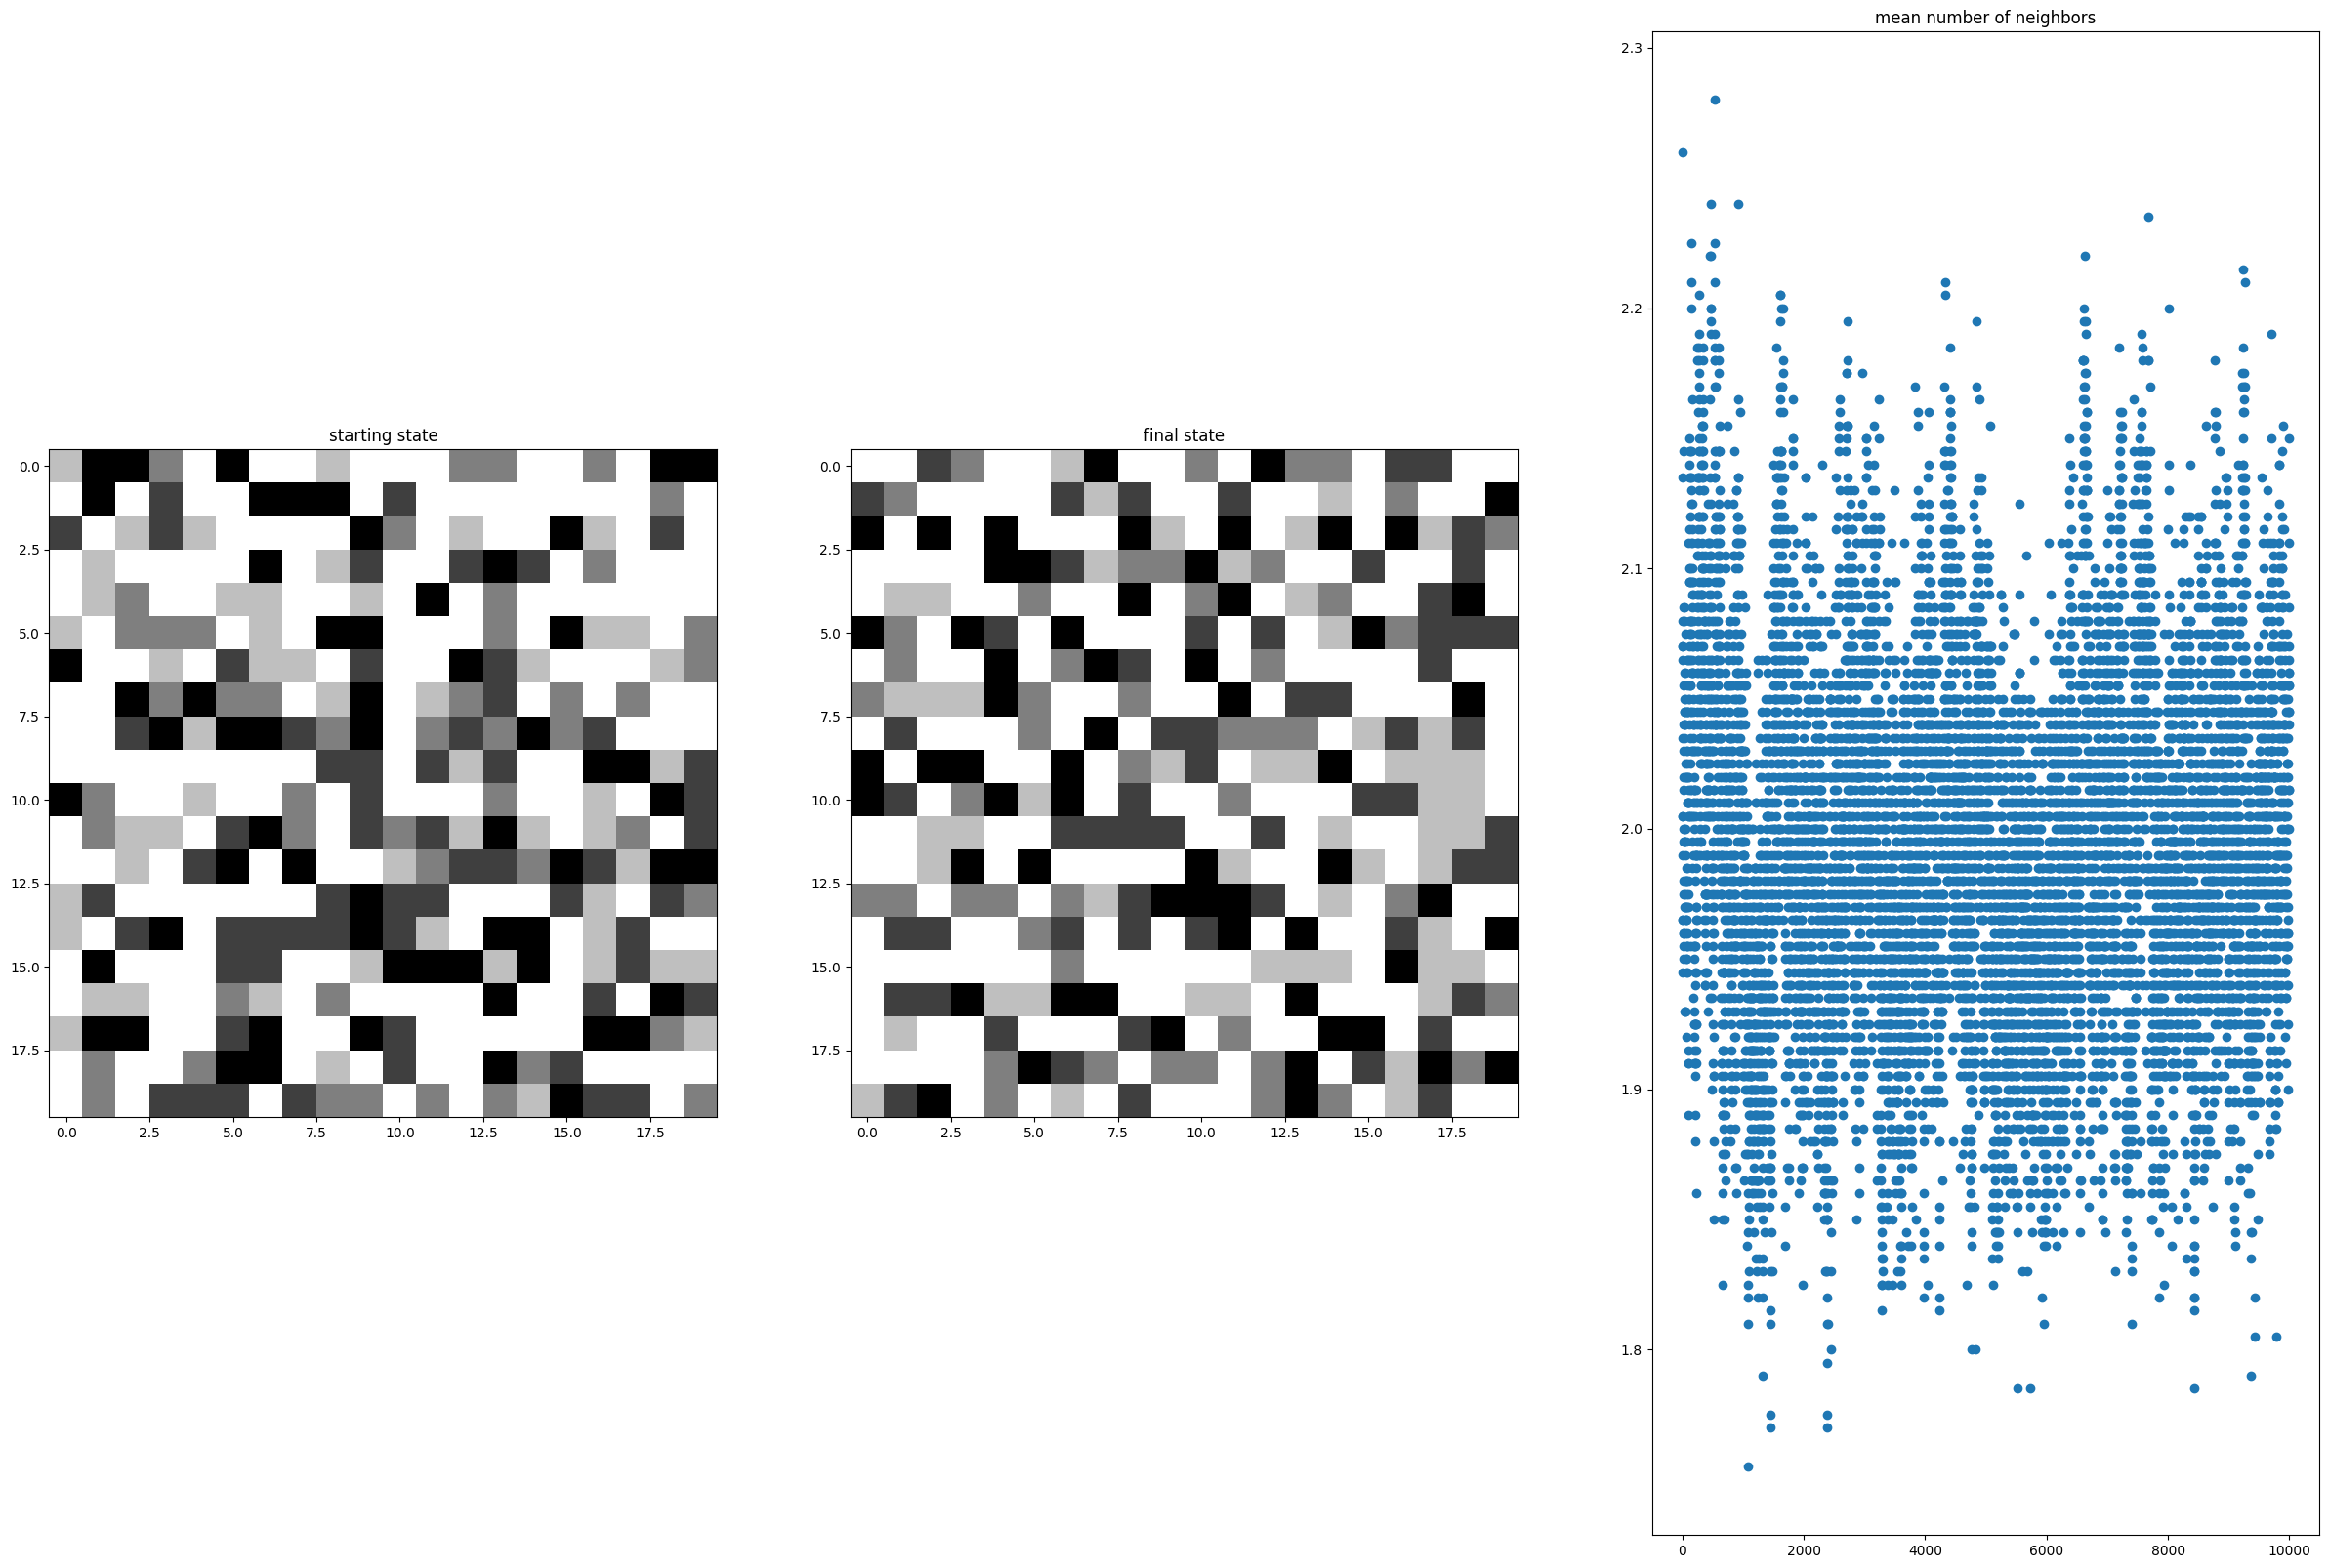

In [105]:
run_test(*test_cases[10],it=10000)

L=20 p=0.65 a=4 t=4


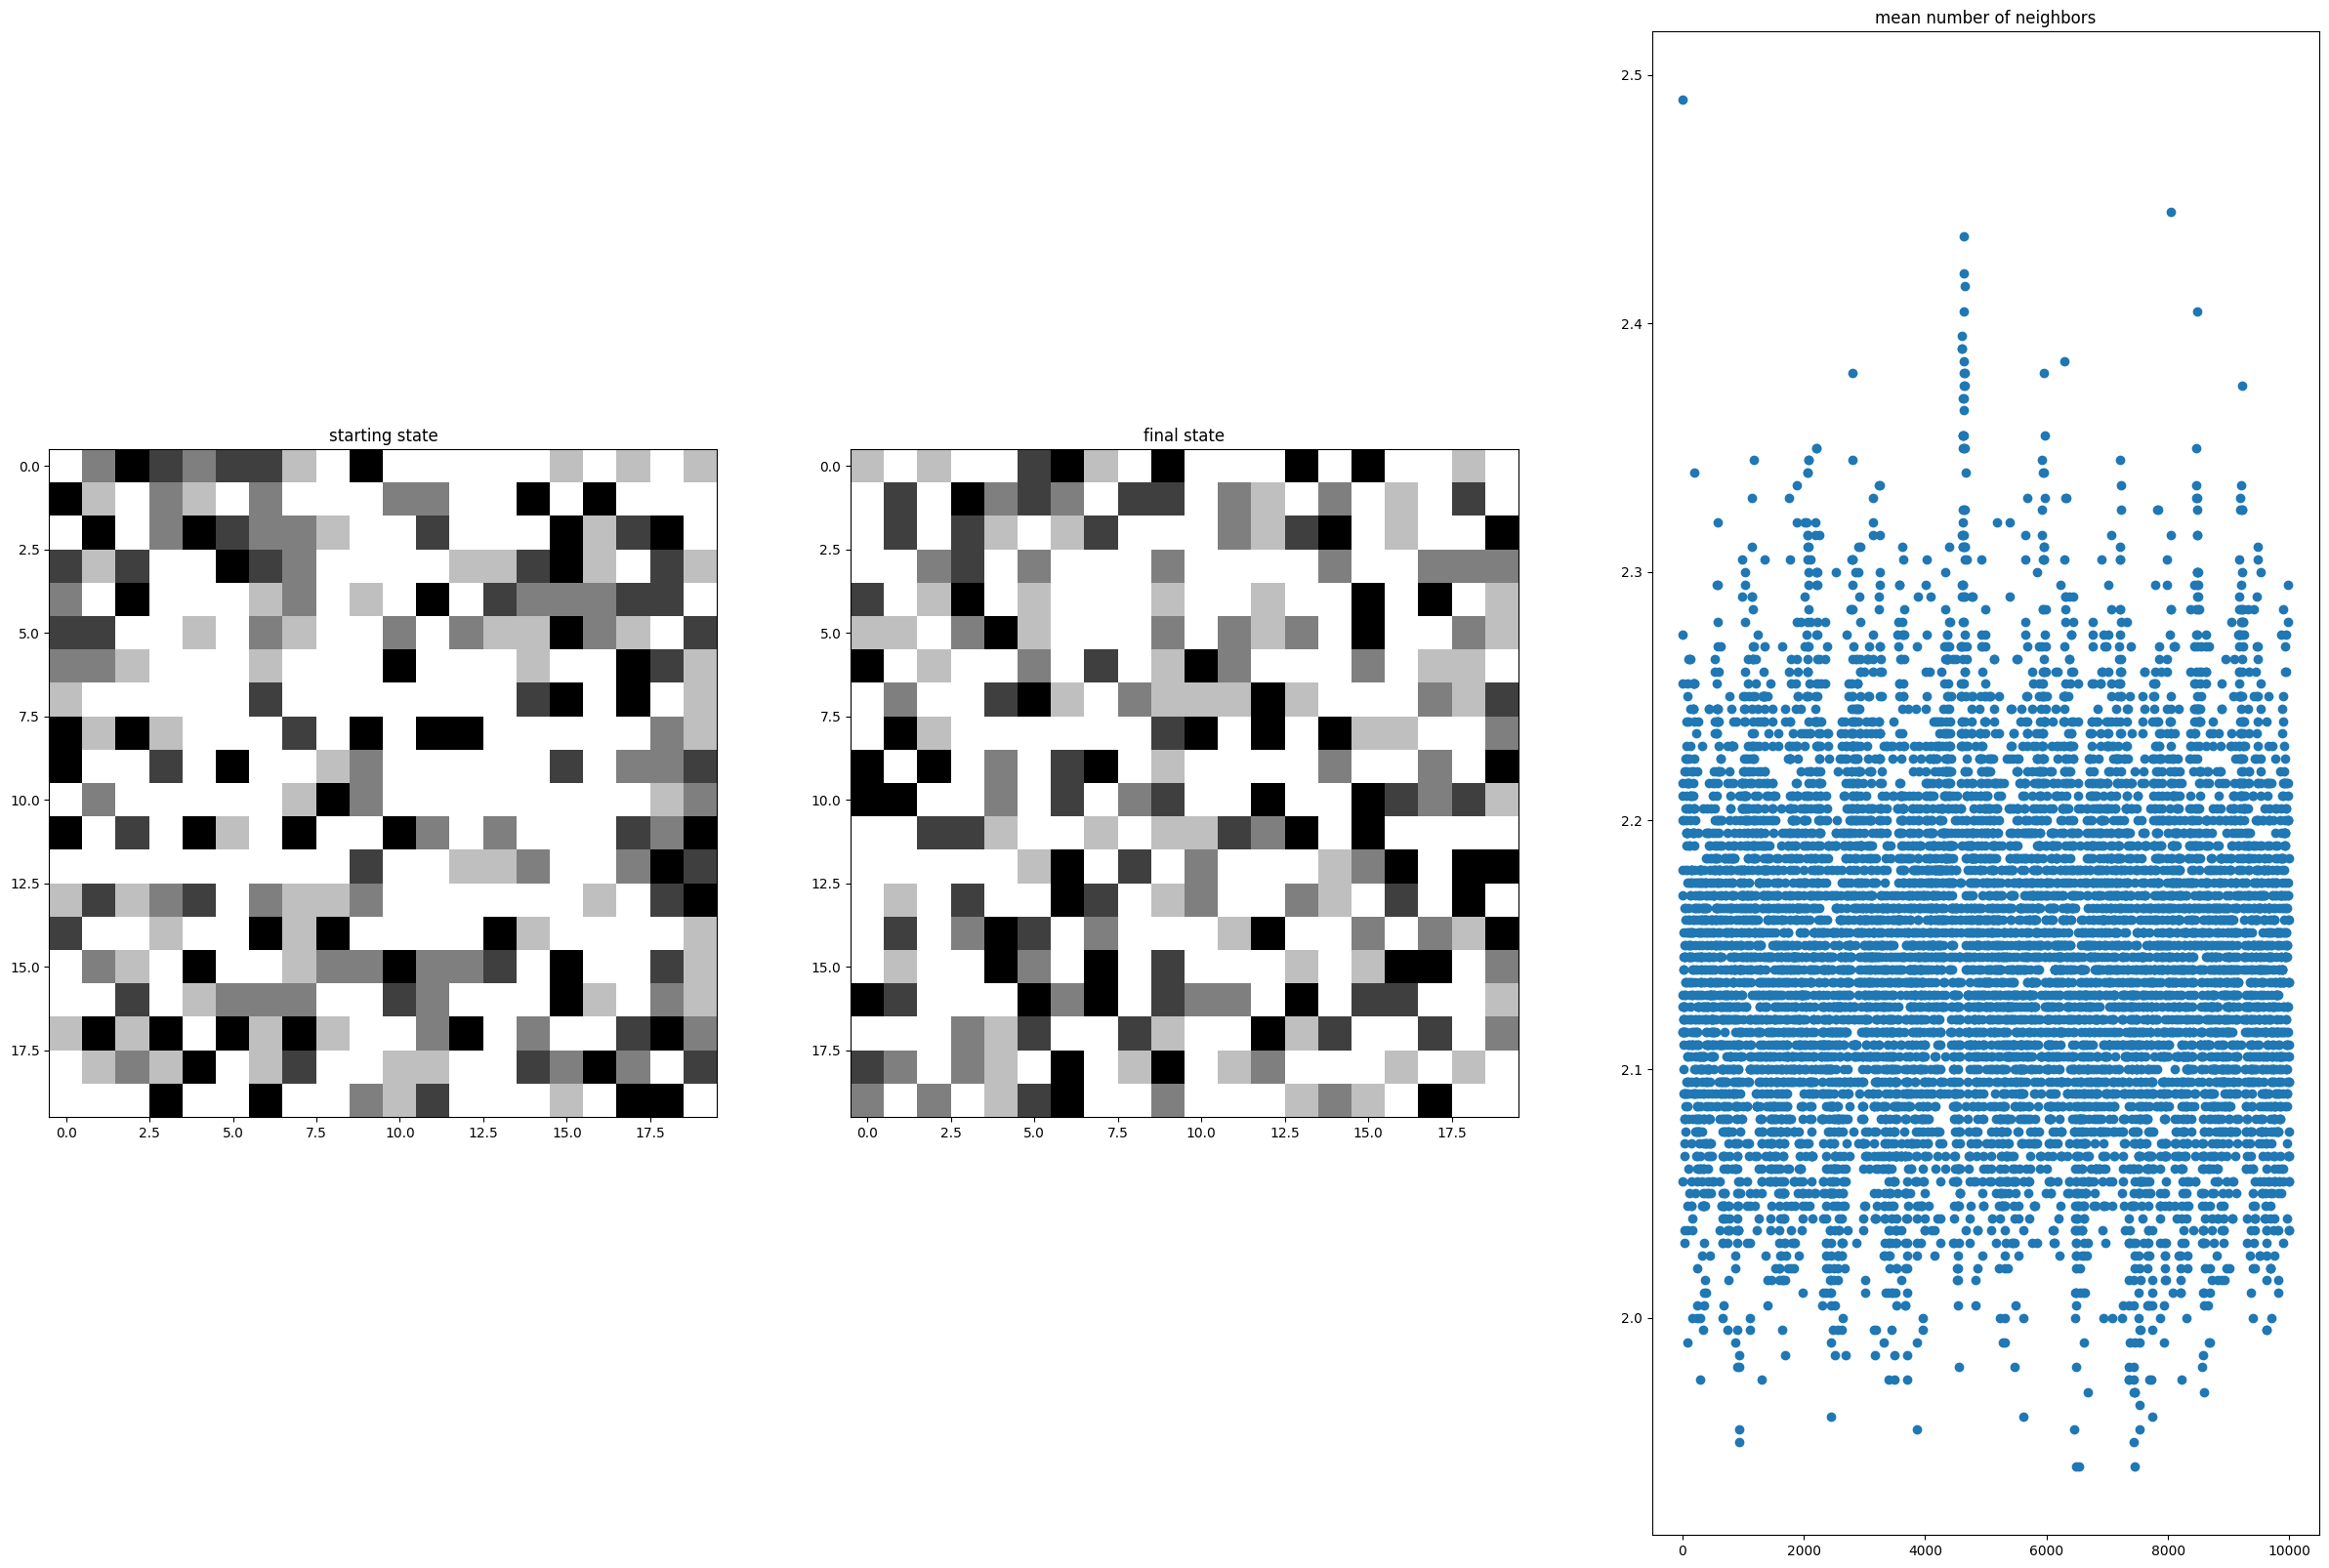

In [106]:
run_test(*test_cases[11],it=10000)

L=80 p=0.35 a=4 t=4


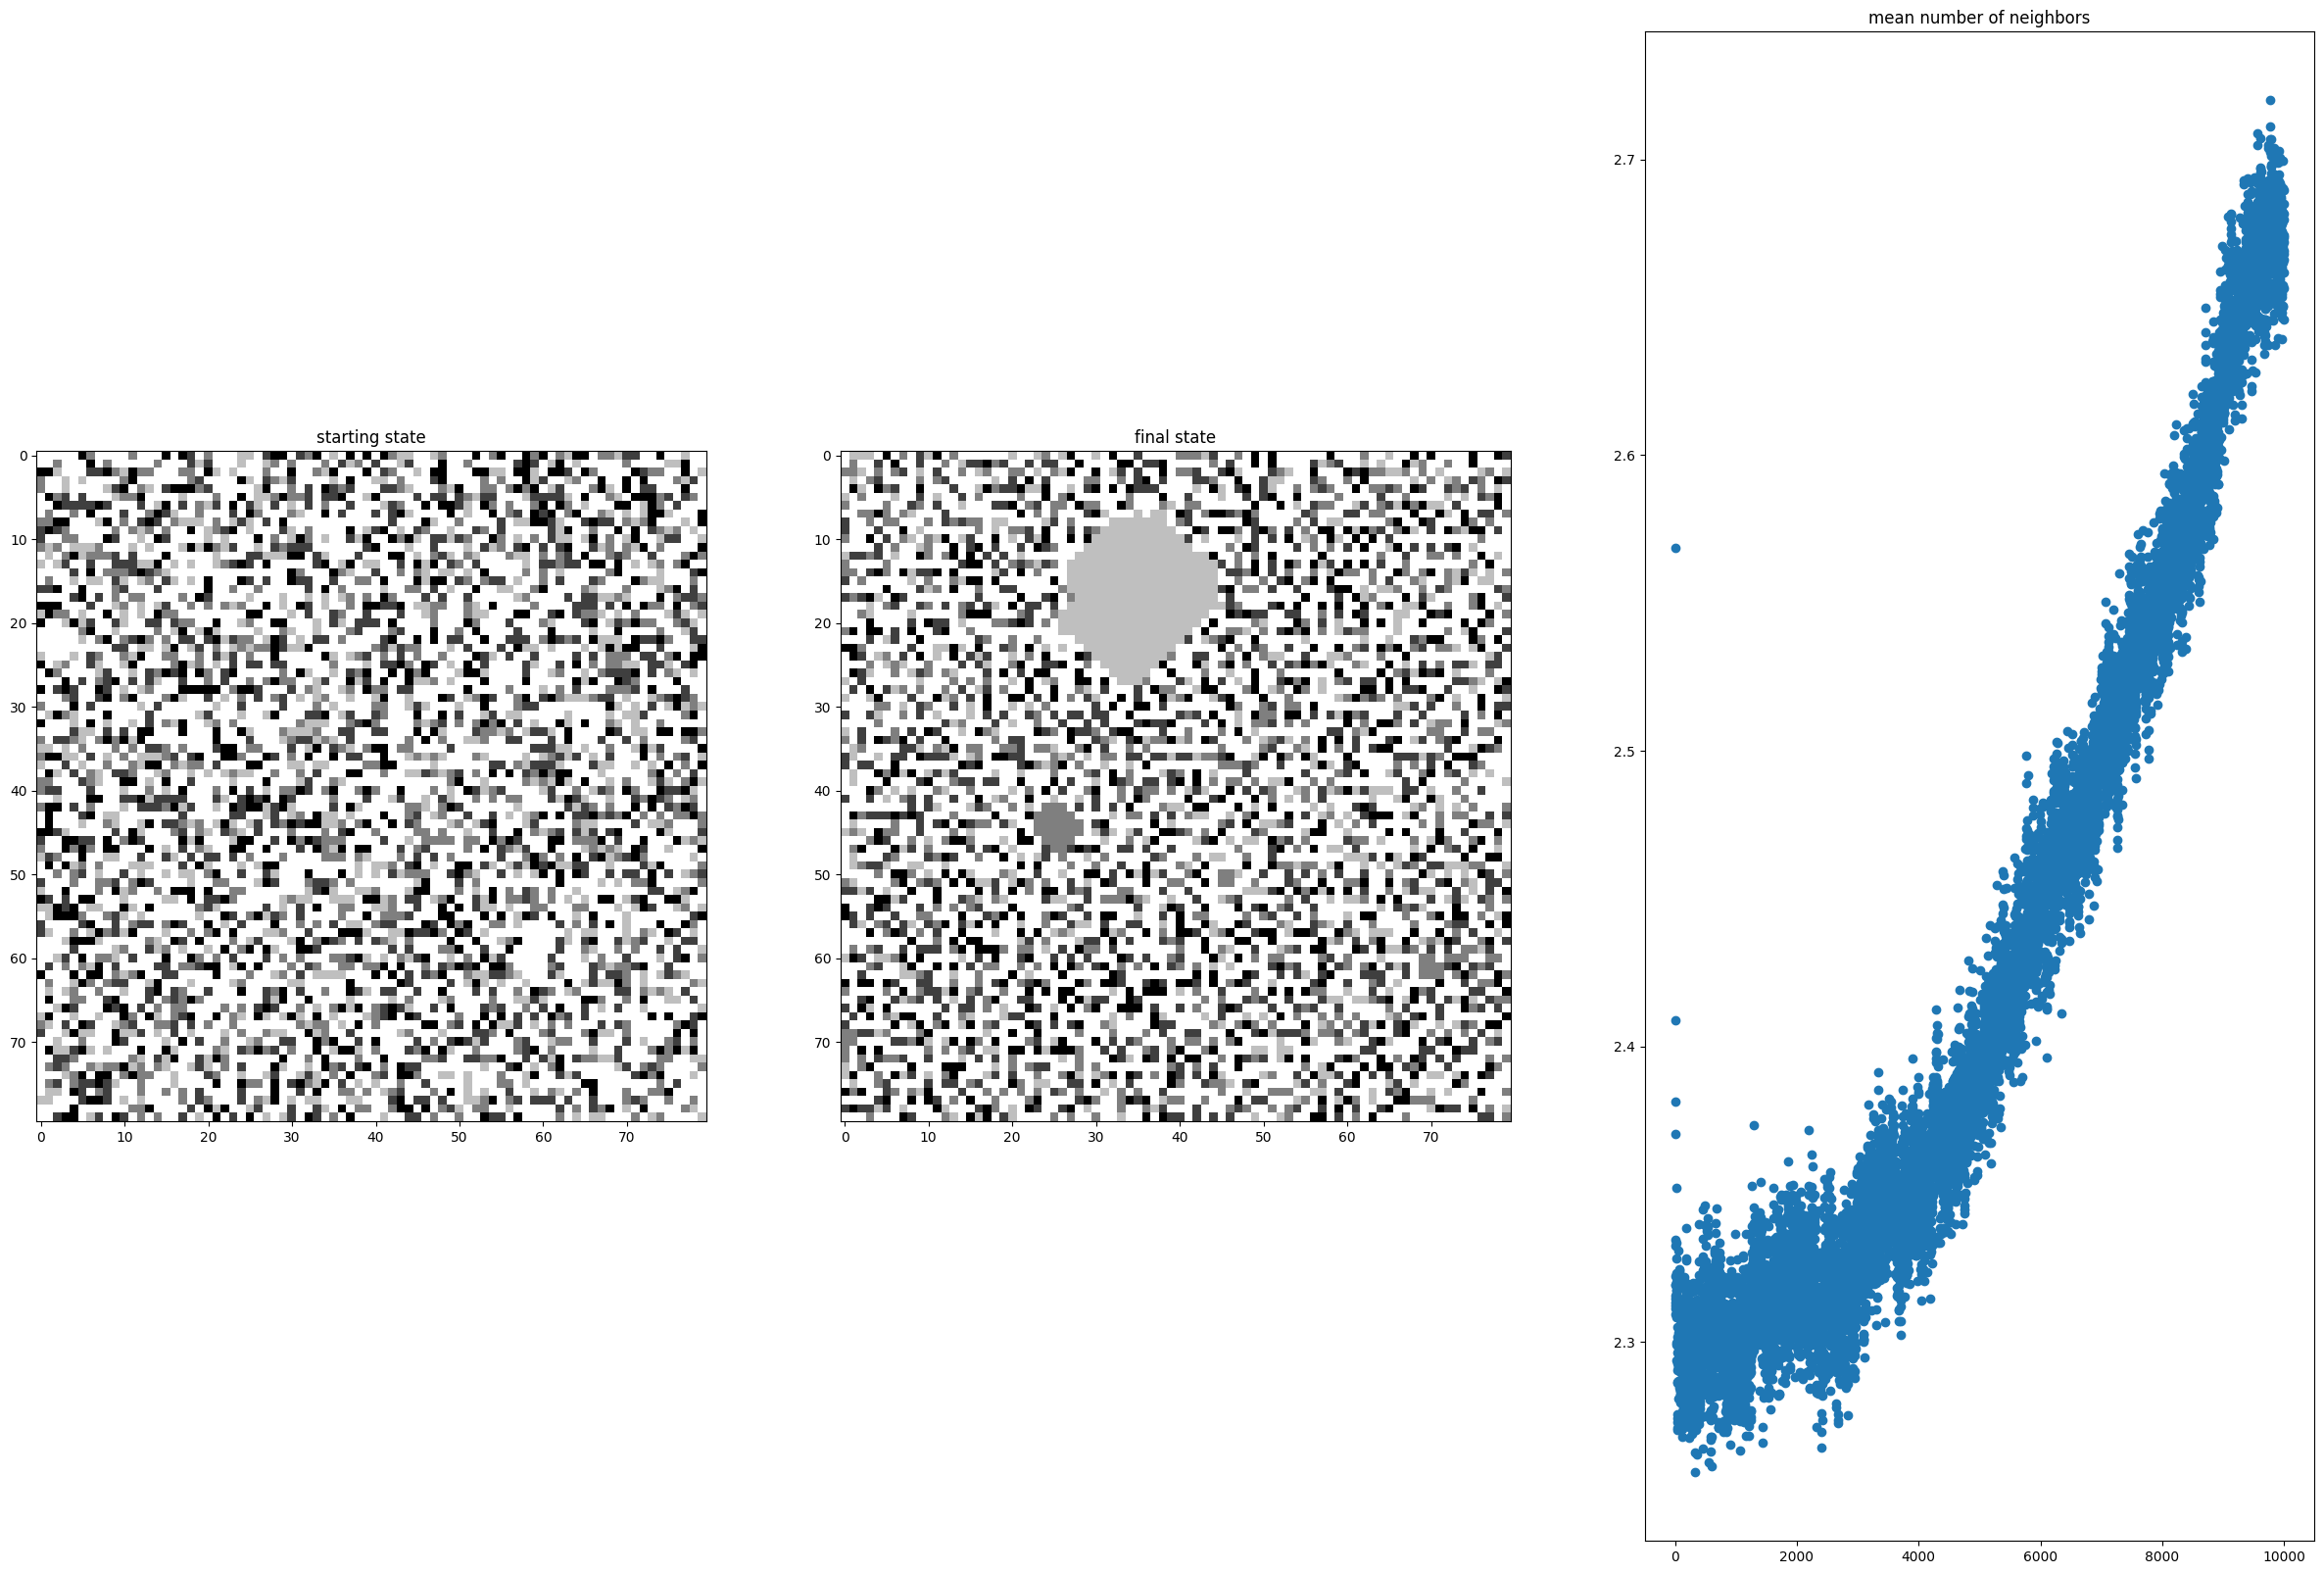

In [107]:
run_test(*test_cases[12],it=10000)

L=80 p=0.5 a=4 t=4


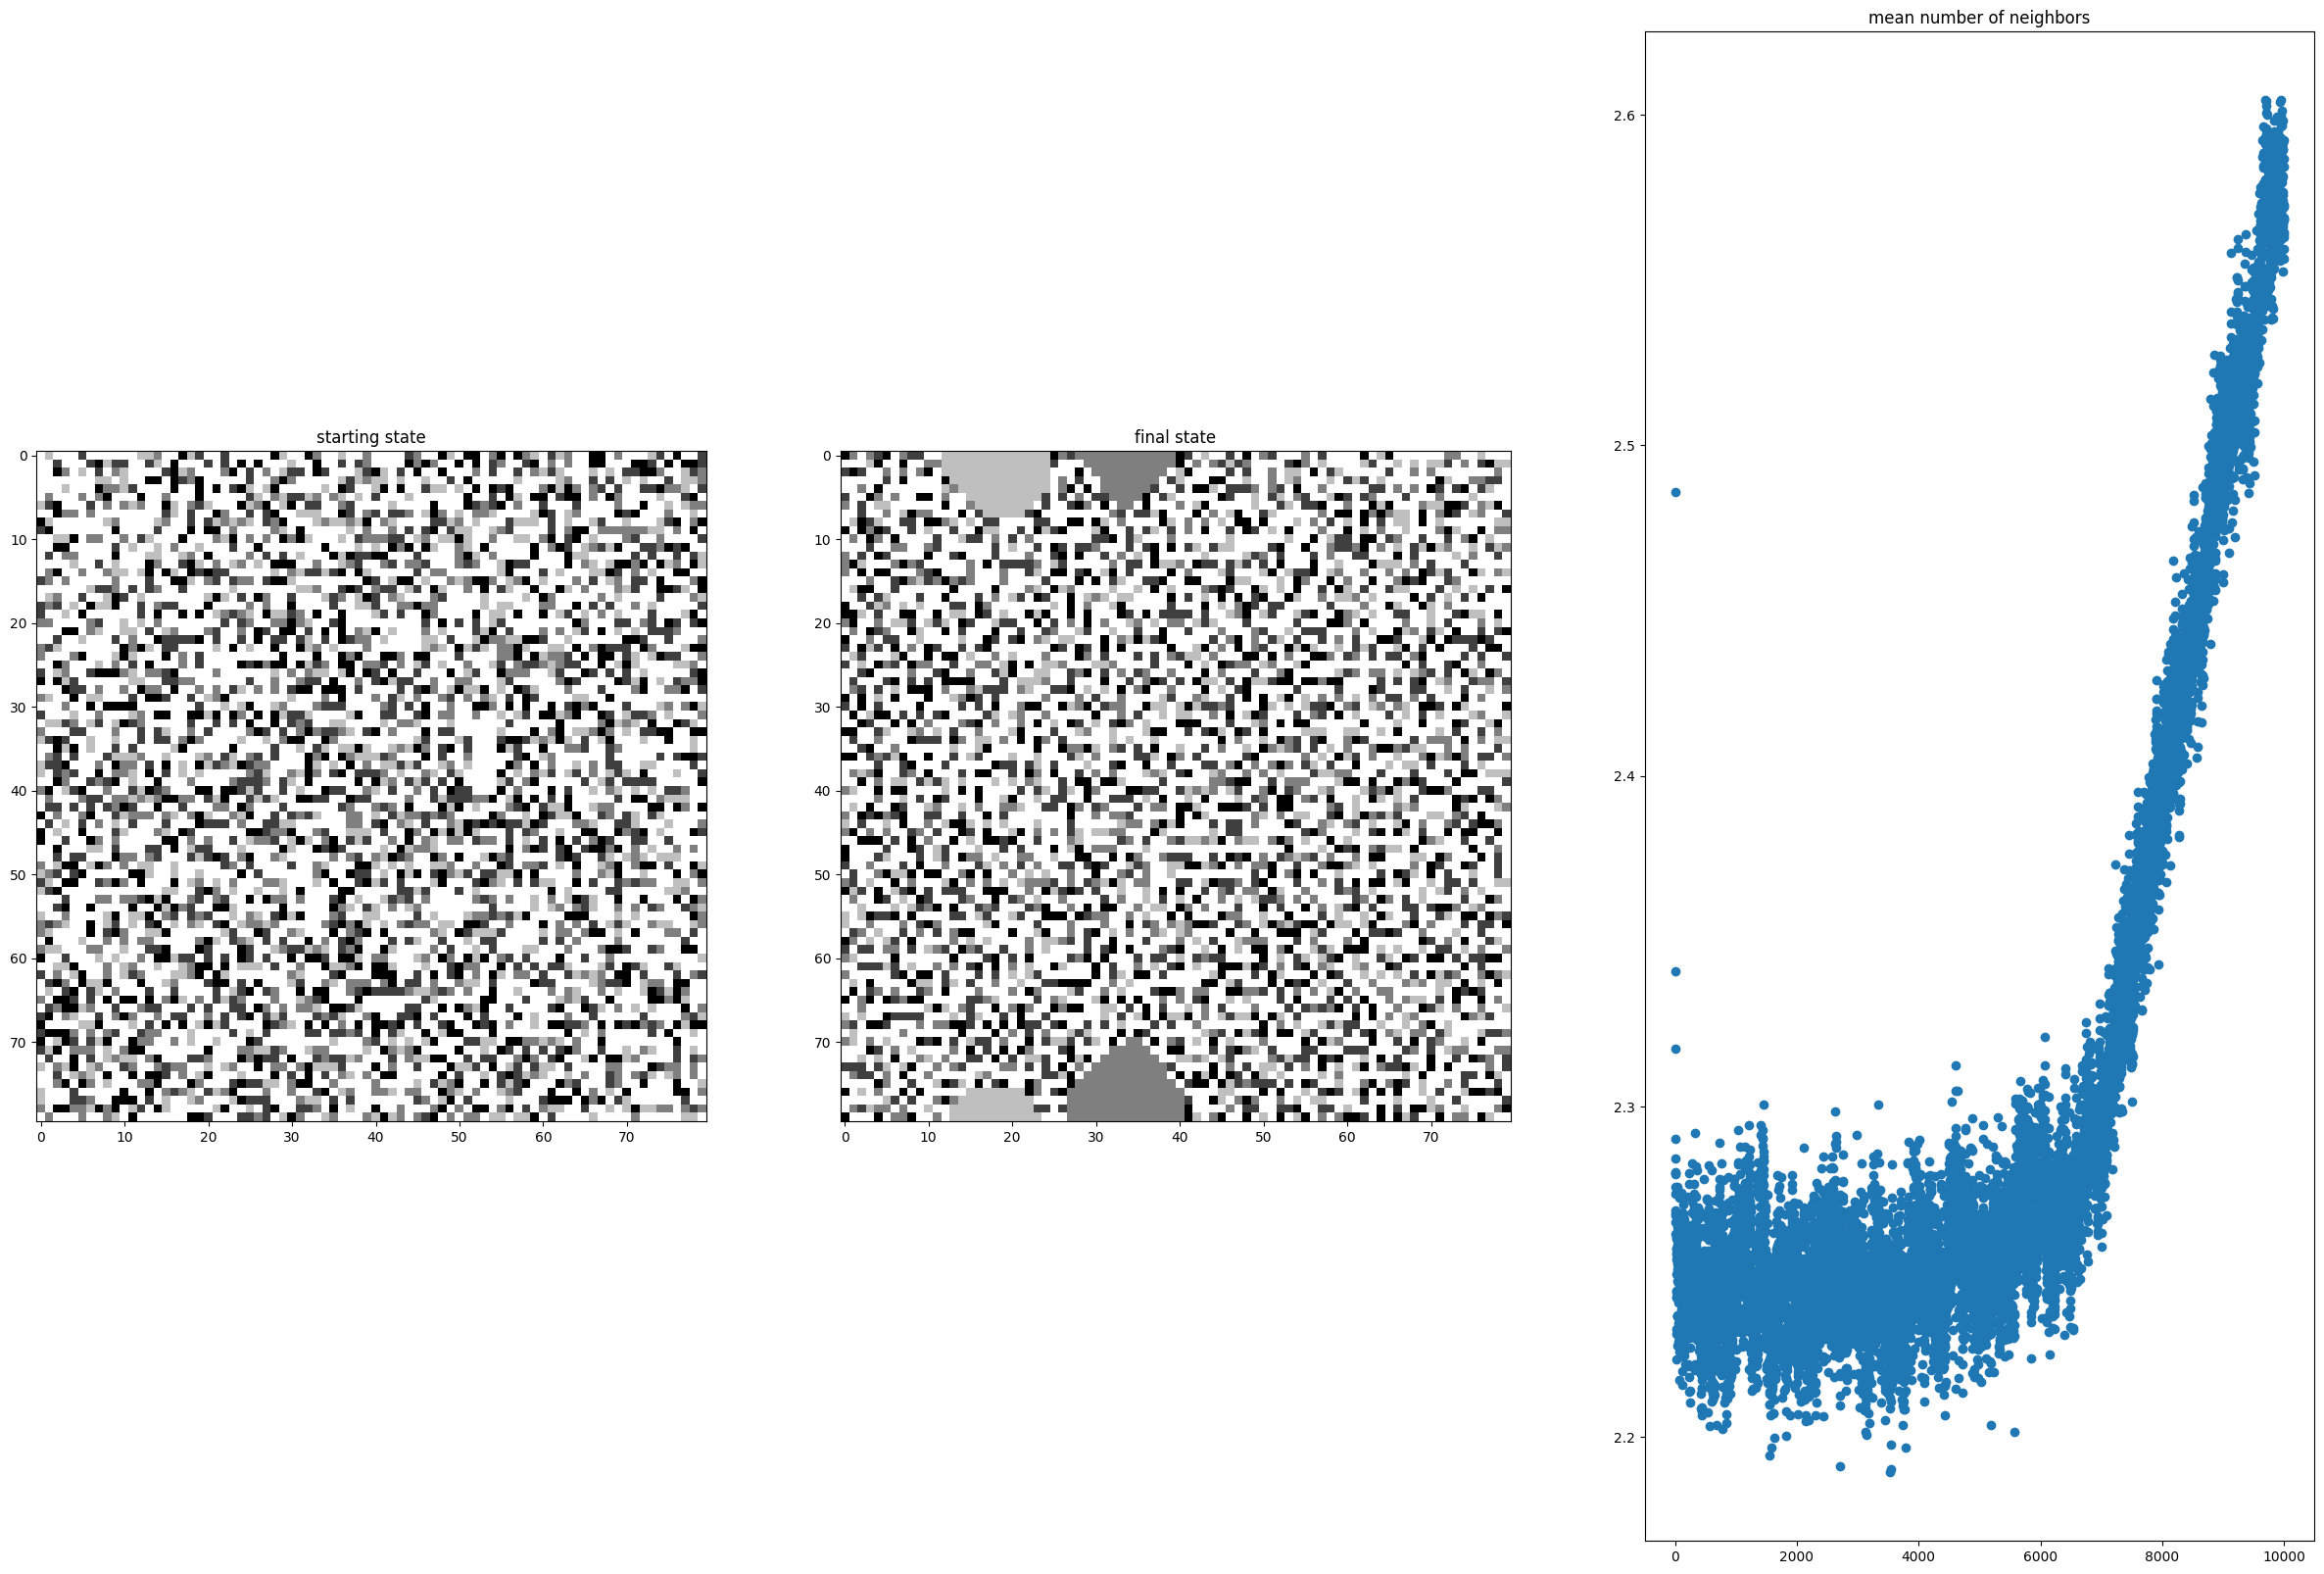

In [108]:
run_test(*test_cases[13],it=10000)

L=80 p=0.65 a=4 t=4


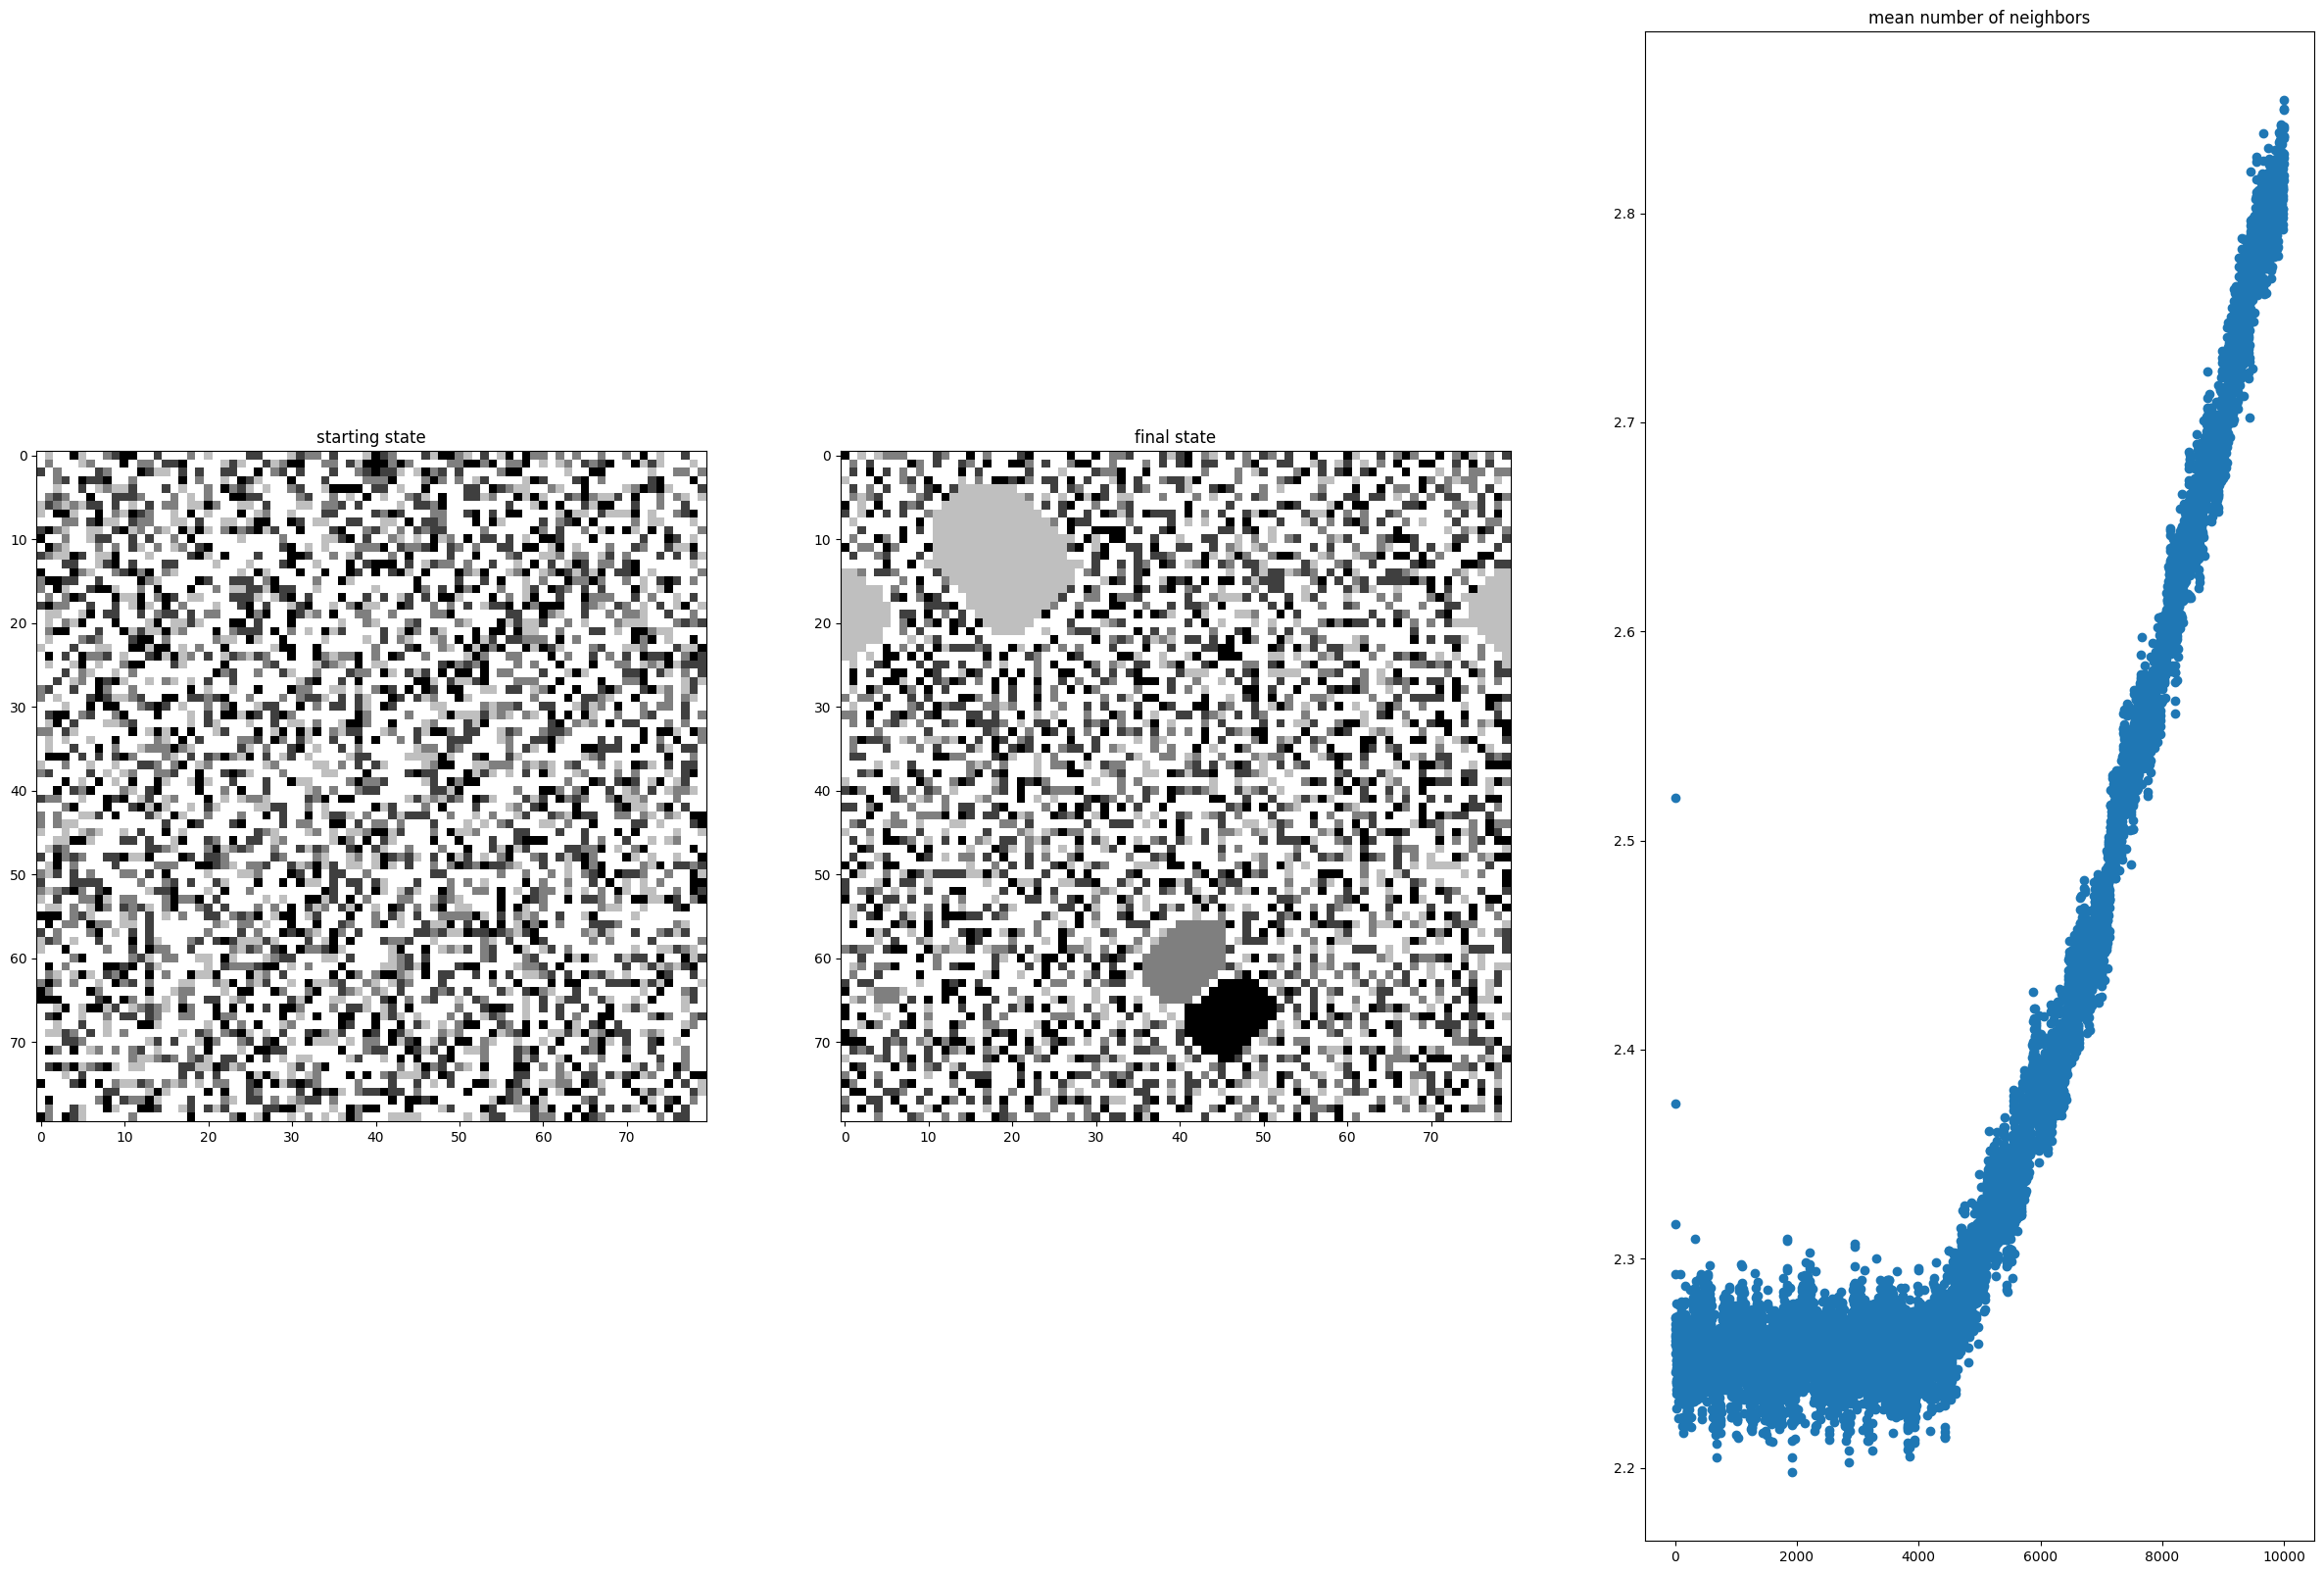

In [109]:
run_test(*test_cases[14],it=10000)

L=200 p=0.35 a=4 t=4


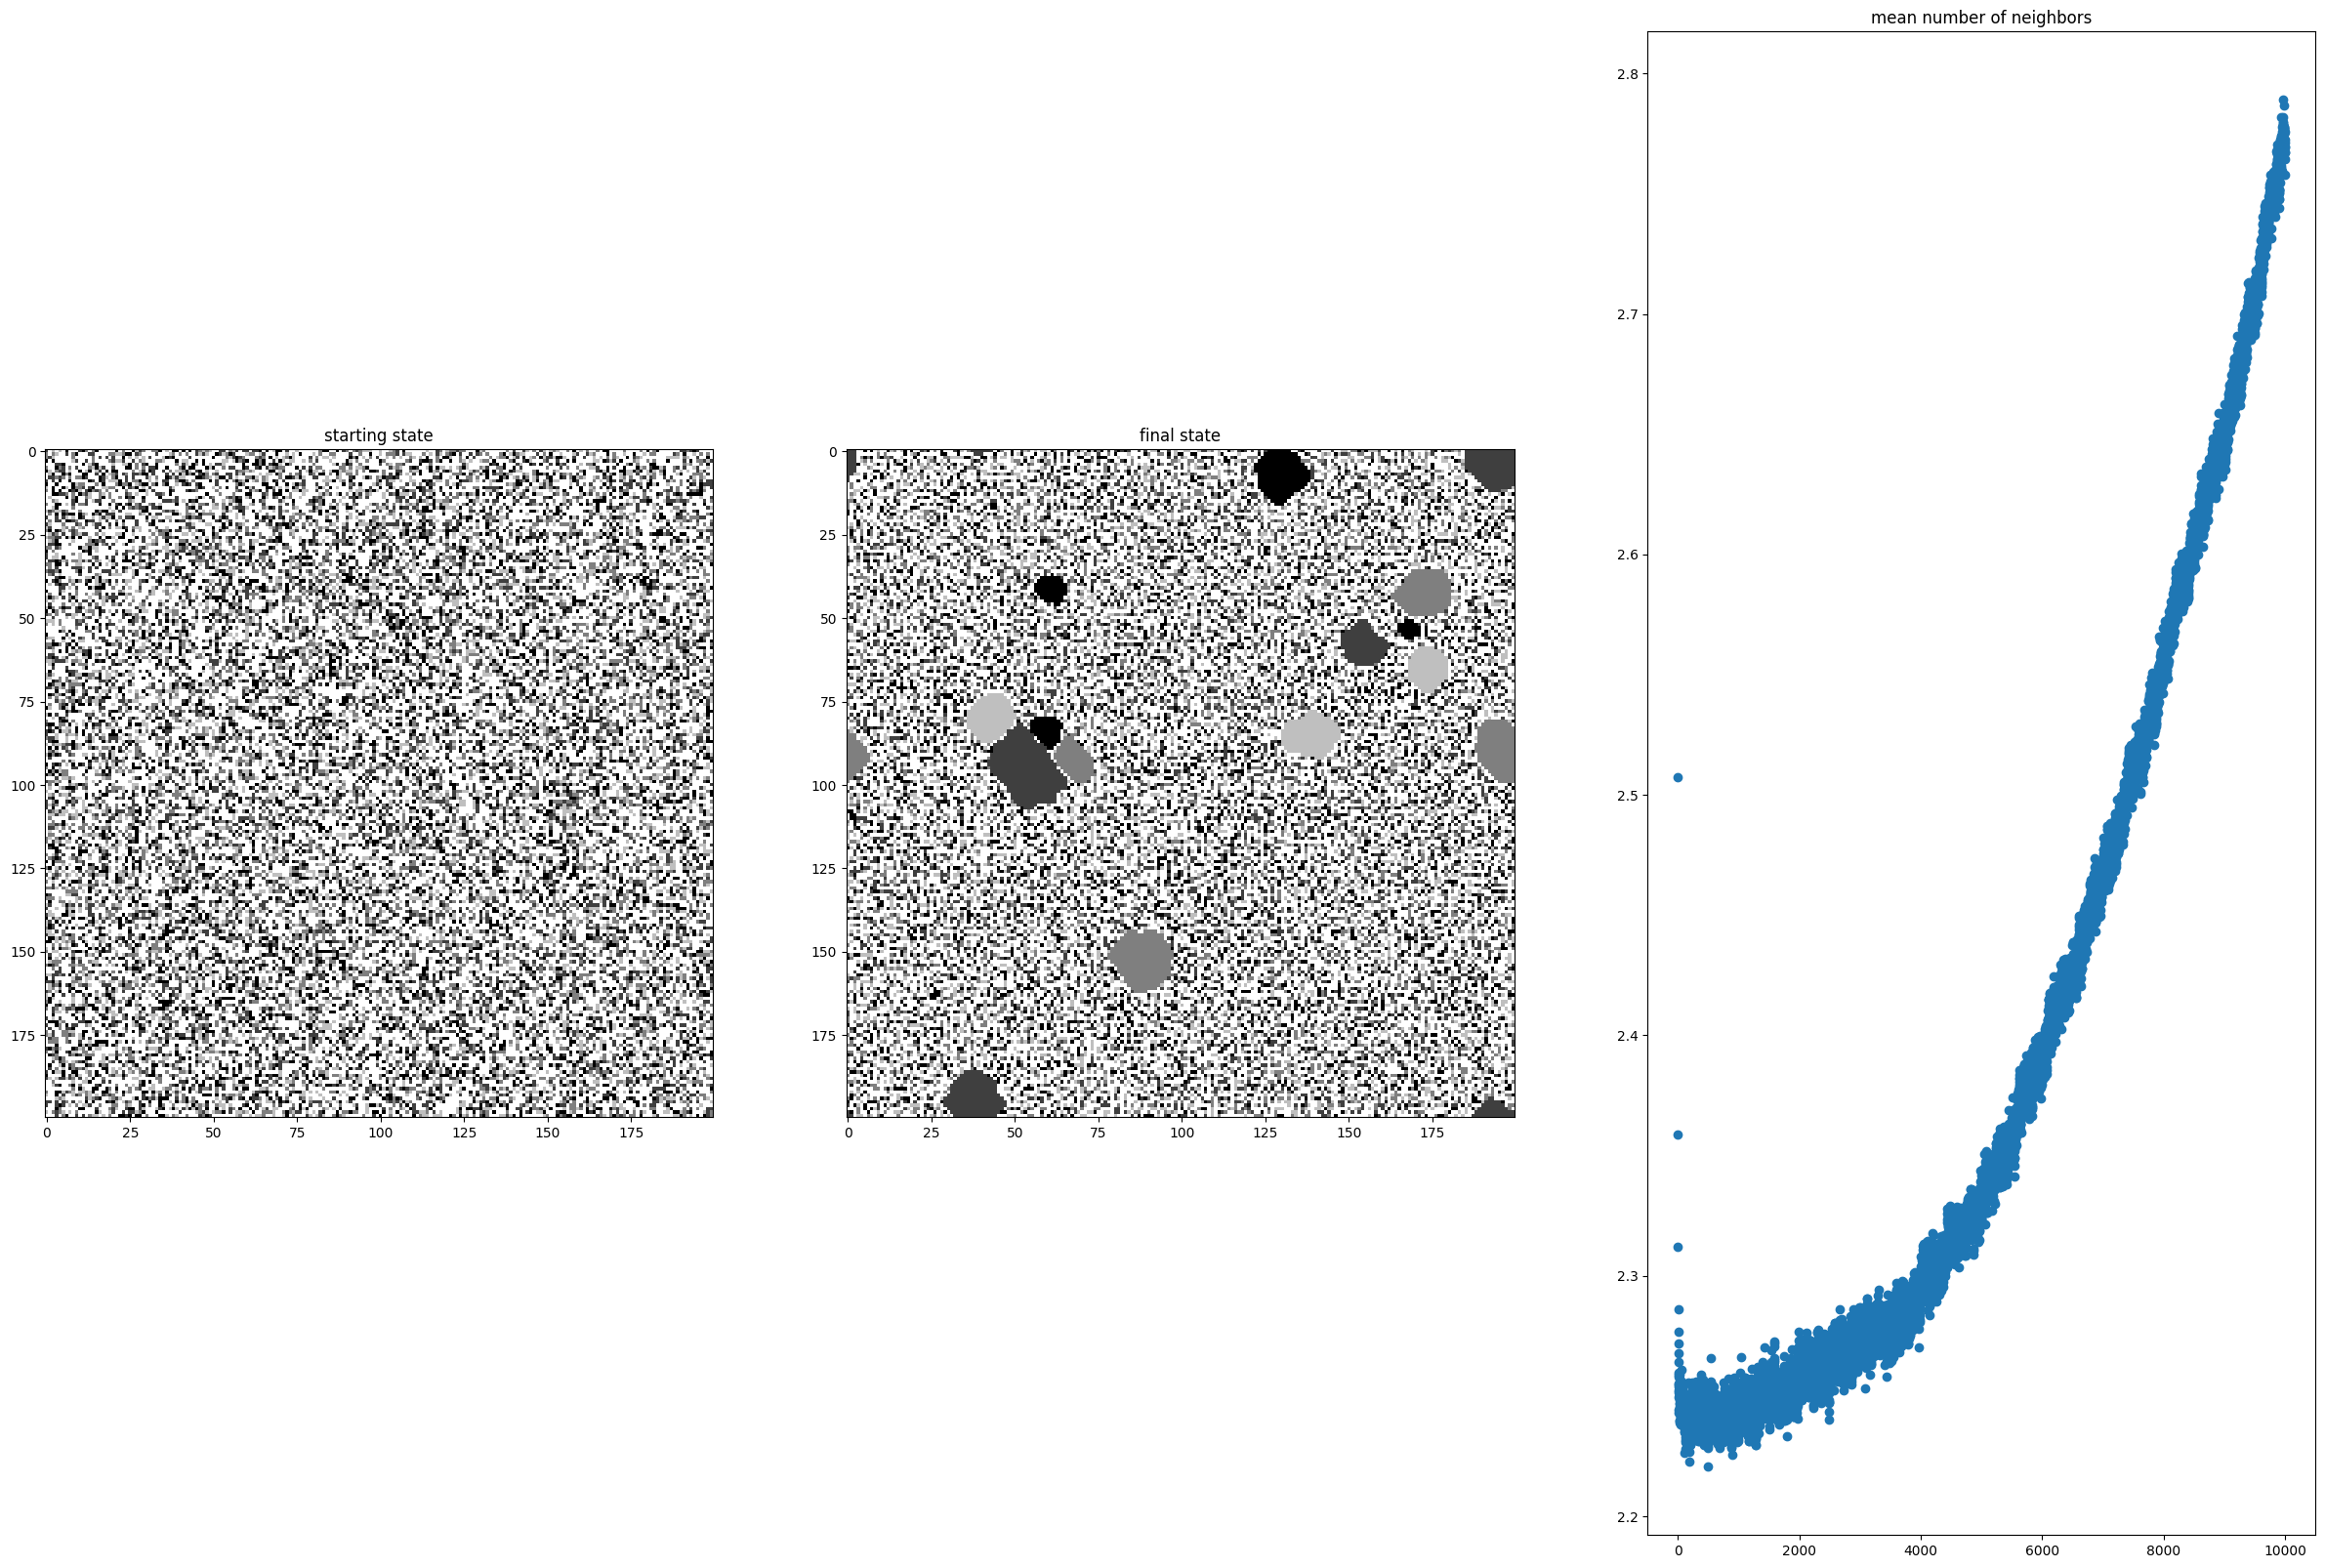

In [110]:
run_test(*test_cases[15],it=10000)

L=200 p=0.5 a=4 t=4


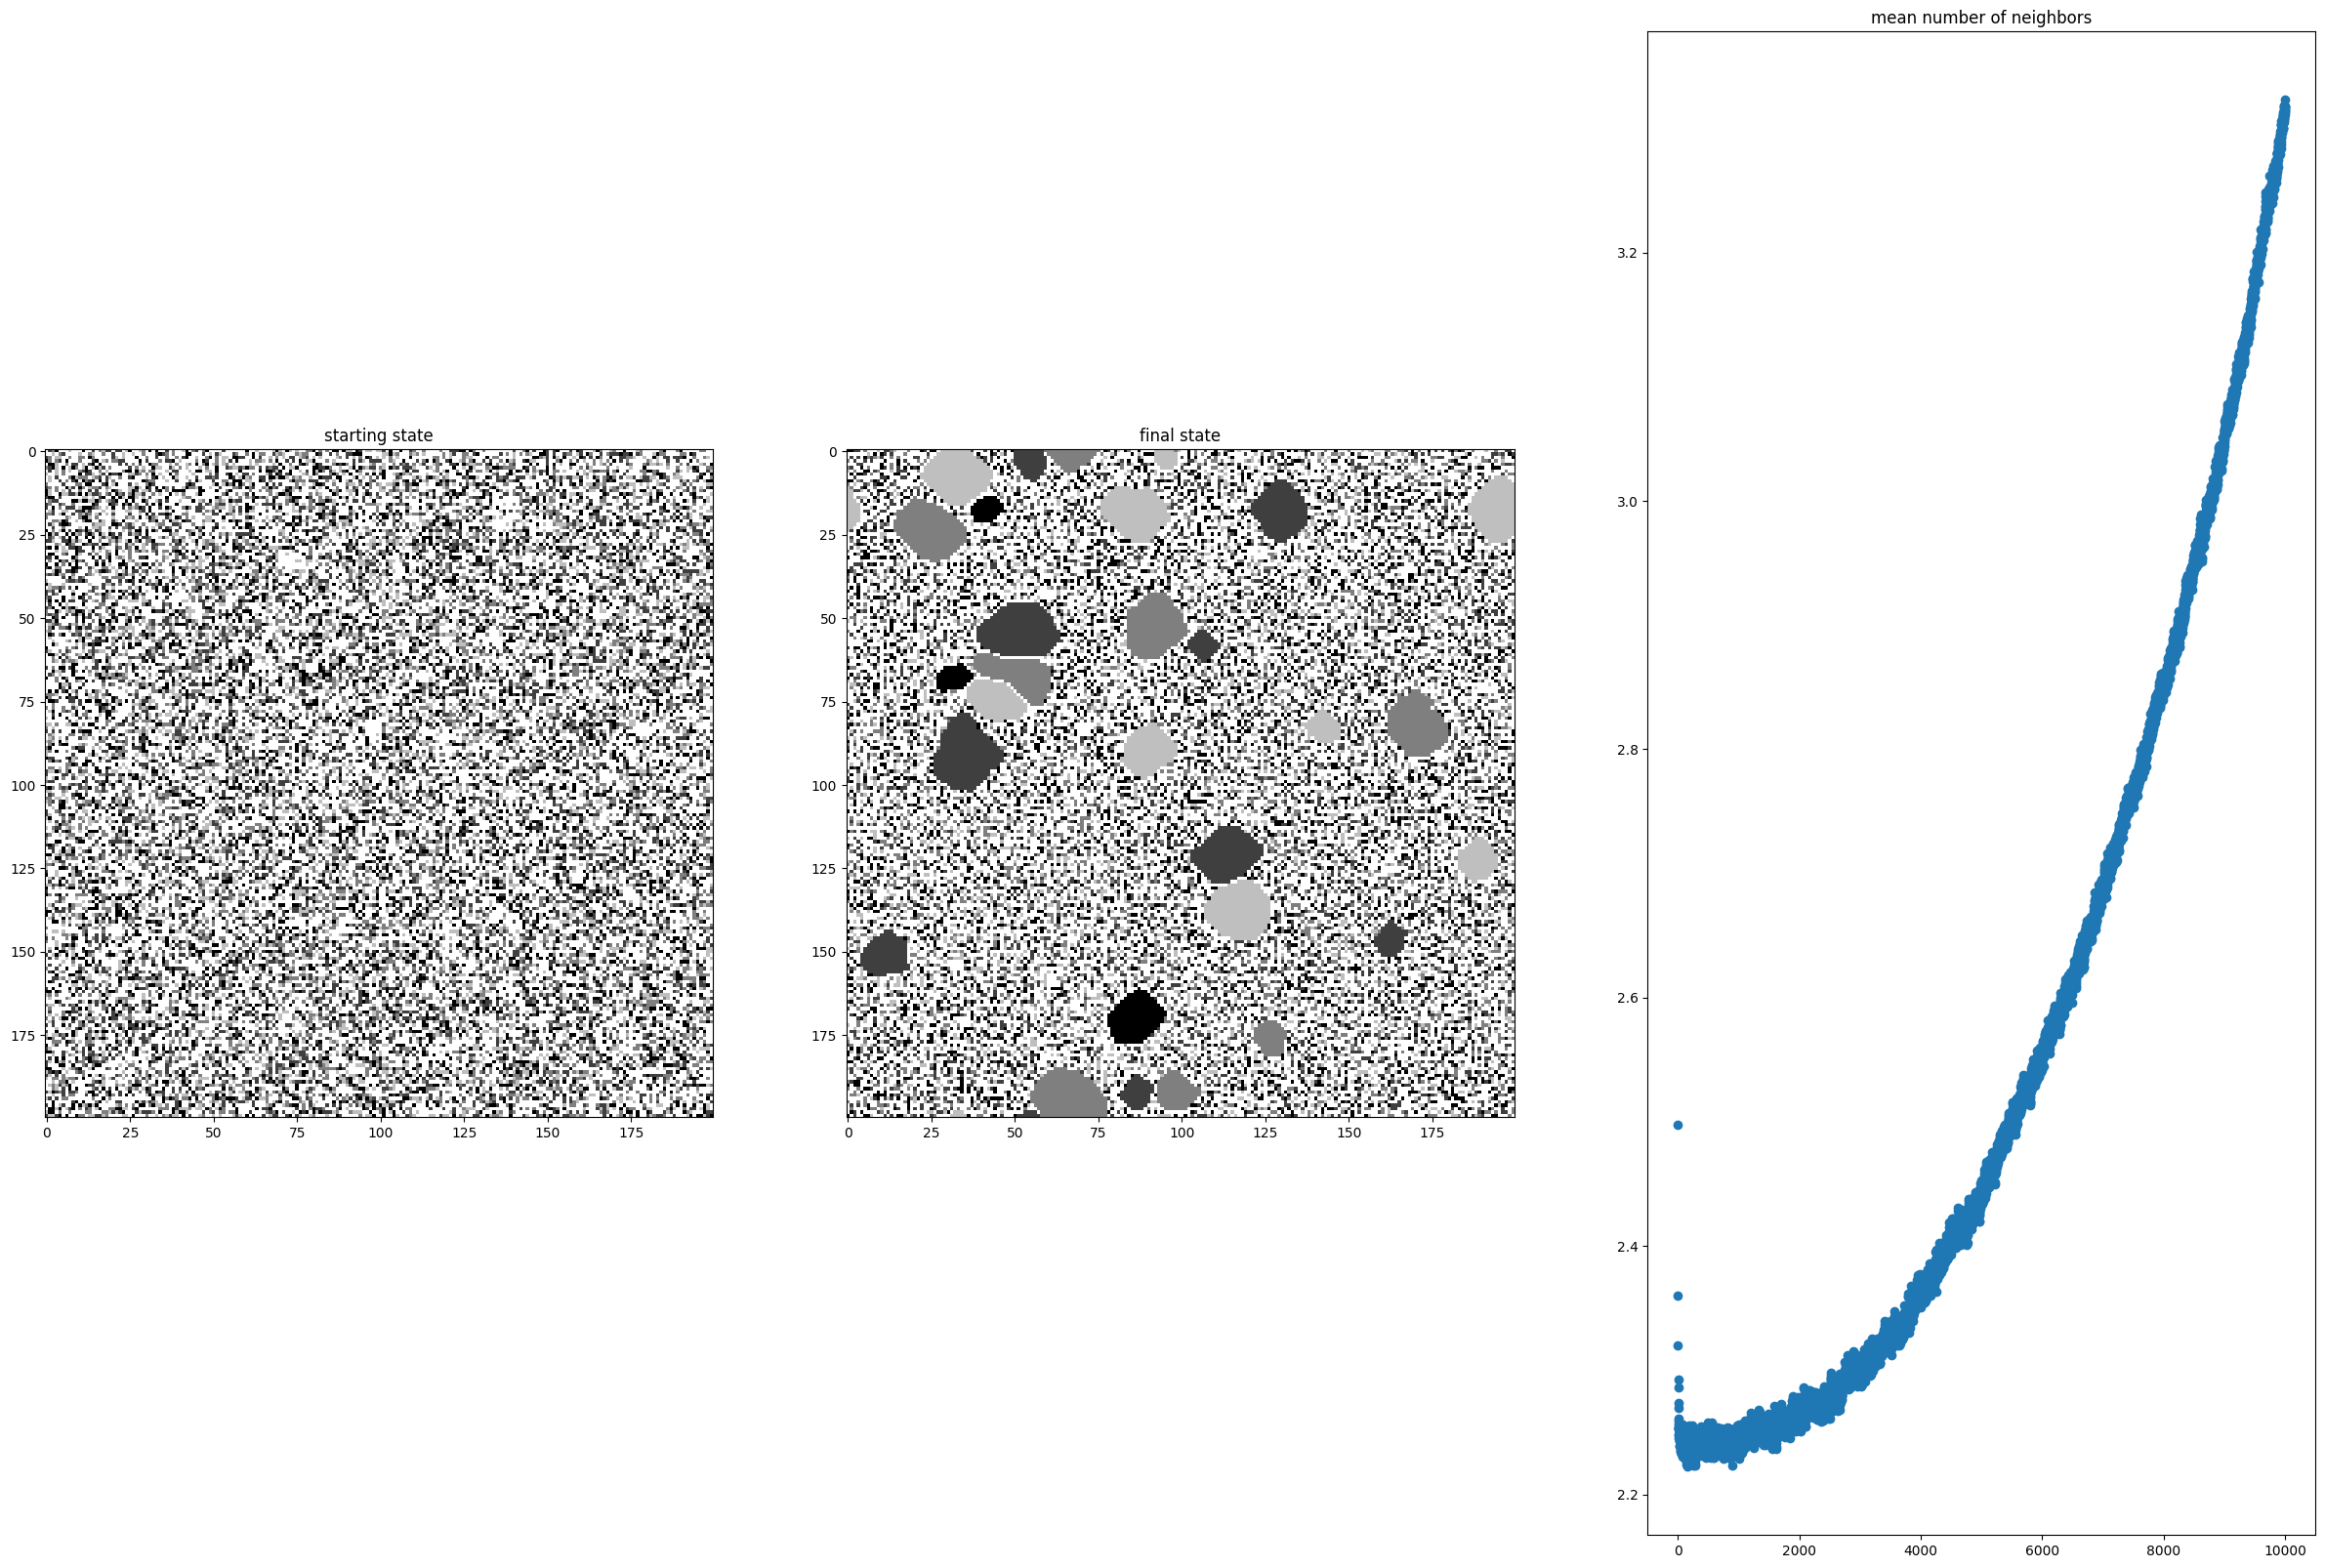

In [111]:
run_test(*test_cases[16],it=10000)

L=200 p=0.65 a=4 t=4


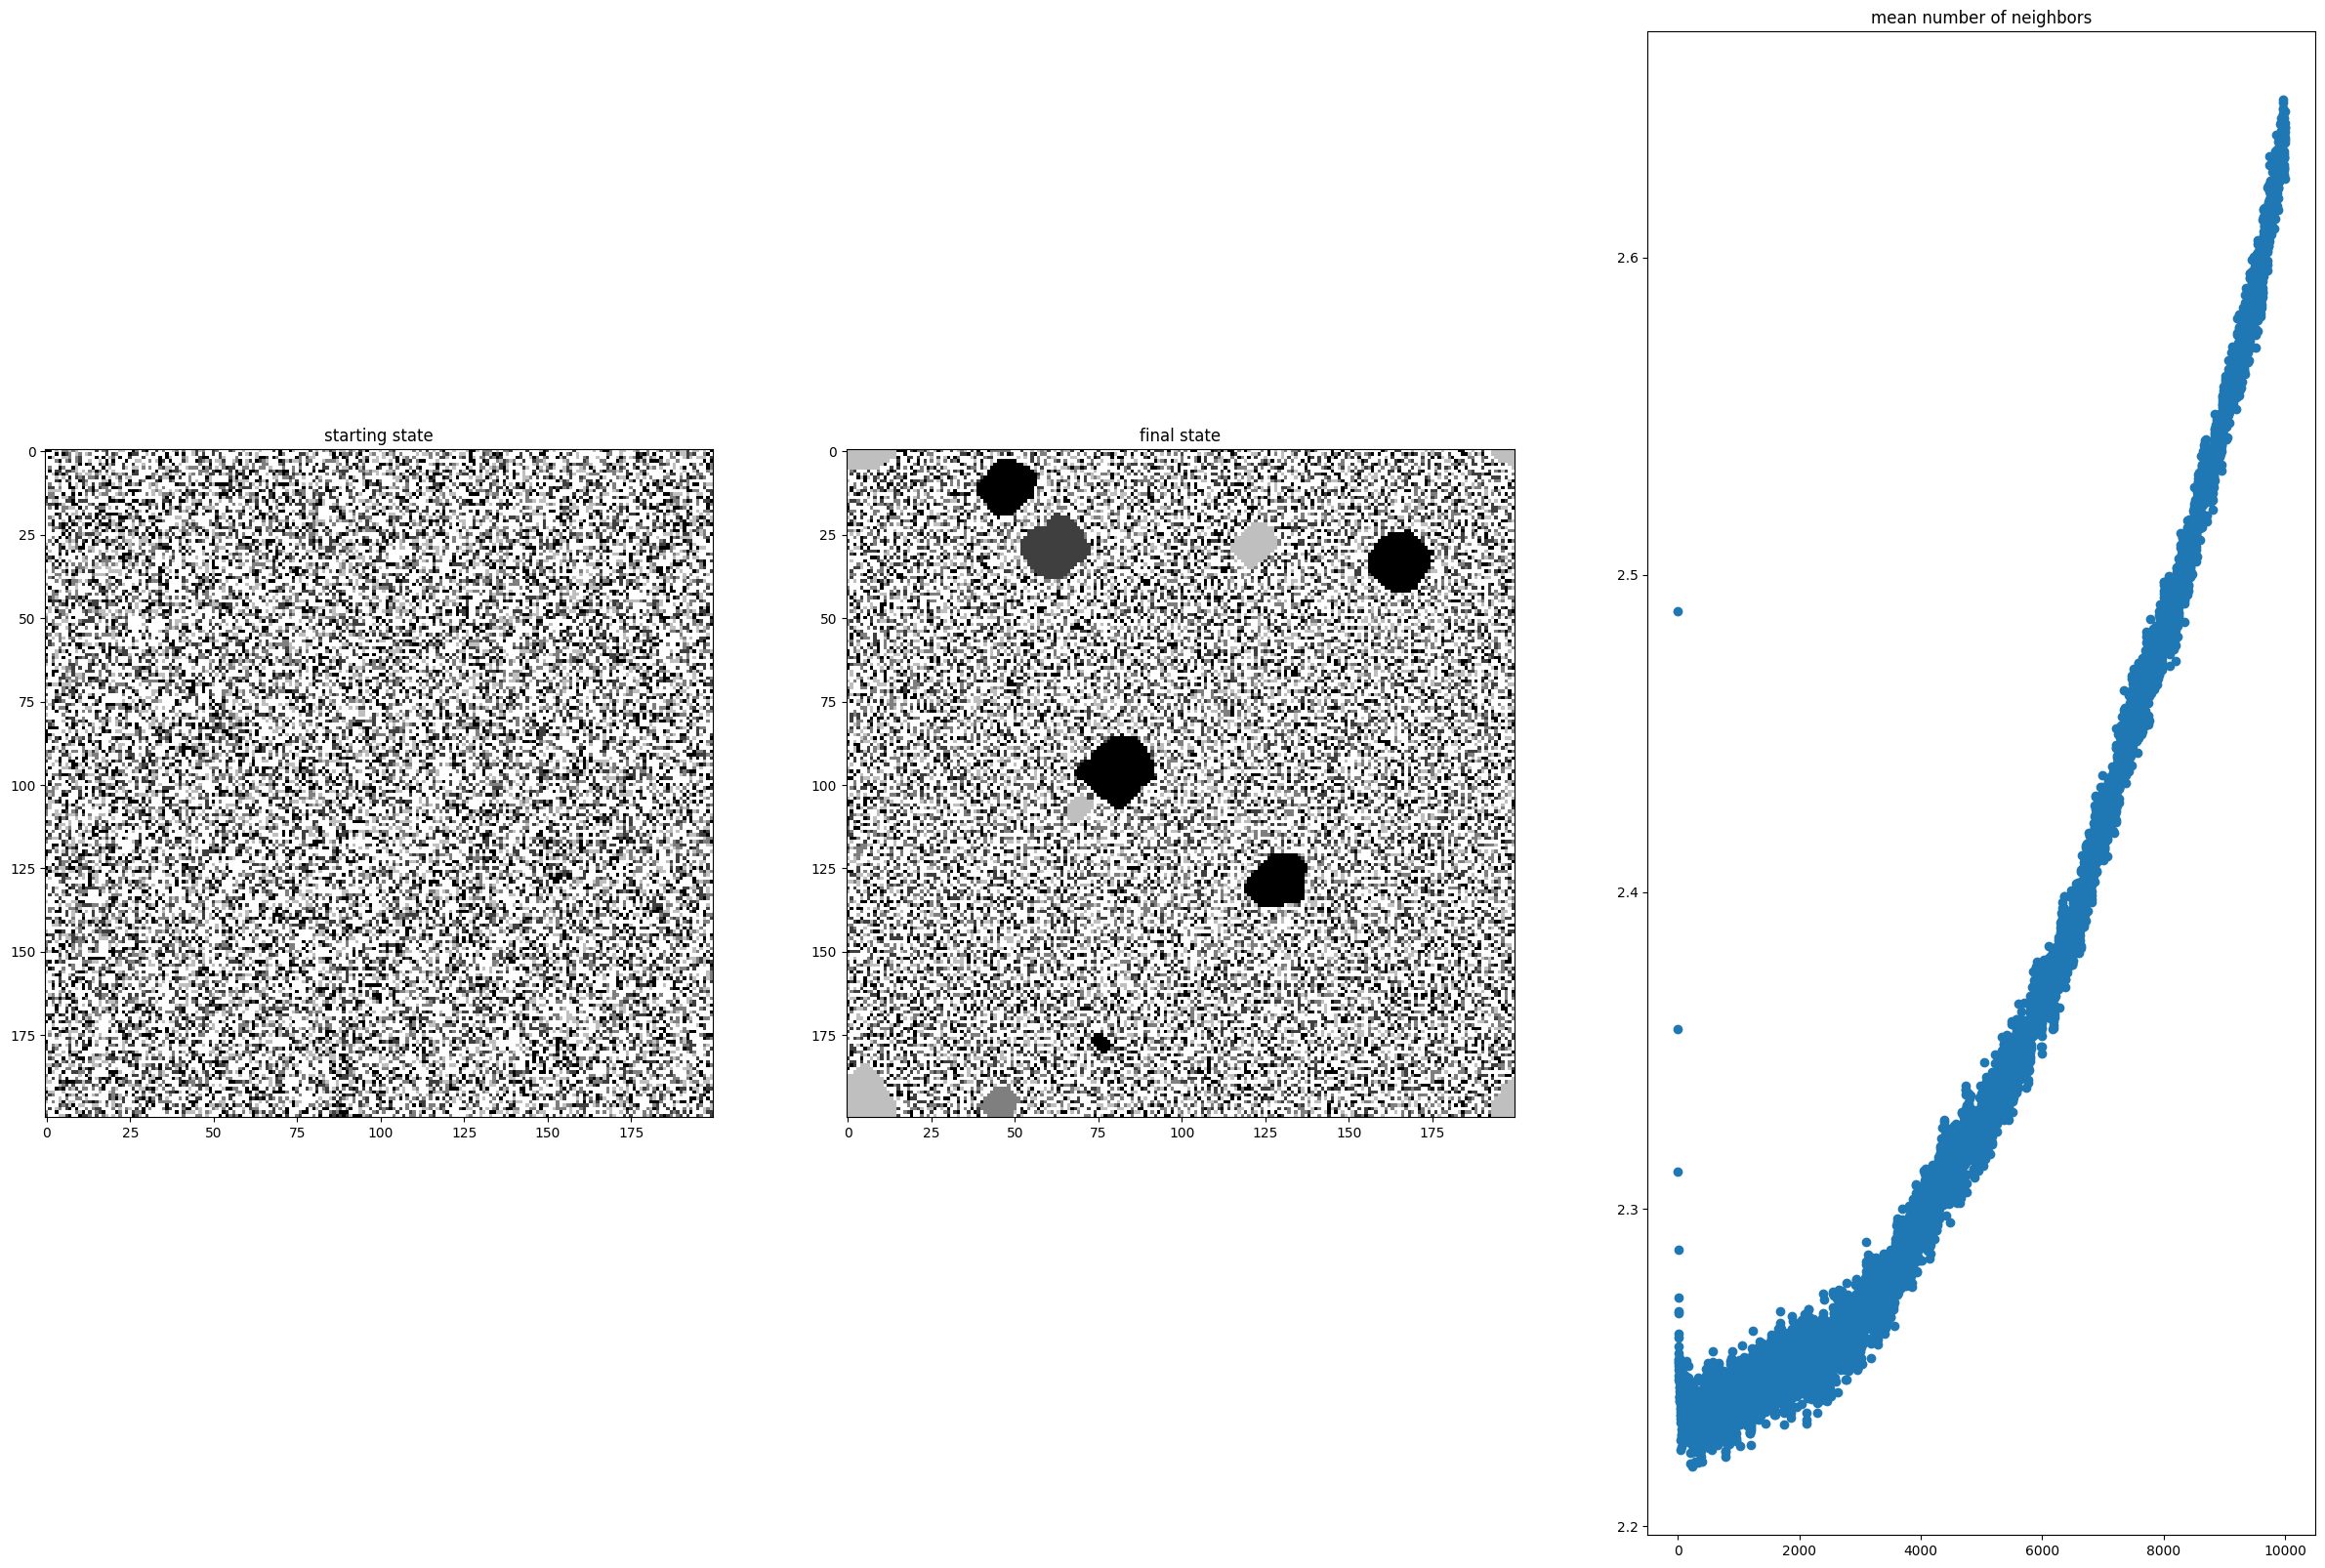

In [112]:
run_test(*test_cases[17],it=10000)

W przypadku 2 klas modele stabilizują się po około 3000 tysiącach iteracji, w przypadku 4 klas małe modele w ogóle nie są zbieżne, natomiast duże zbiegają zdecydowanie wolniej niż w przypadku 2 klas (wykonane eksperymenty po 10 000 iteracji zajmowało około 90 minut każdy)

## Zadanie 2* Model Gaylorda - D’Andria

In [124]:
from collections import defaultdict

def evolve2(matrix,a):
    L,_ = matrix.shape
    moves = defaultdict(lambda: [])
    empty = defaultdict(lambda: [])
    final_moves = []
    neighbors_sum = 0
    neighbors_n = 0
    for i in range(L):
        for j in range(L):
            neighbors = count_neighbors(matrix,i,j)
            neighbors_sum += neighbors
            neighbors_n += 1
            if neighbors < a:
                empty[matrix[i][j]] += find_empty(matrix,i,j)
                moves[matrix[i][j]].append((i,j))
    
    for _, e in empty.items():
        np.random.shuffle(e)
    
    for t in moves.keys():
        m = moves[t]
        e = empty[t][:len(m)]
        final_moves += list(zip(e,m))
        
    final_moves = remove_conflicts(final_moves)
    
    
    for dest,org in final_moves:
        dx,dy = dest
        ox,oy = org
        matrix[dx][dy],matrix[ox][oy] = matrix[ox][oy],matrix[dx][dy]
    
    return matrix, neighbors_sum/neighbors_n

In [125]:
def run_test2(L,p,a,t = 2, it=3000):
    fig, axis = plt.subplots(1, 3)
    fig.set_figheight(20)
    fig.set_figwidth(30)
    print(f'L={L} p={p} a={a} t={t}')
    
    matrix = generate_matrix(L,p,t)
    mns = []
    axis[0].imshow(matrix, cmap='binary', vmin=0, vmax=t, interpolation='nearest')
    axis[0].set_title('starting state')

    for _ in range(it):
        matrix, mn = evolve2(matrix,a)
        mns.append(mn)

    axis[1].imshow(matrix, cmap='binary', vmin=0, vmax=t, interpolation='nearest')
    axis[1].set_title('final state')
    axis[2].scatter(range(it),mns)
    axis[2].set_title('mean number of neighbors')

L=20 p=0.35 a=4 t=2


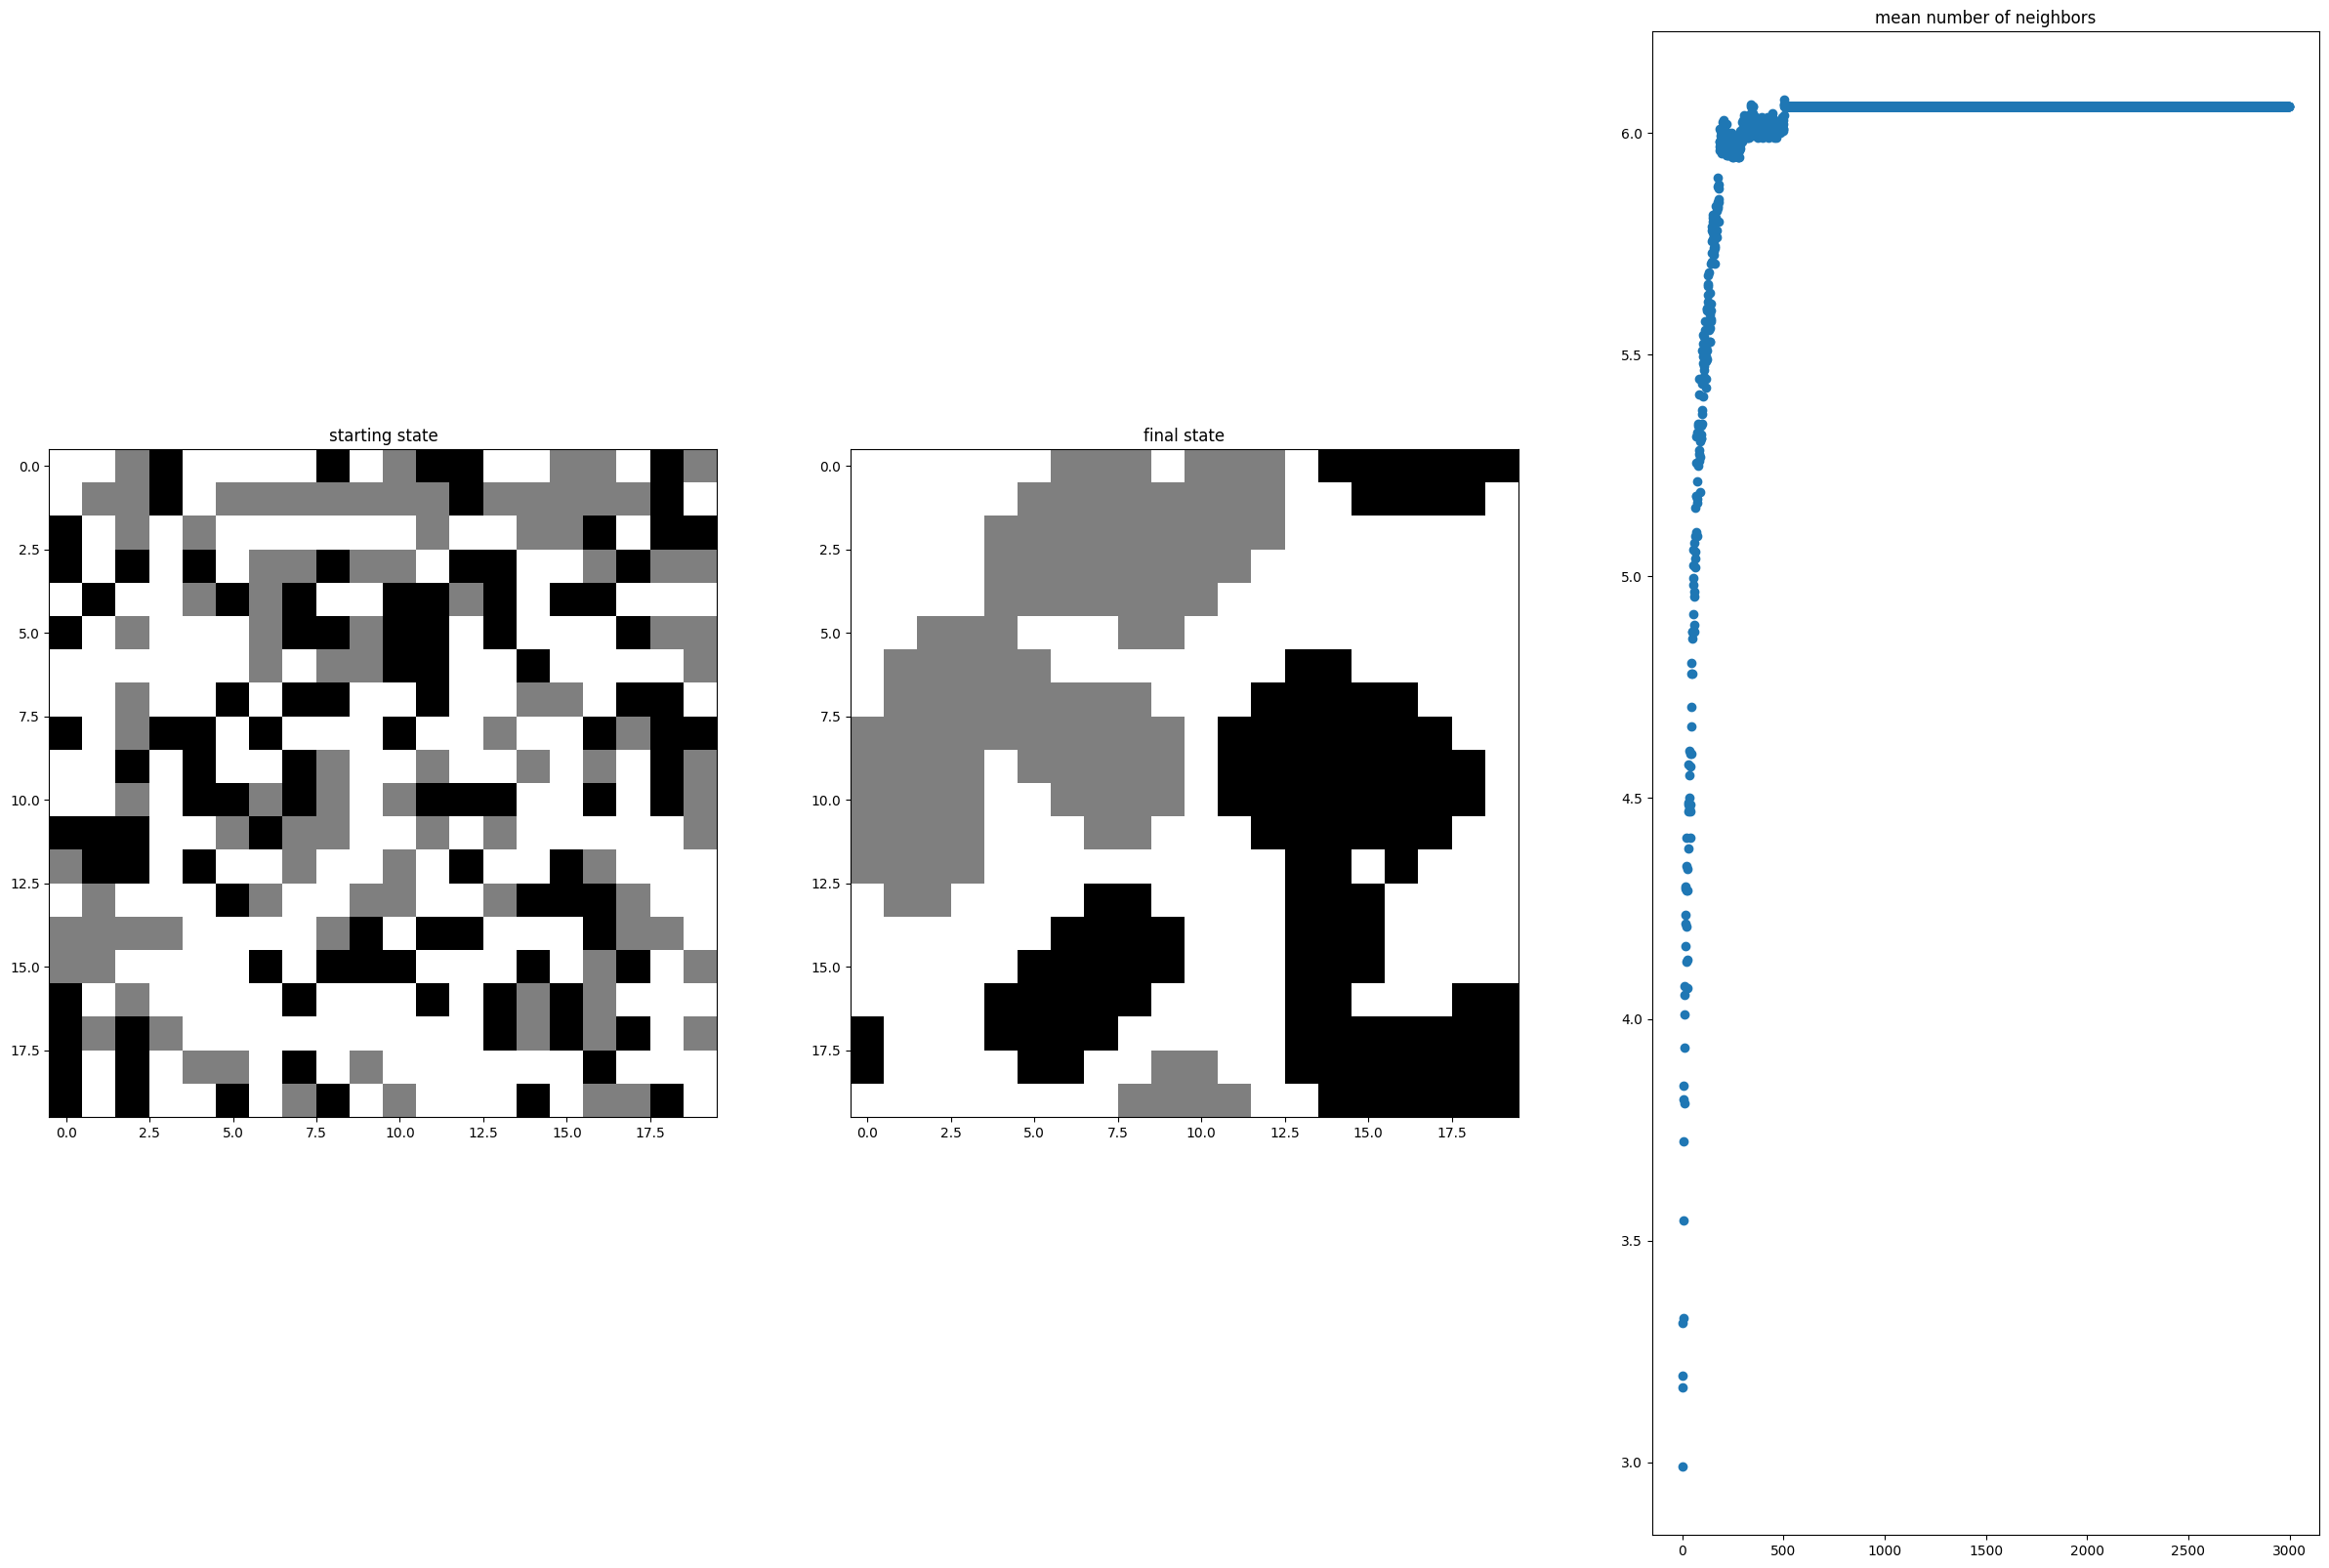

In [126]:
run_test2(*test_cases[0])

L=20 p=0.5 a=4 t=2


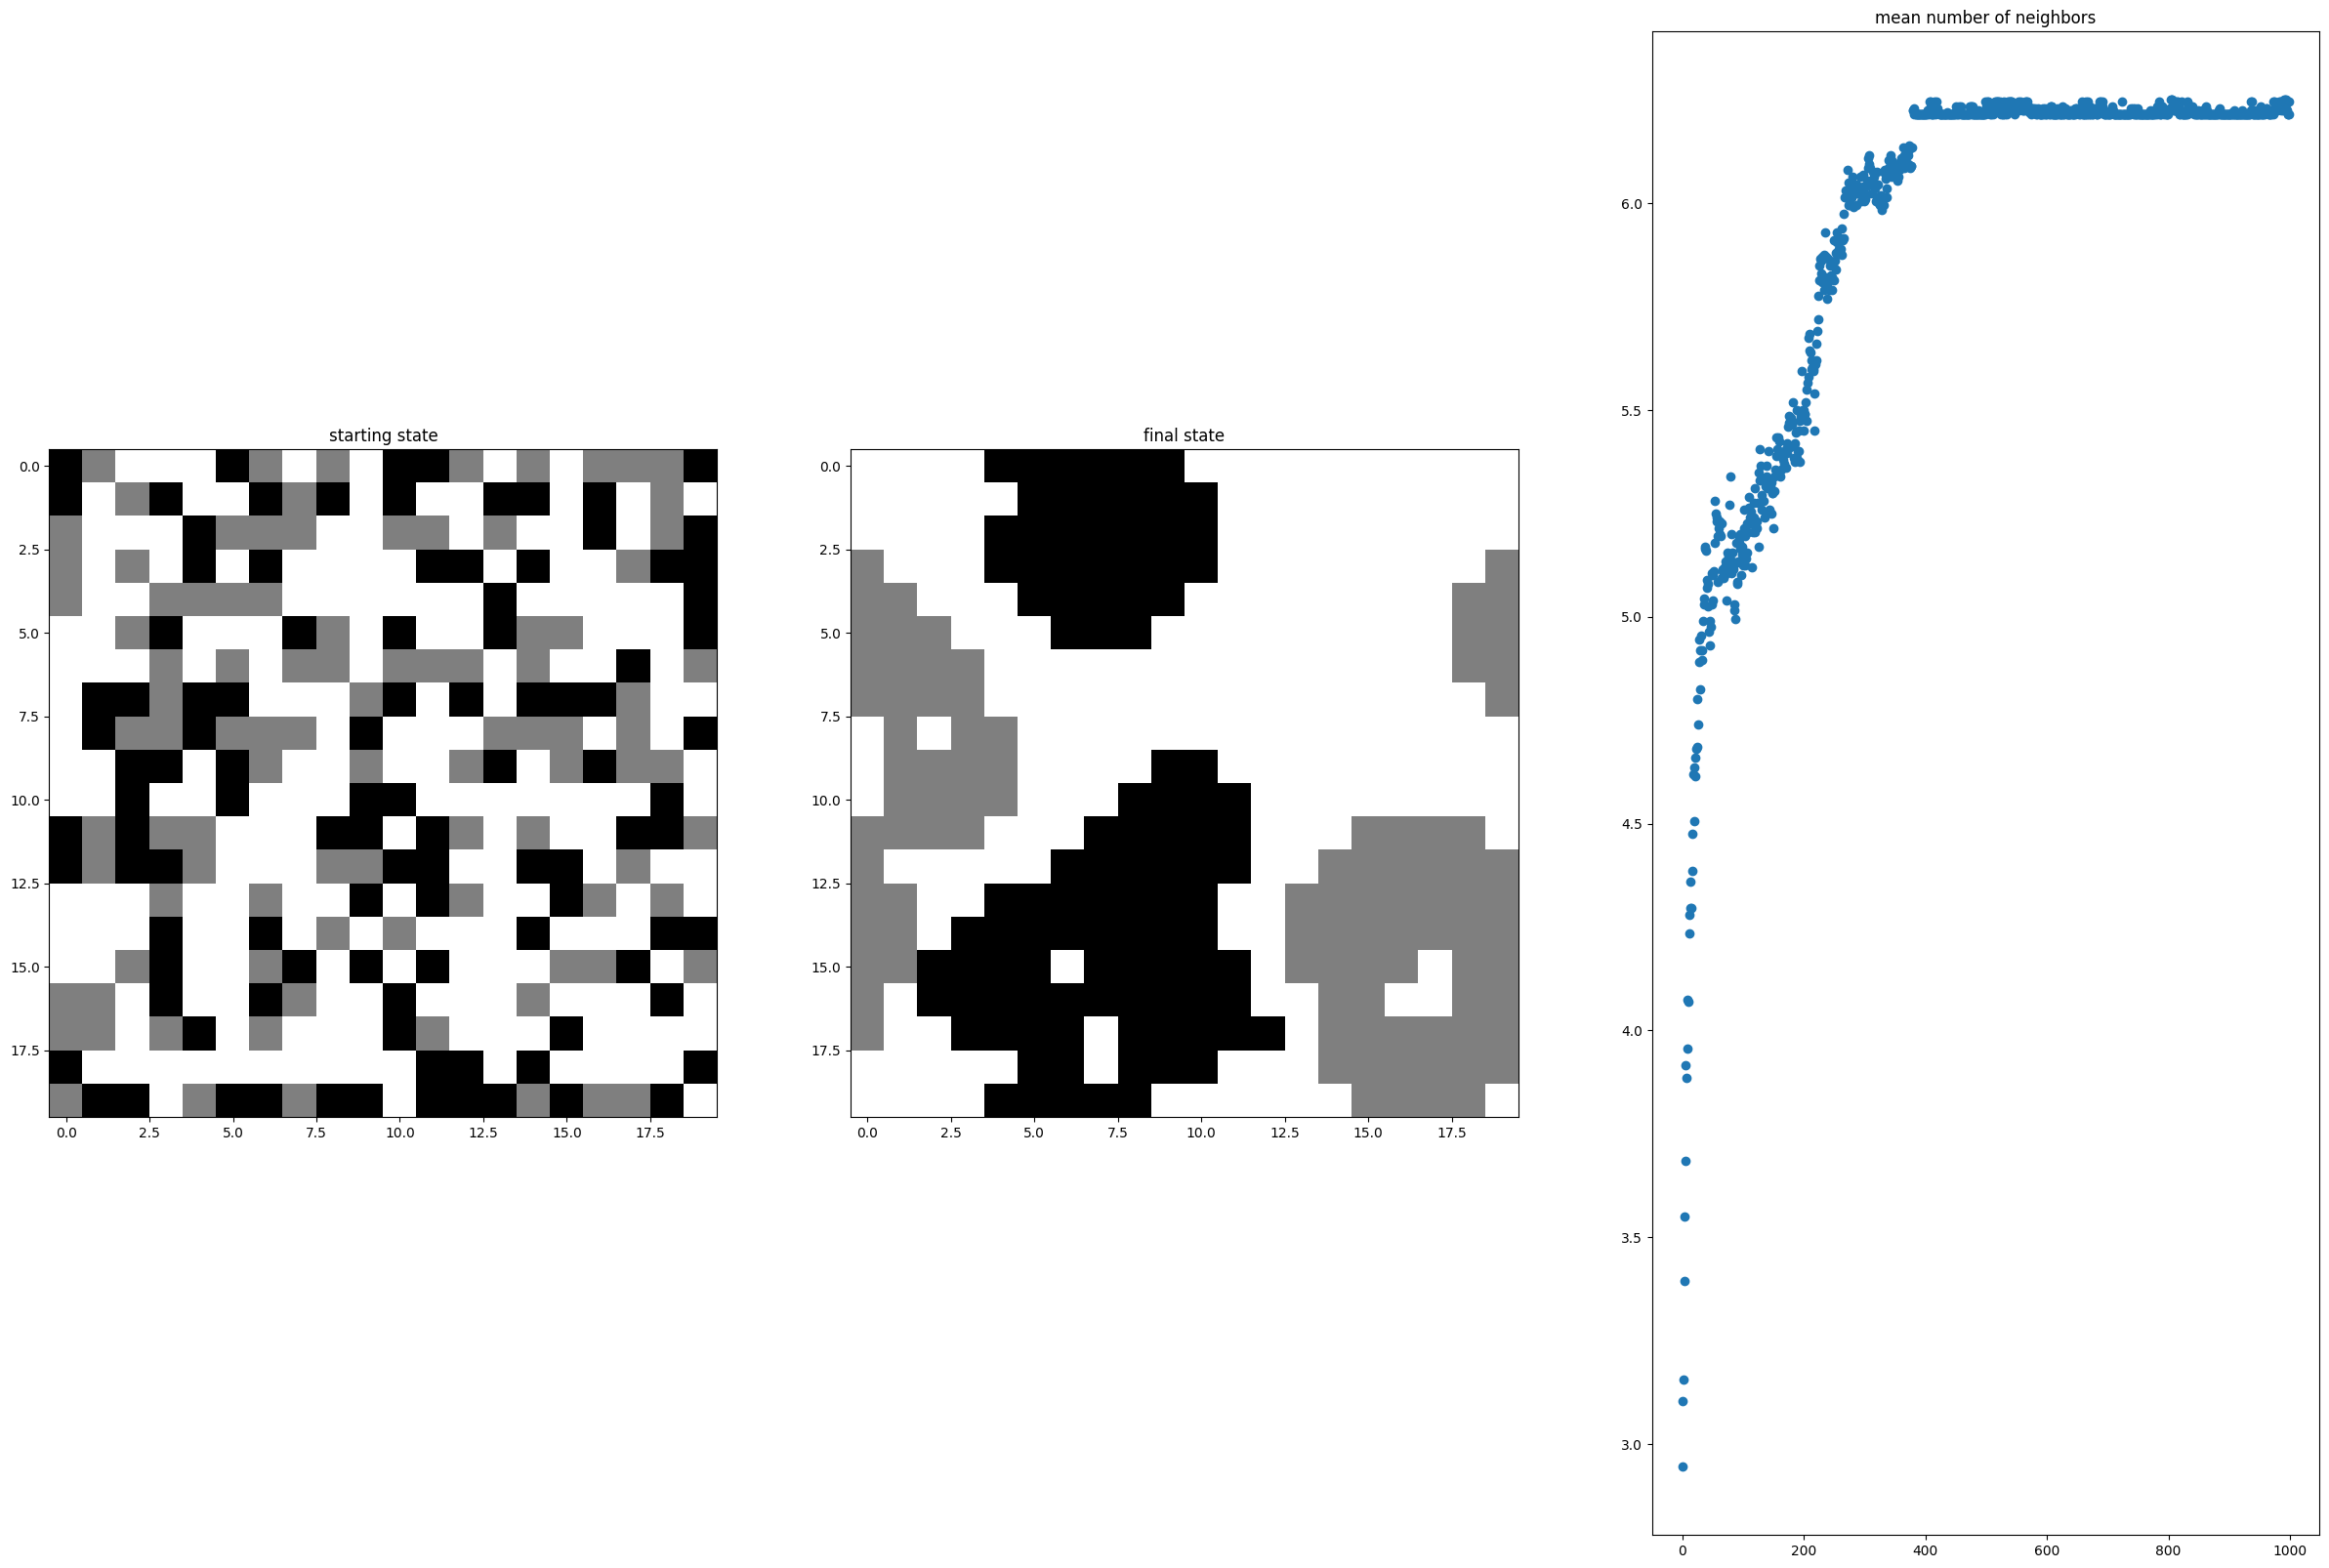

In [128]:
run_test2(*test_cases[1], it=1000)

L=20 p=0.65 a=4 t=2


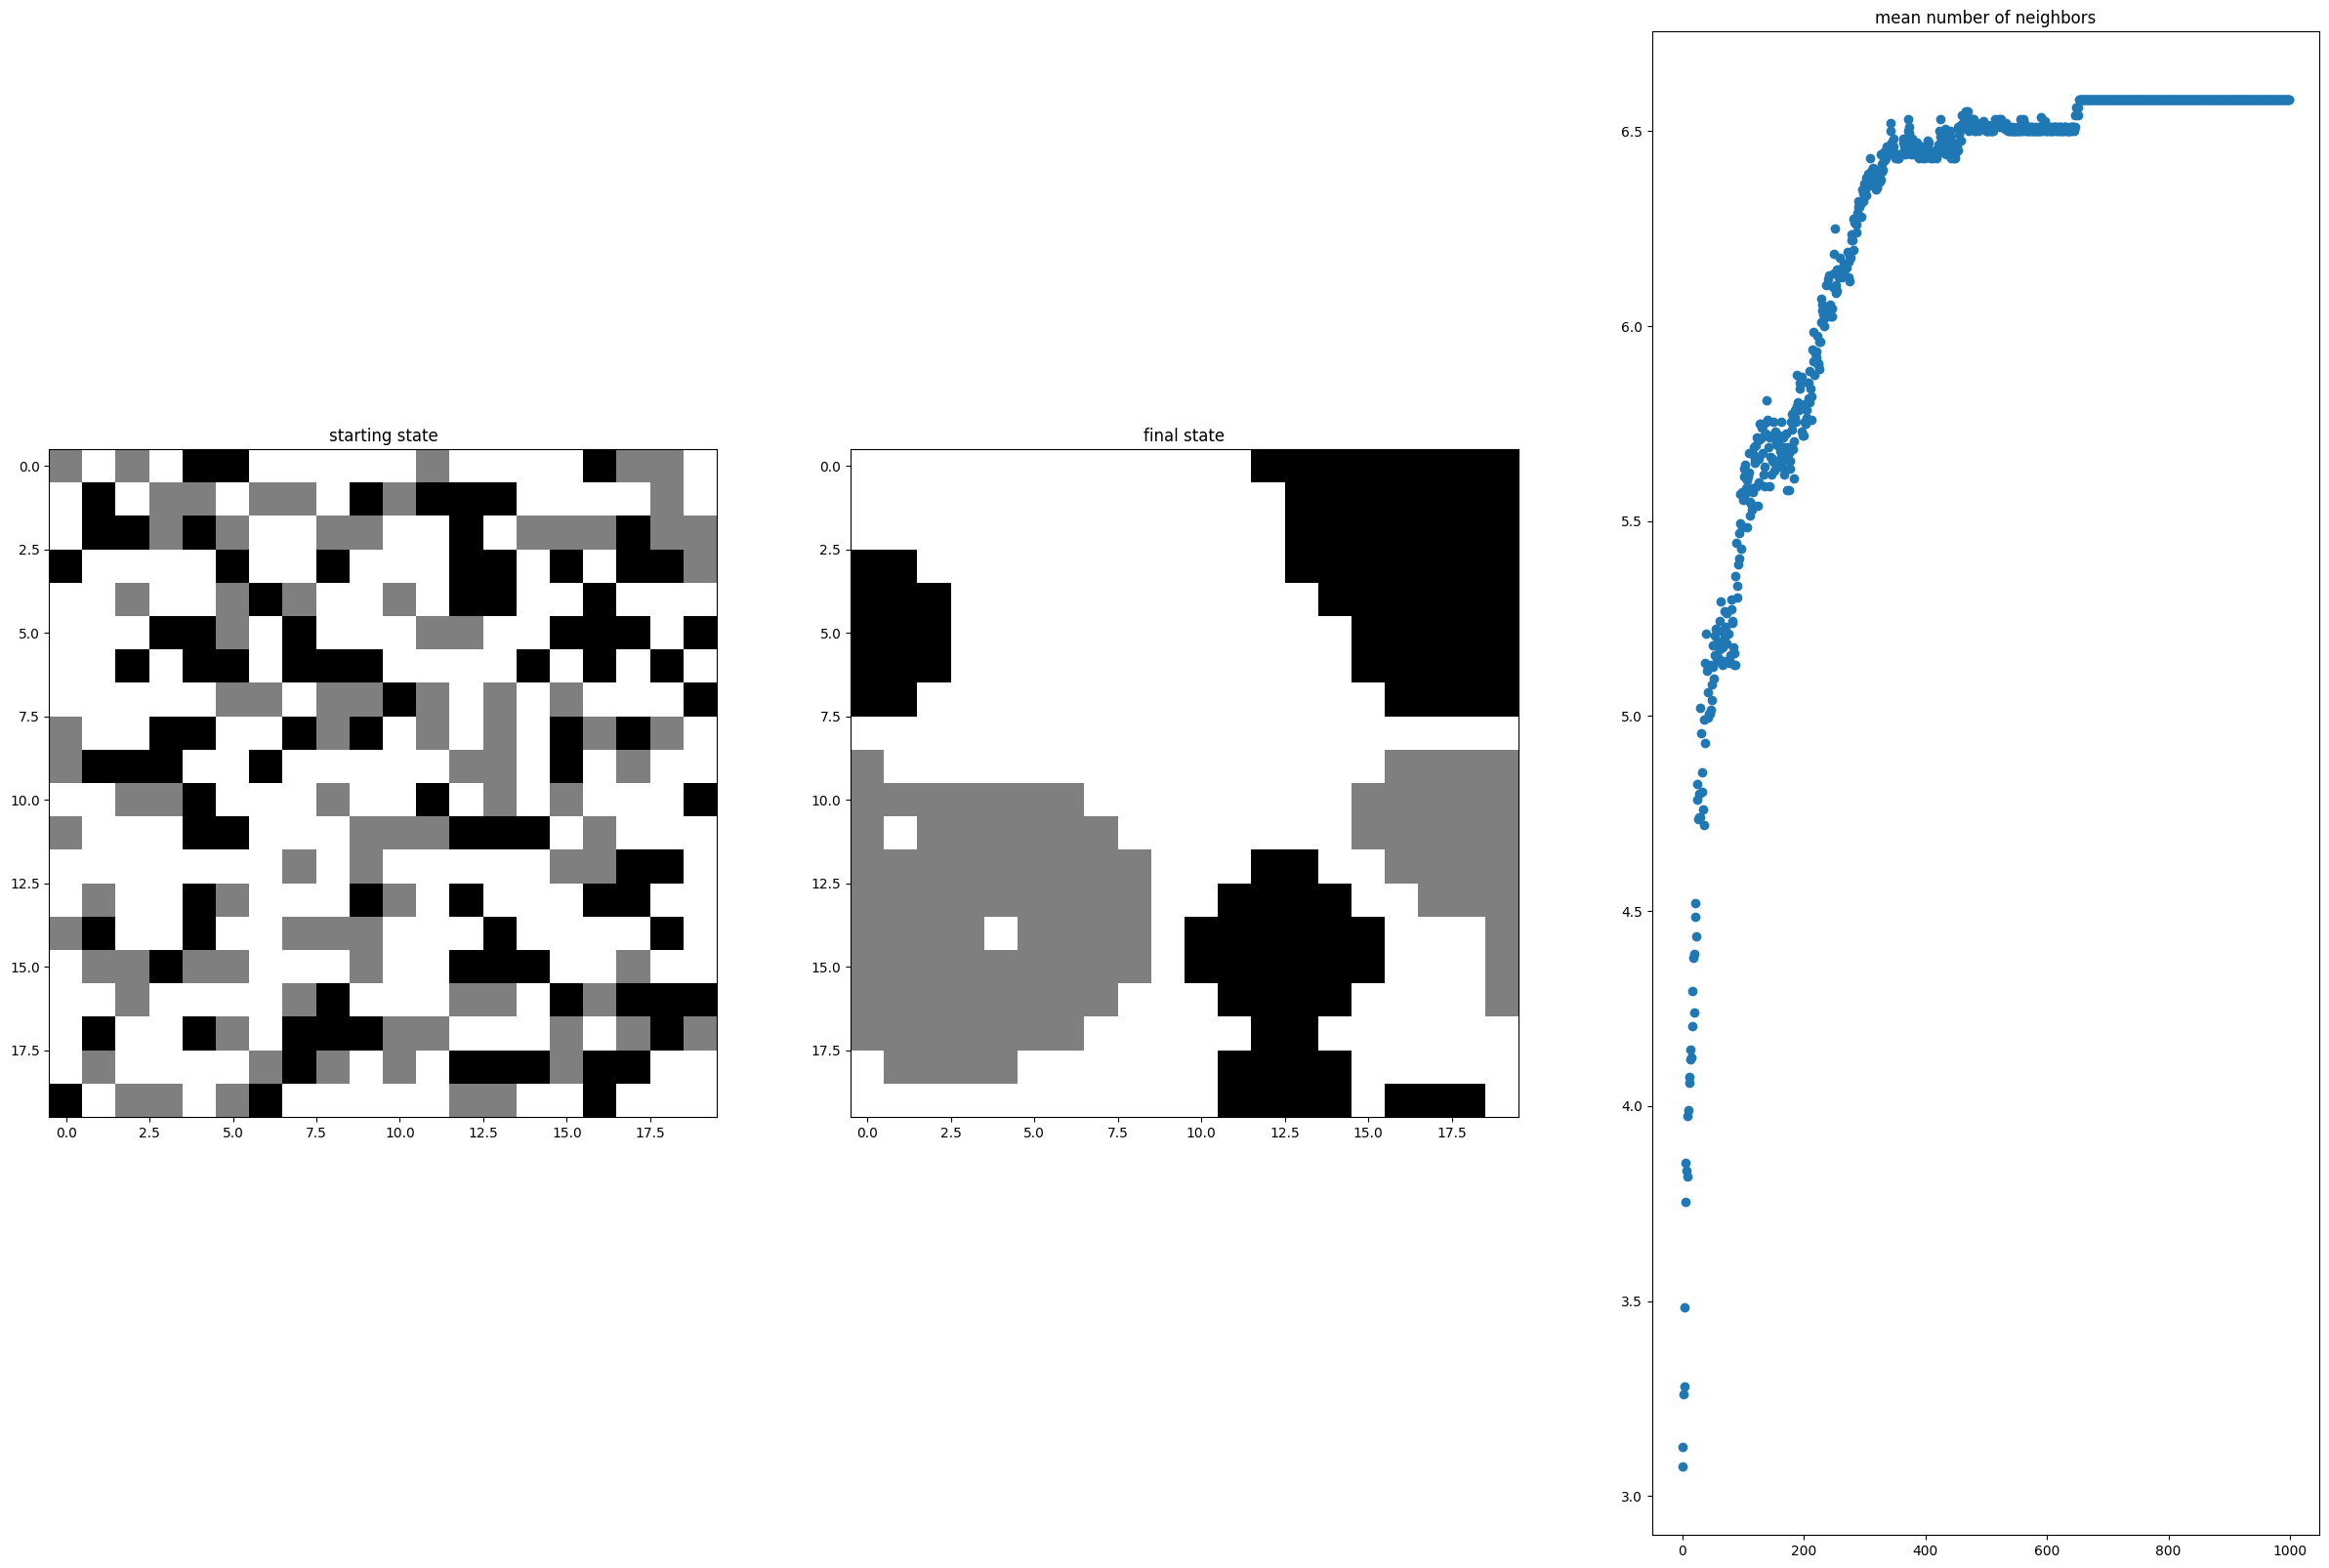

In [129]:
run_test2(*test_cases[2], it=1000)

L=80 p=0.35 a=4 t=2


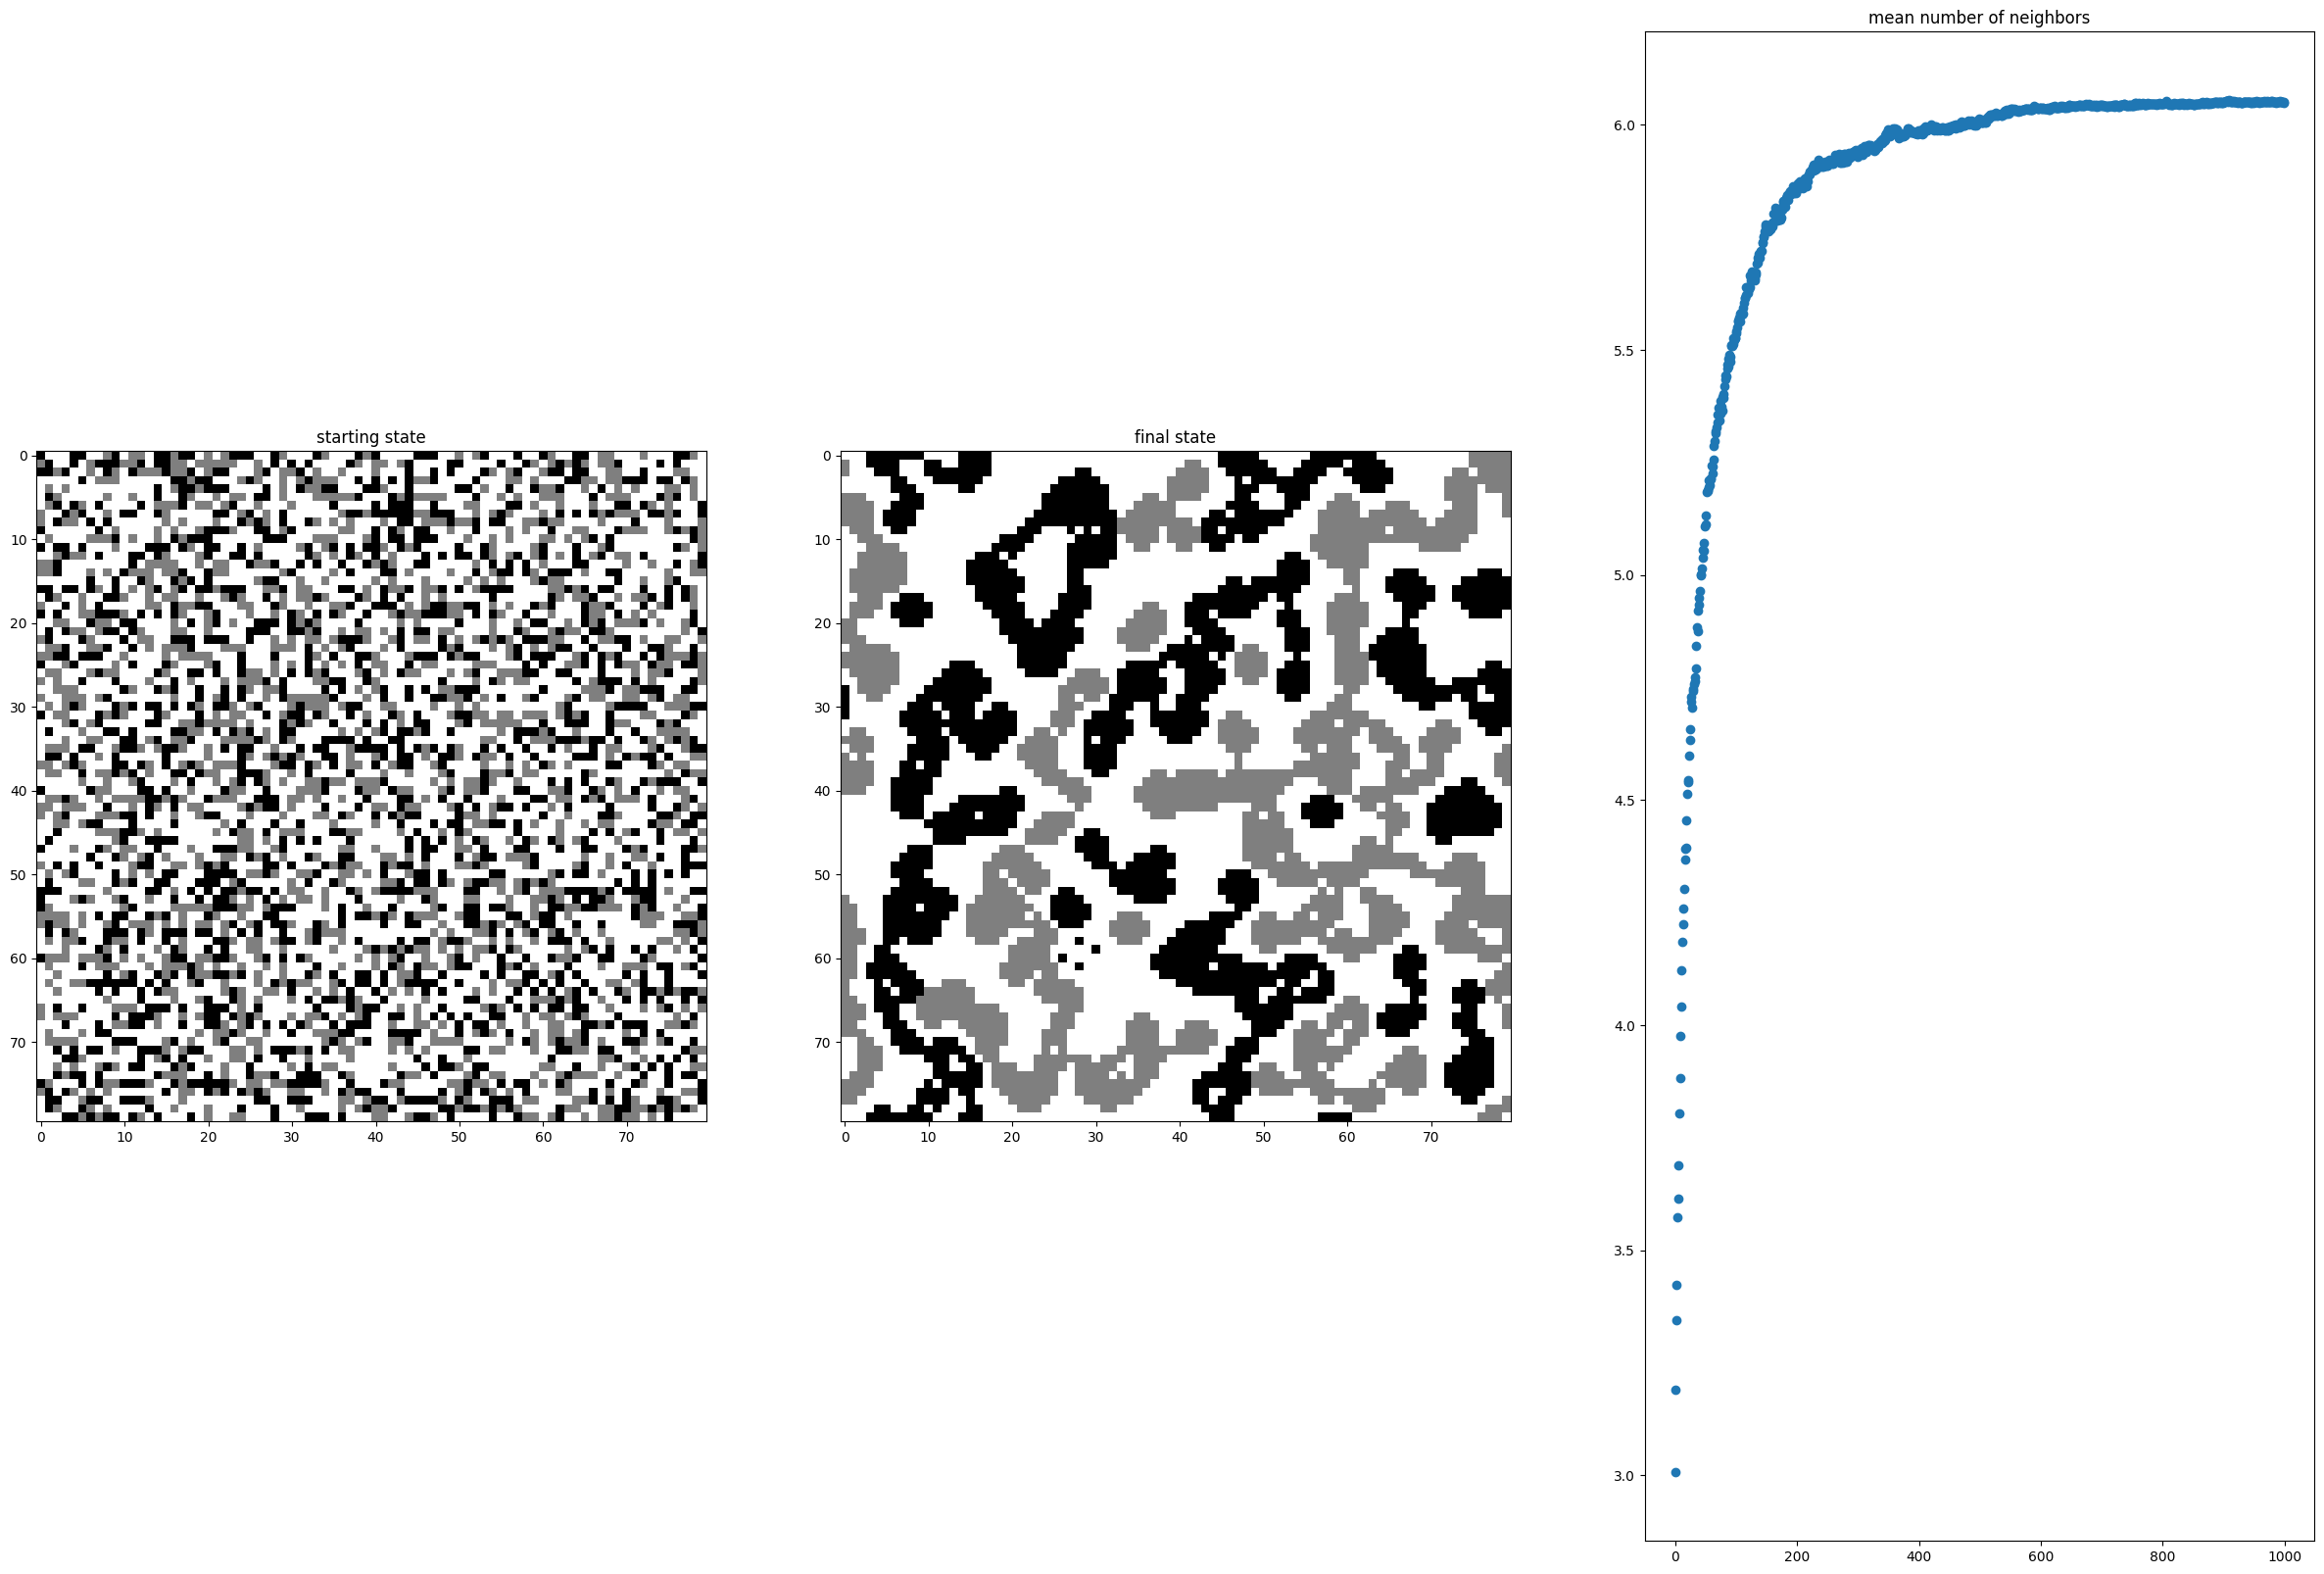

In [130]:
run_test2(*test_cases[3], it=1000)

L=80 p=0.5 a=4 t=2


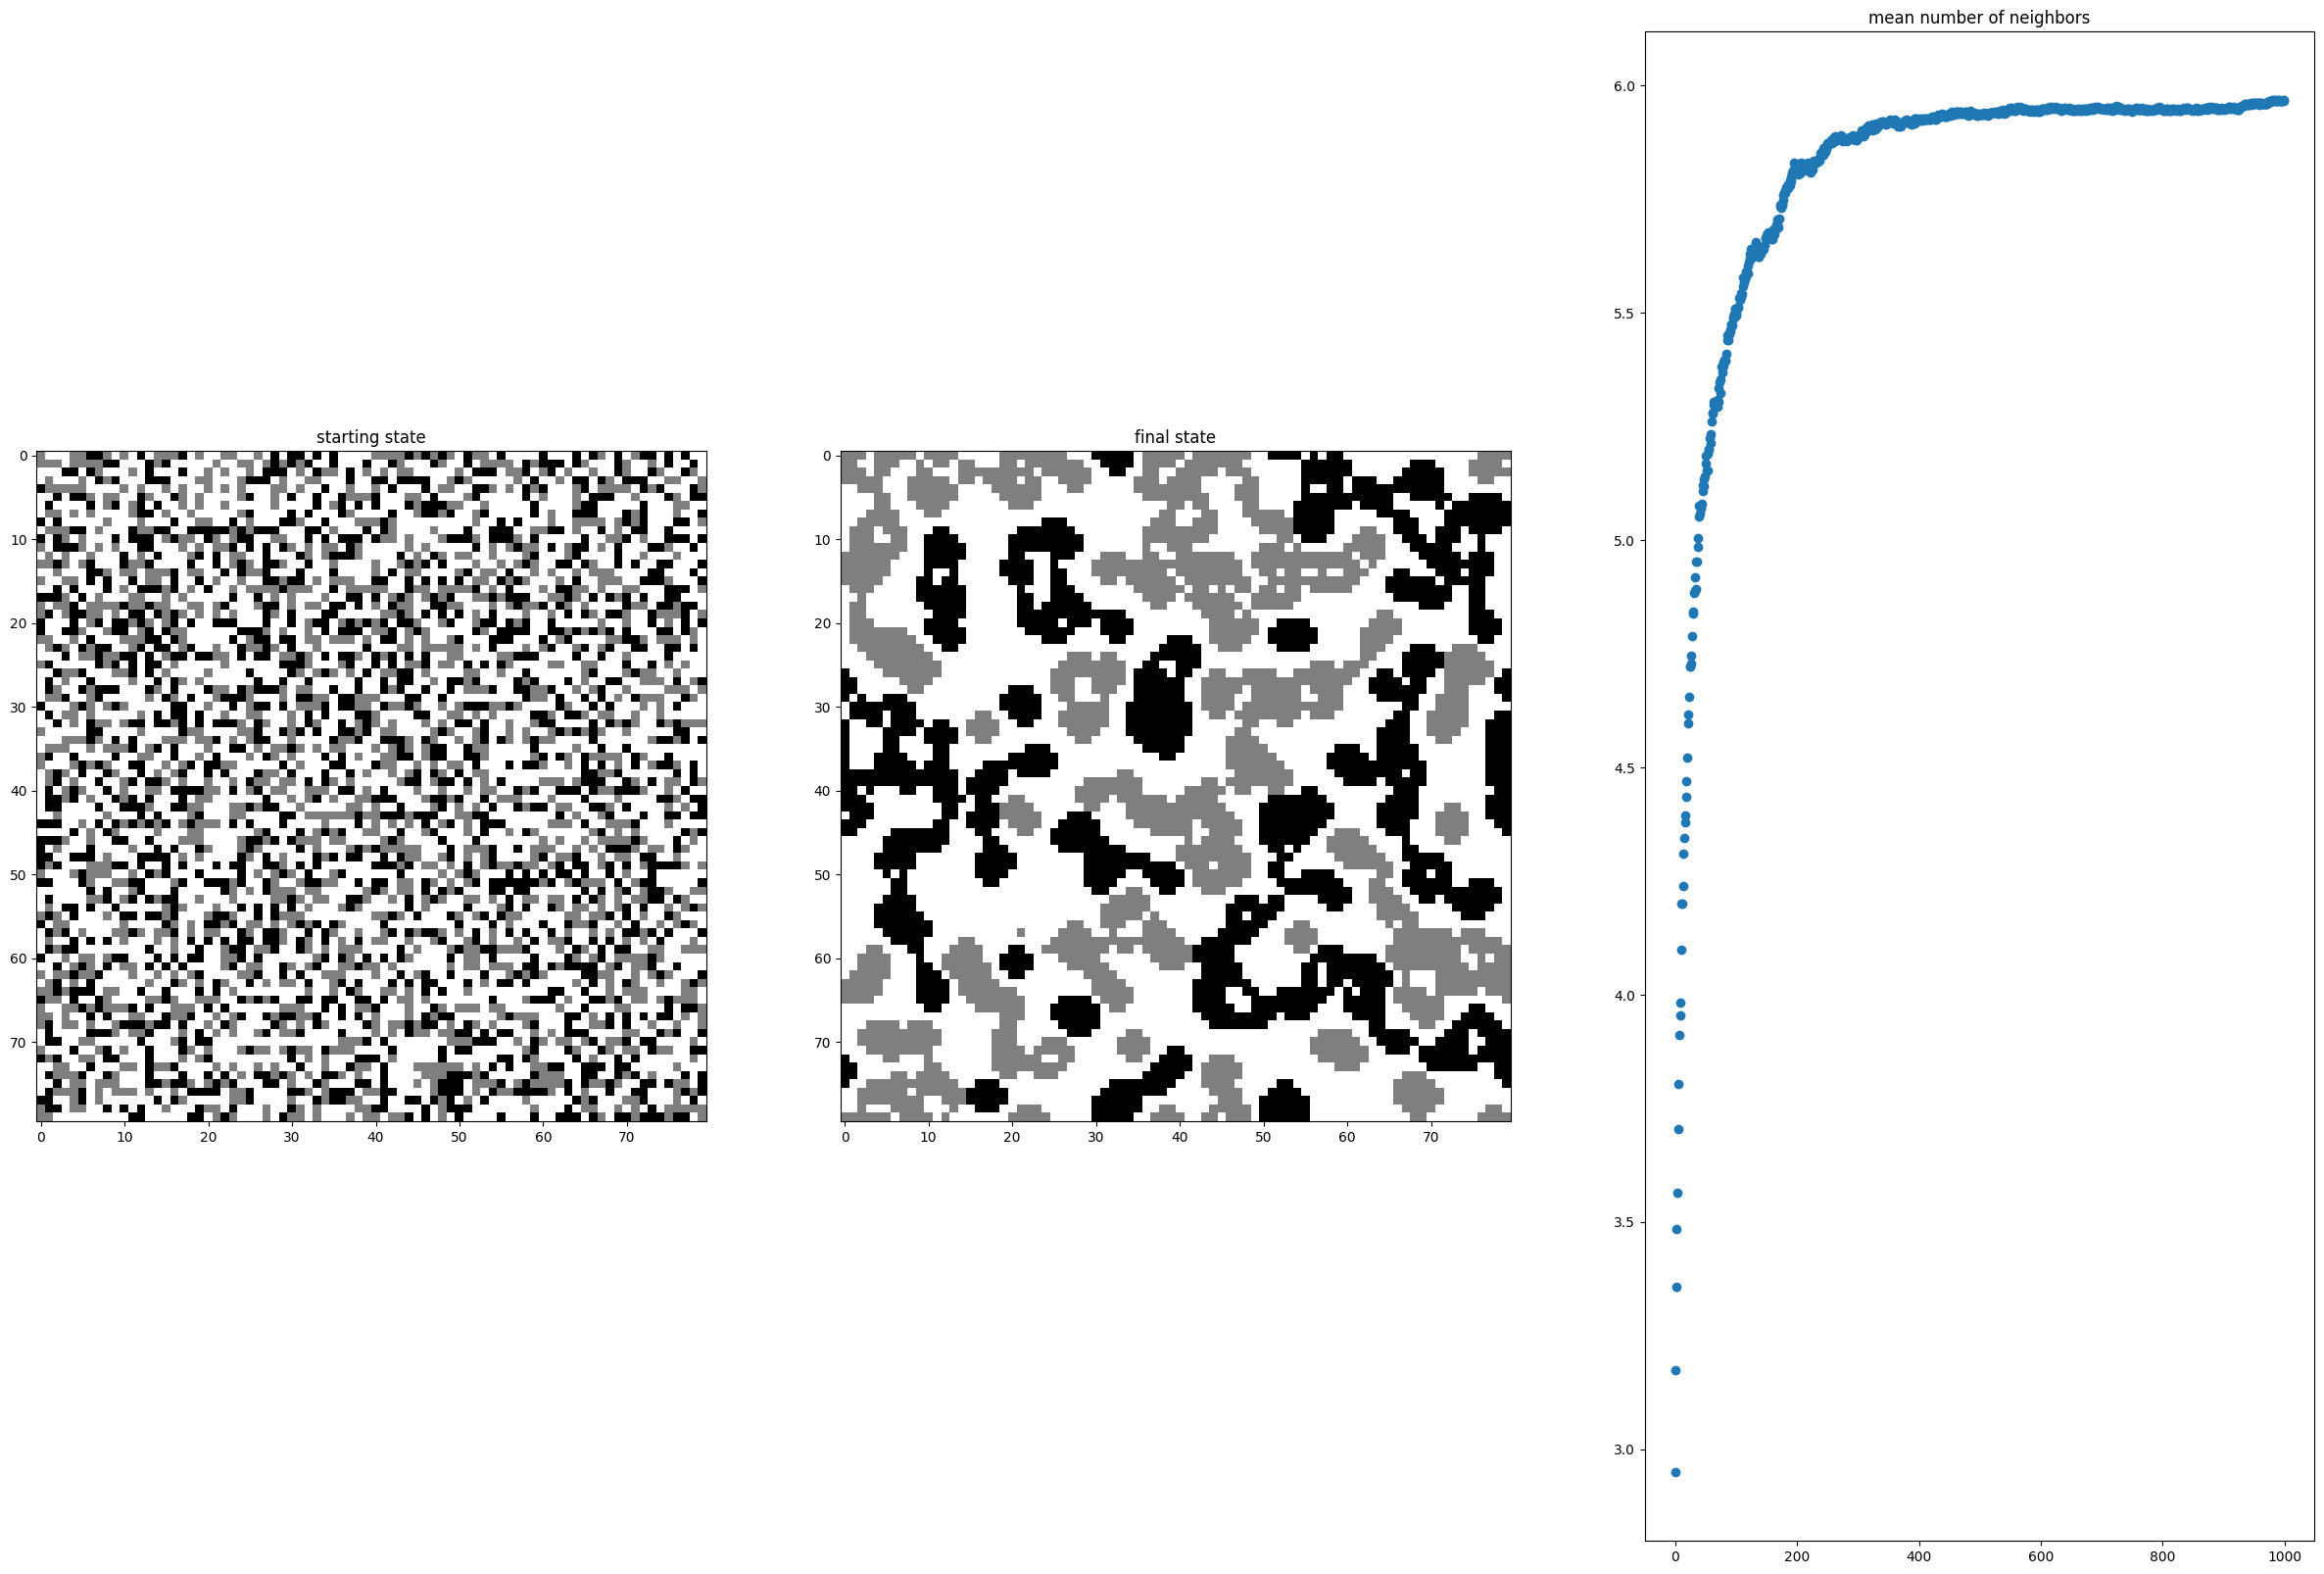

In [131]:
run_test2(*test_cases[4], it=1000)

L=80 p=0.65 a=4 t=2


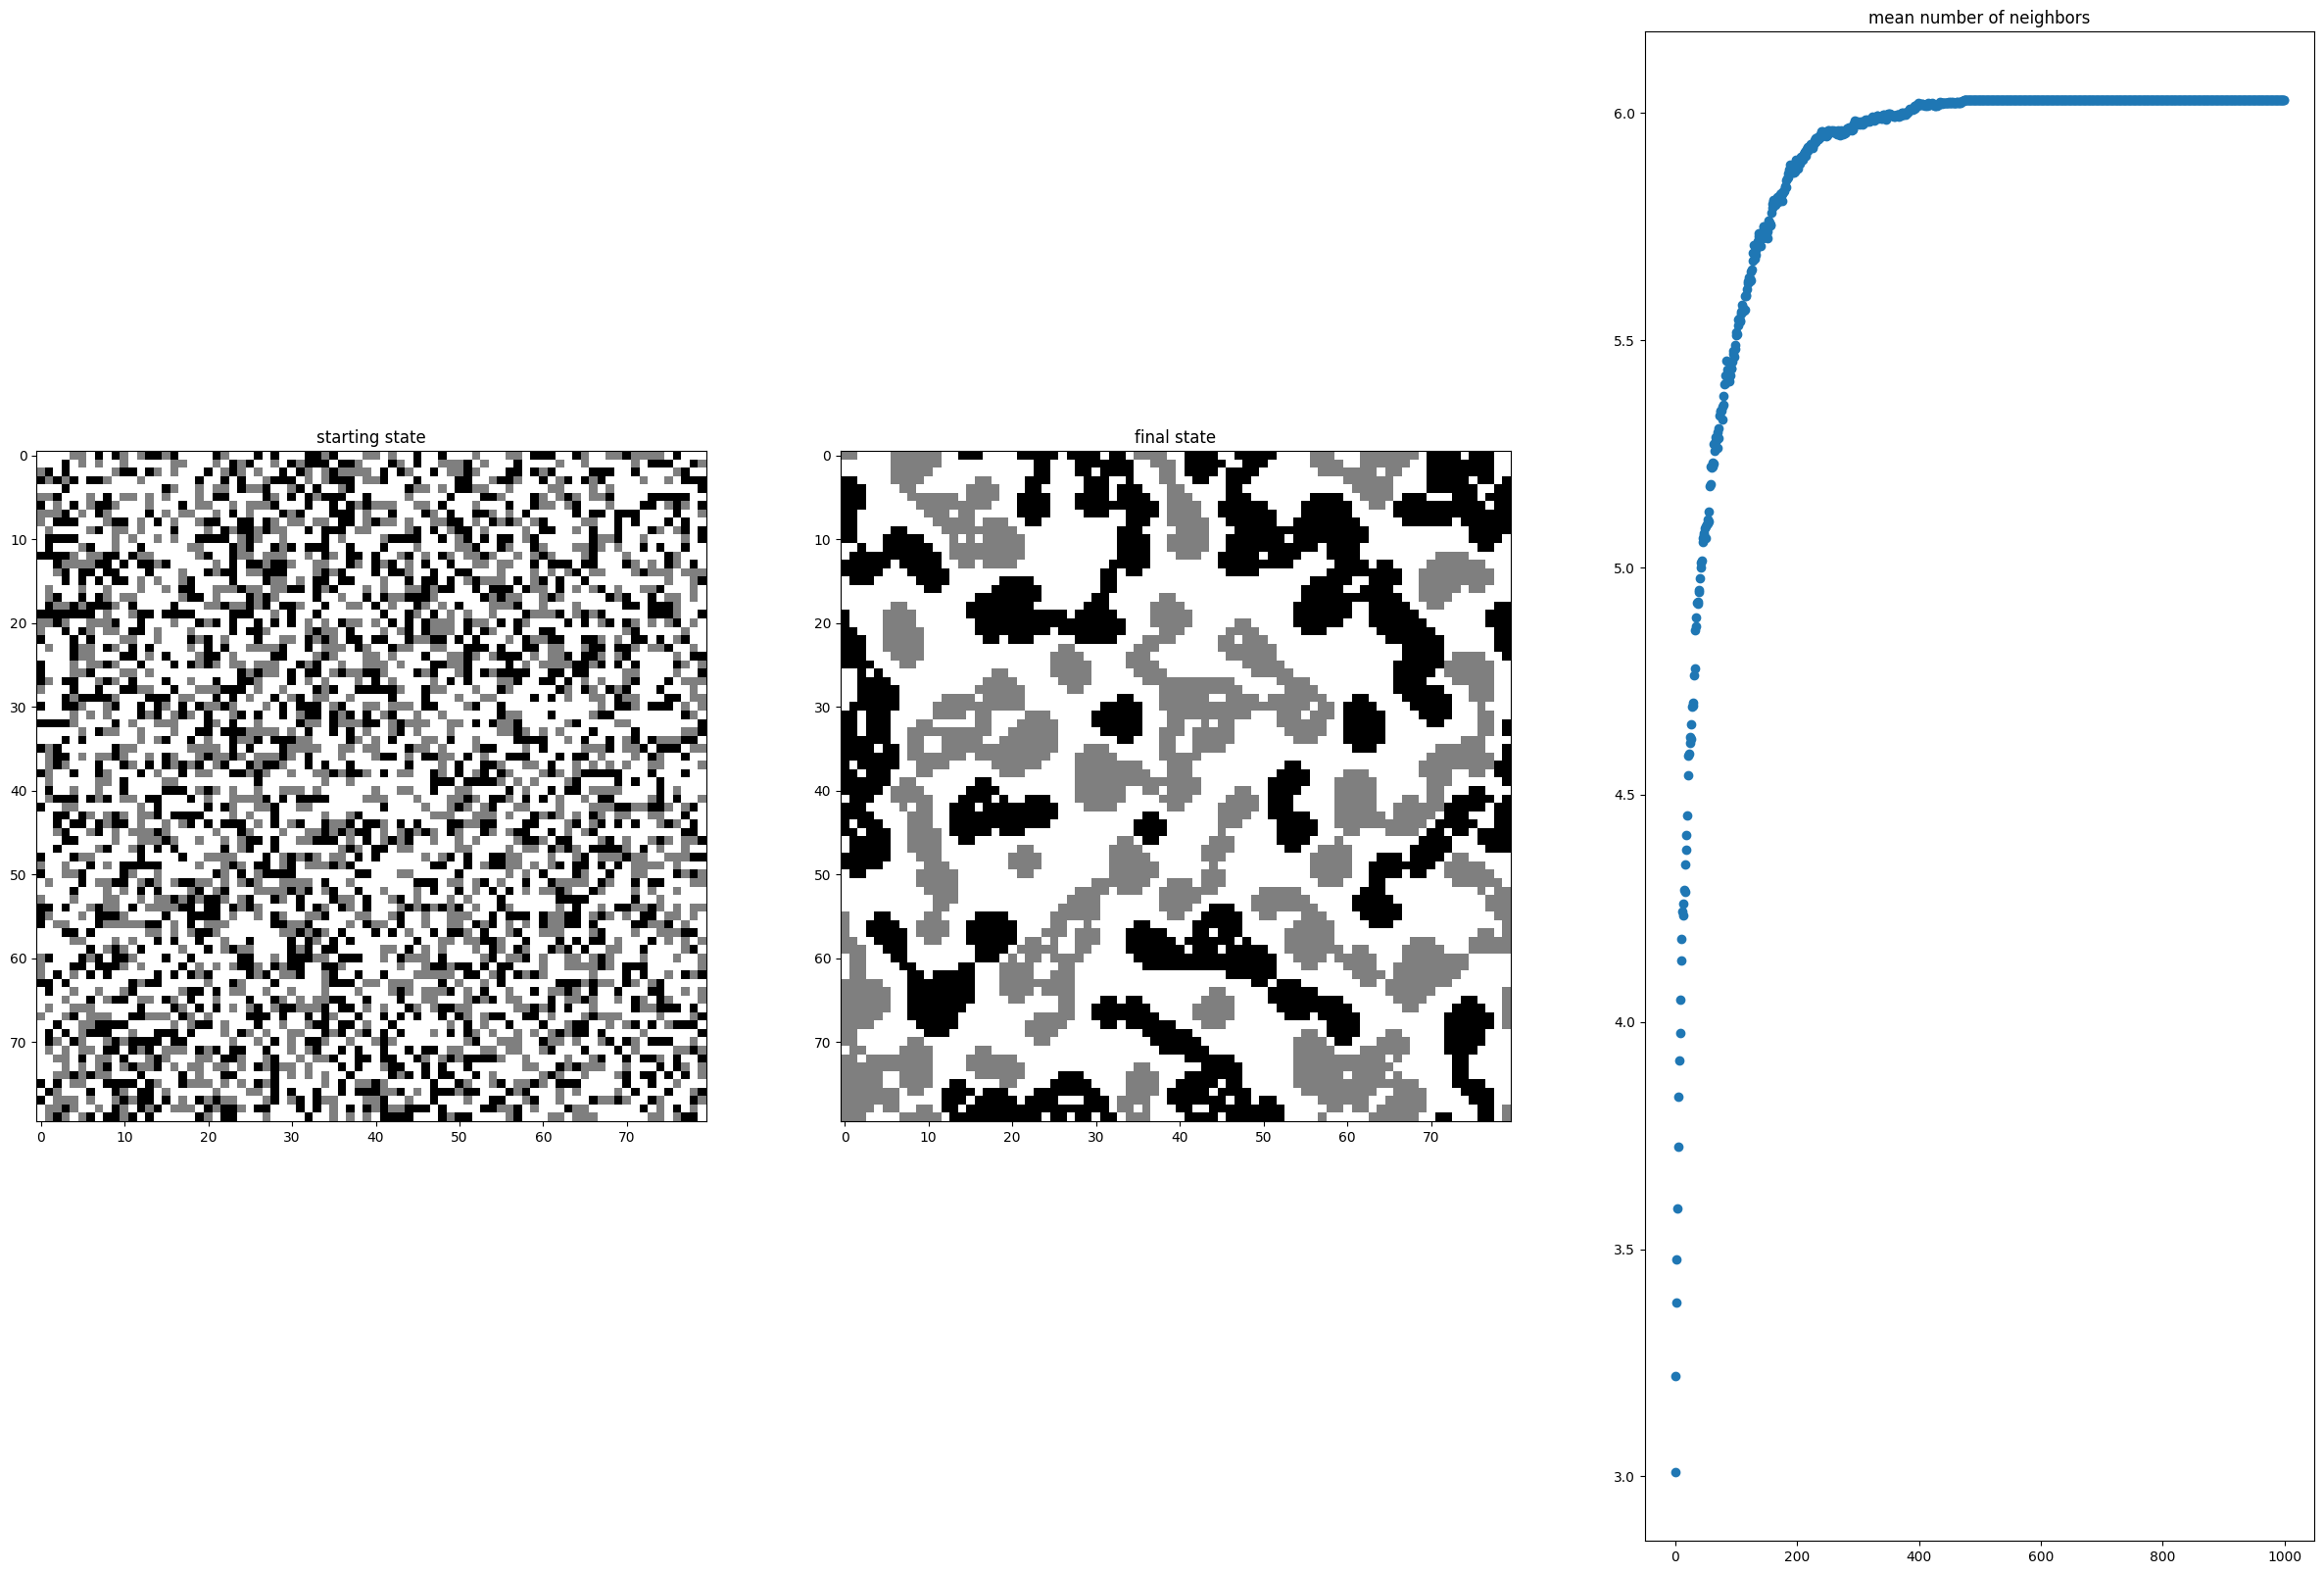

In [132]:
run_test2(*test_cases[5], it=1000)

L=200 p=0.35 a=4 t=2


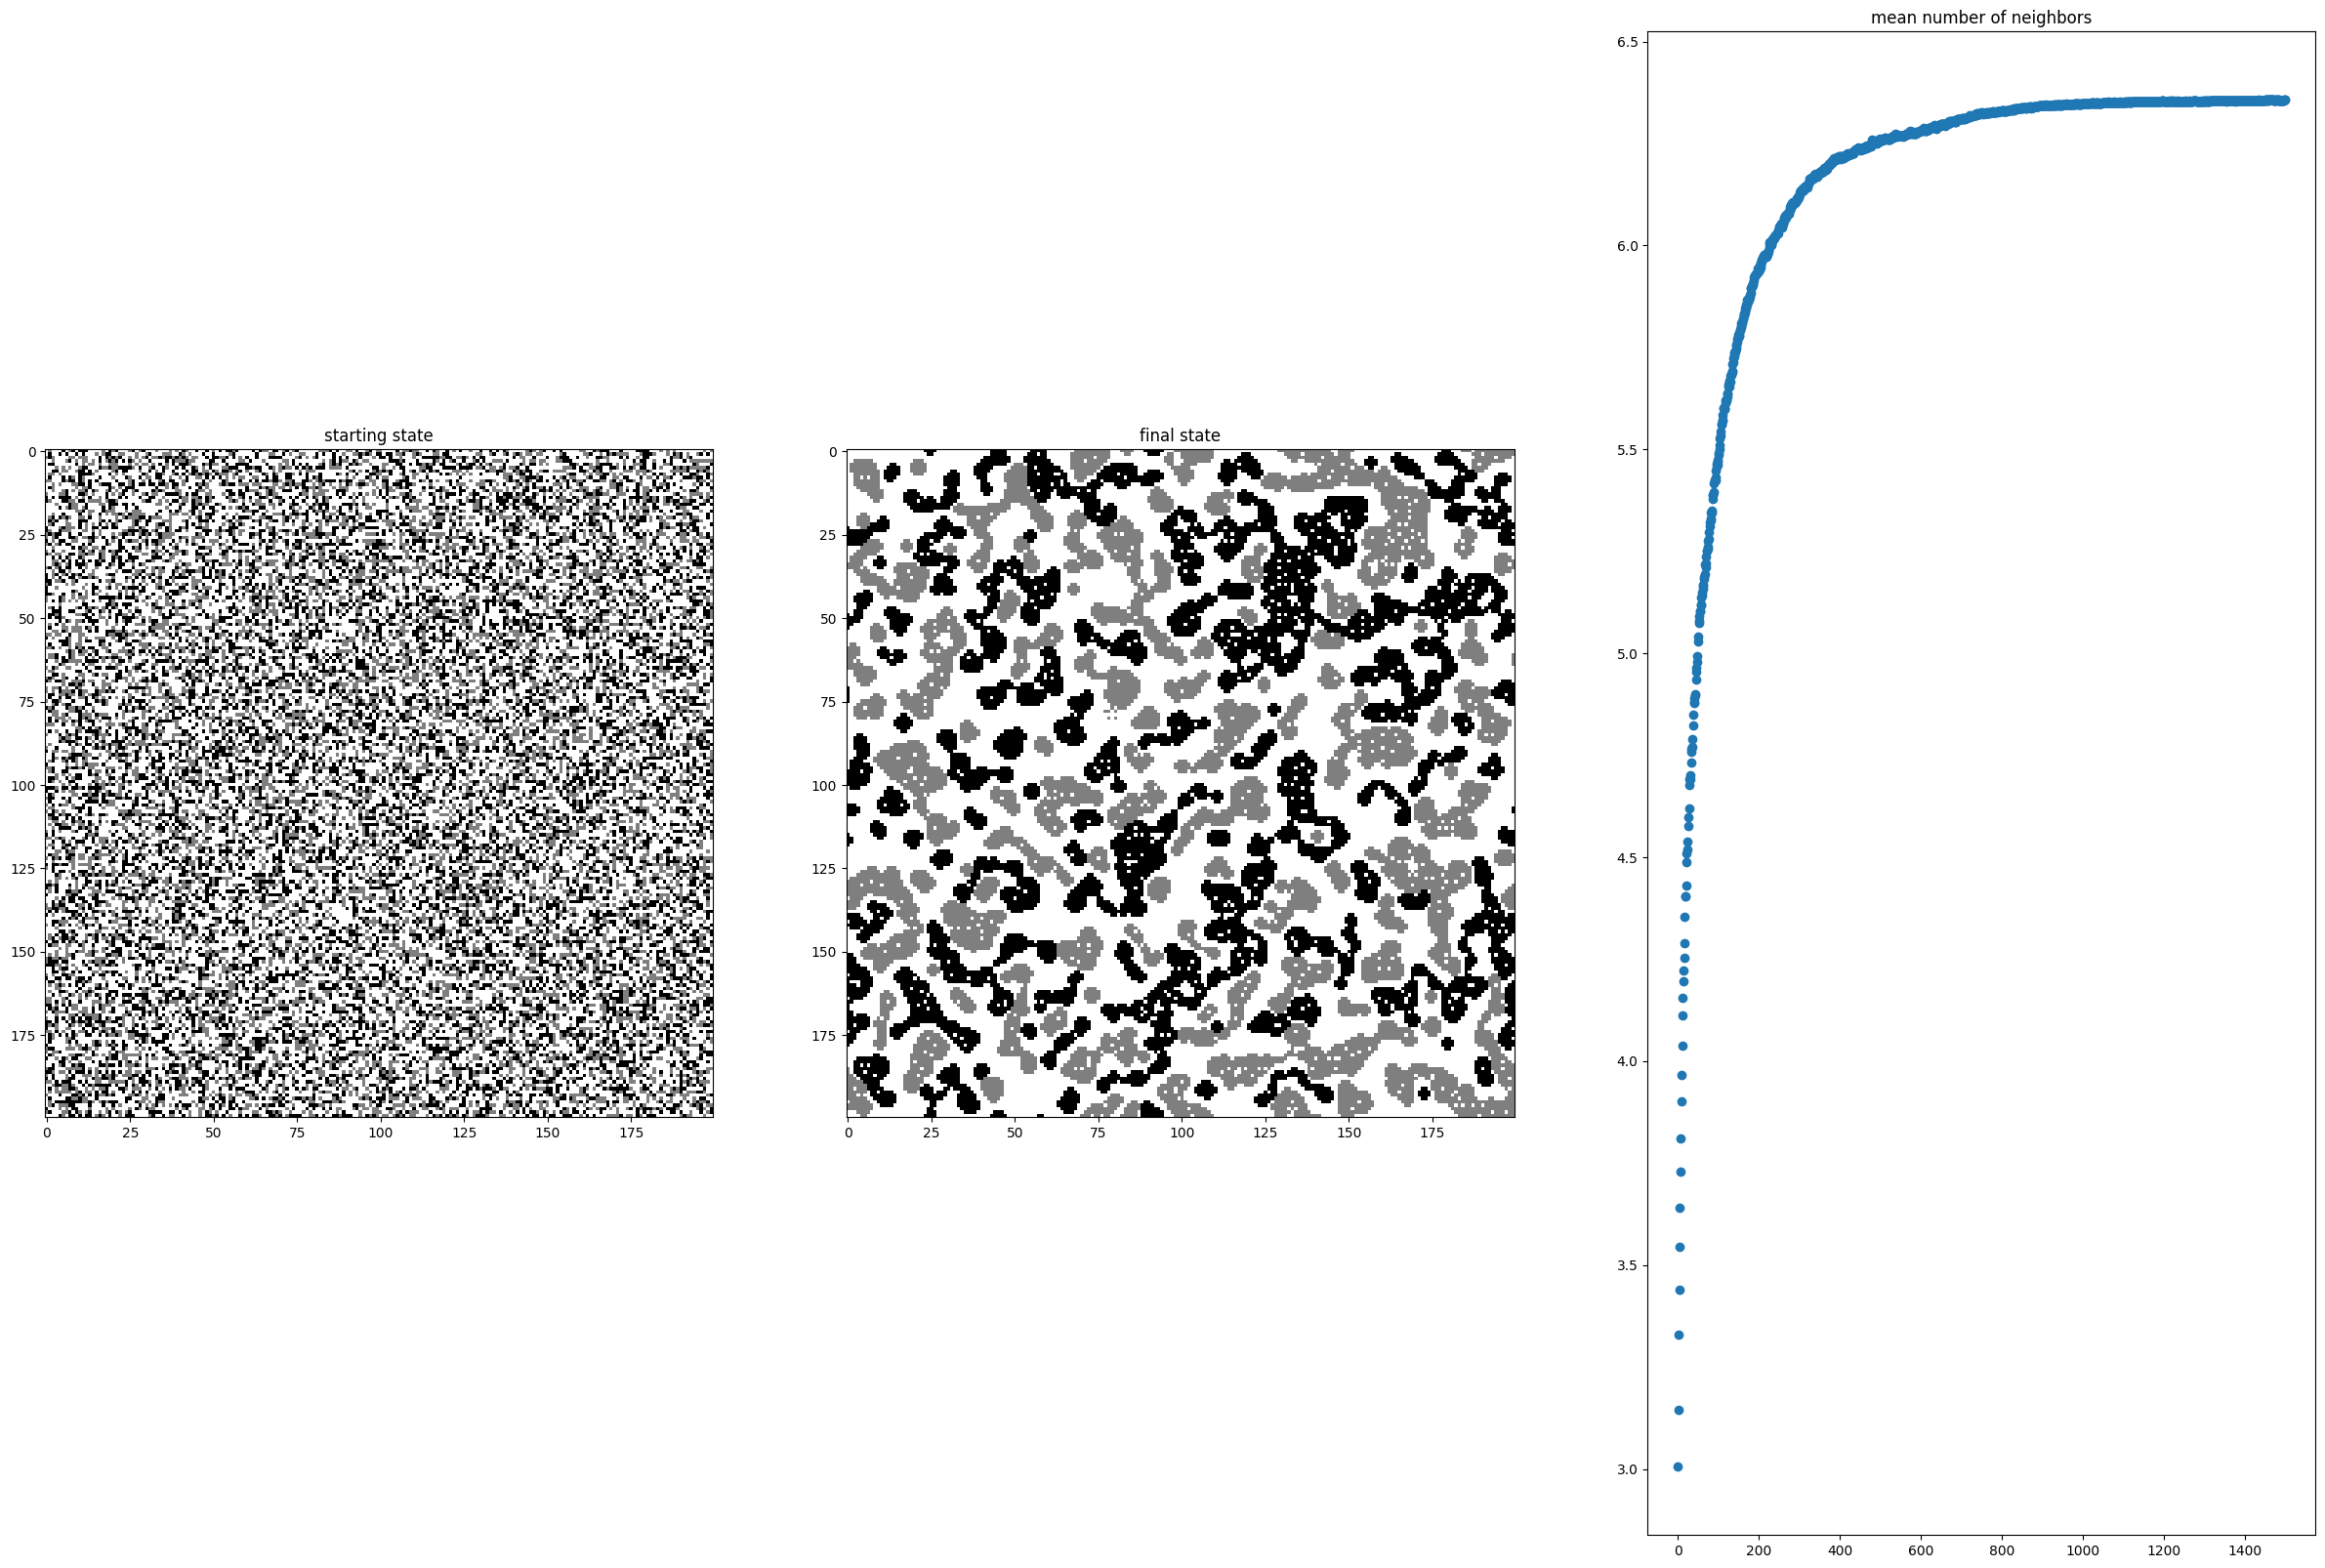

In [133]:
run_test2(*test_cases[6], it=1500)

L=200 p=0.5 a=4 t=2


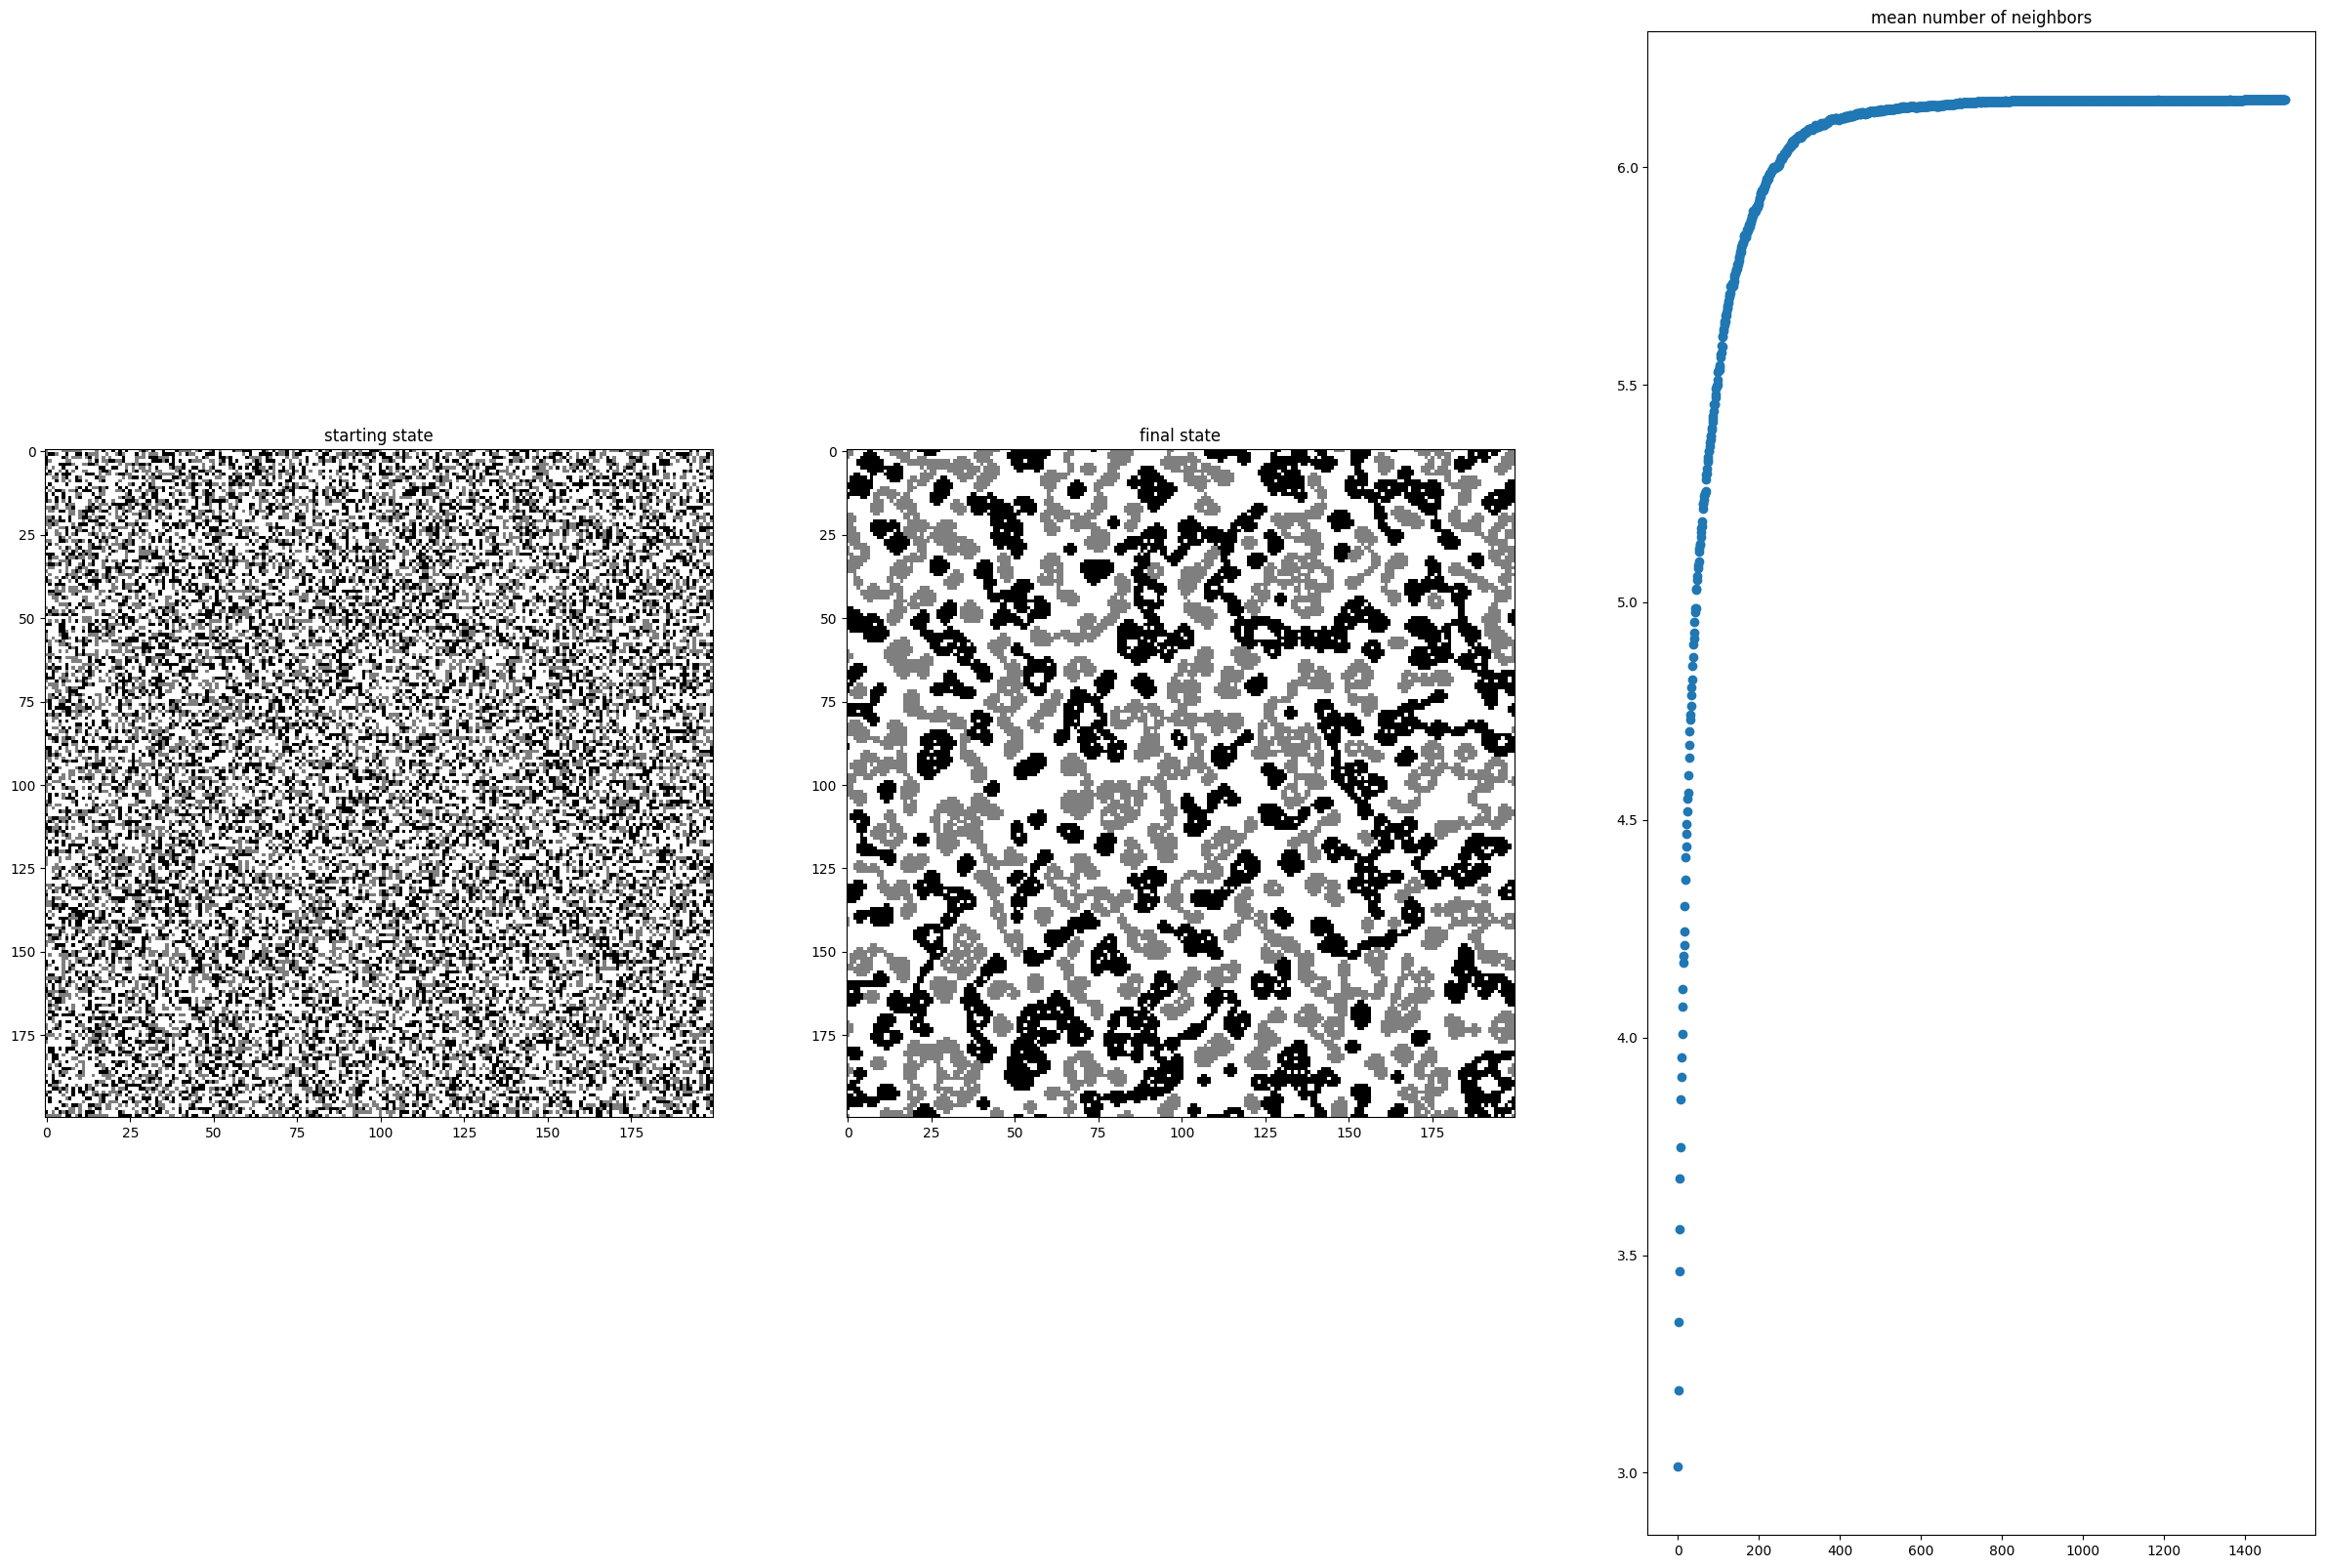

In [134]:
run_test2(*test_cases[7], it=1500)

L=200 p=0.65 a=4 t=2


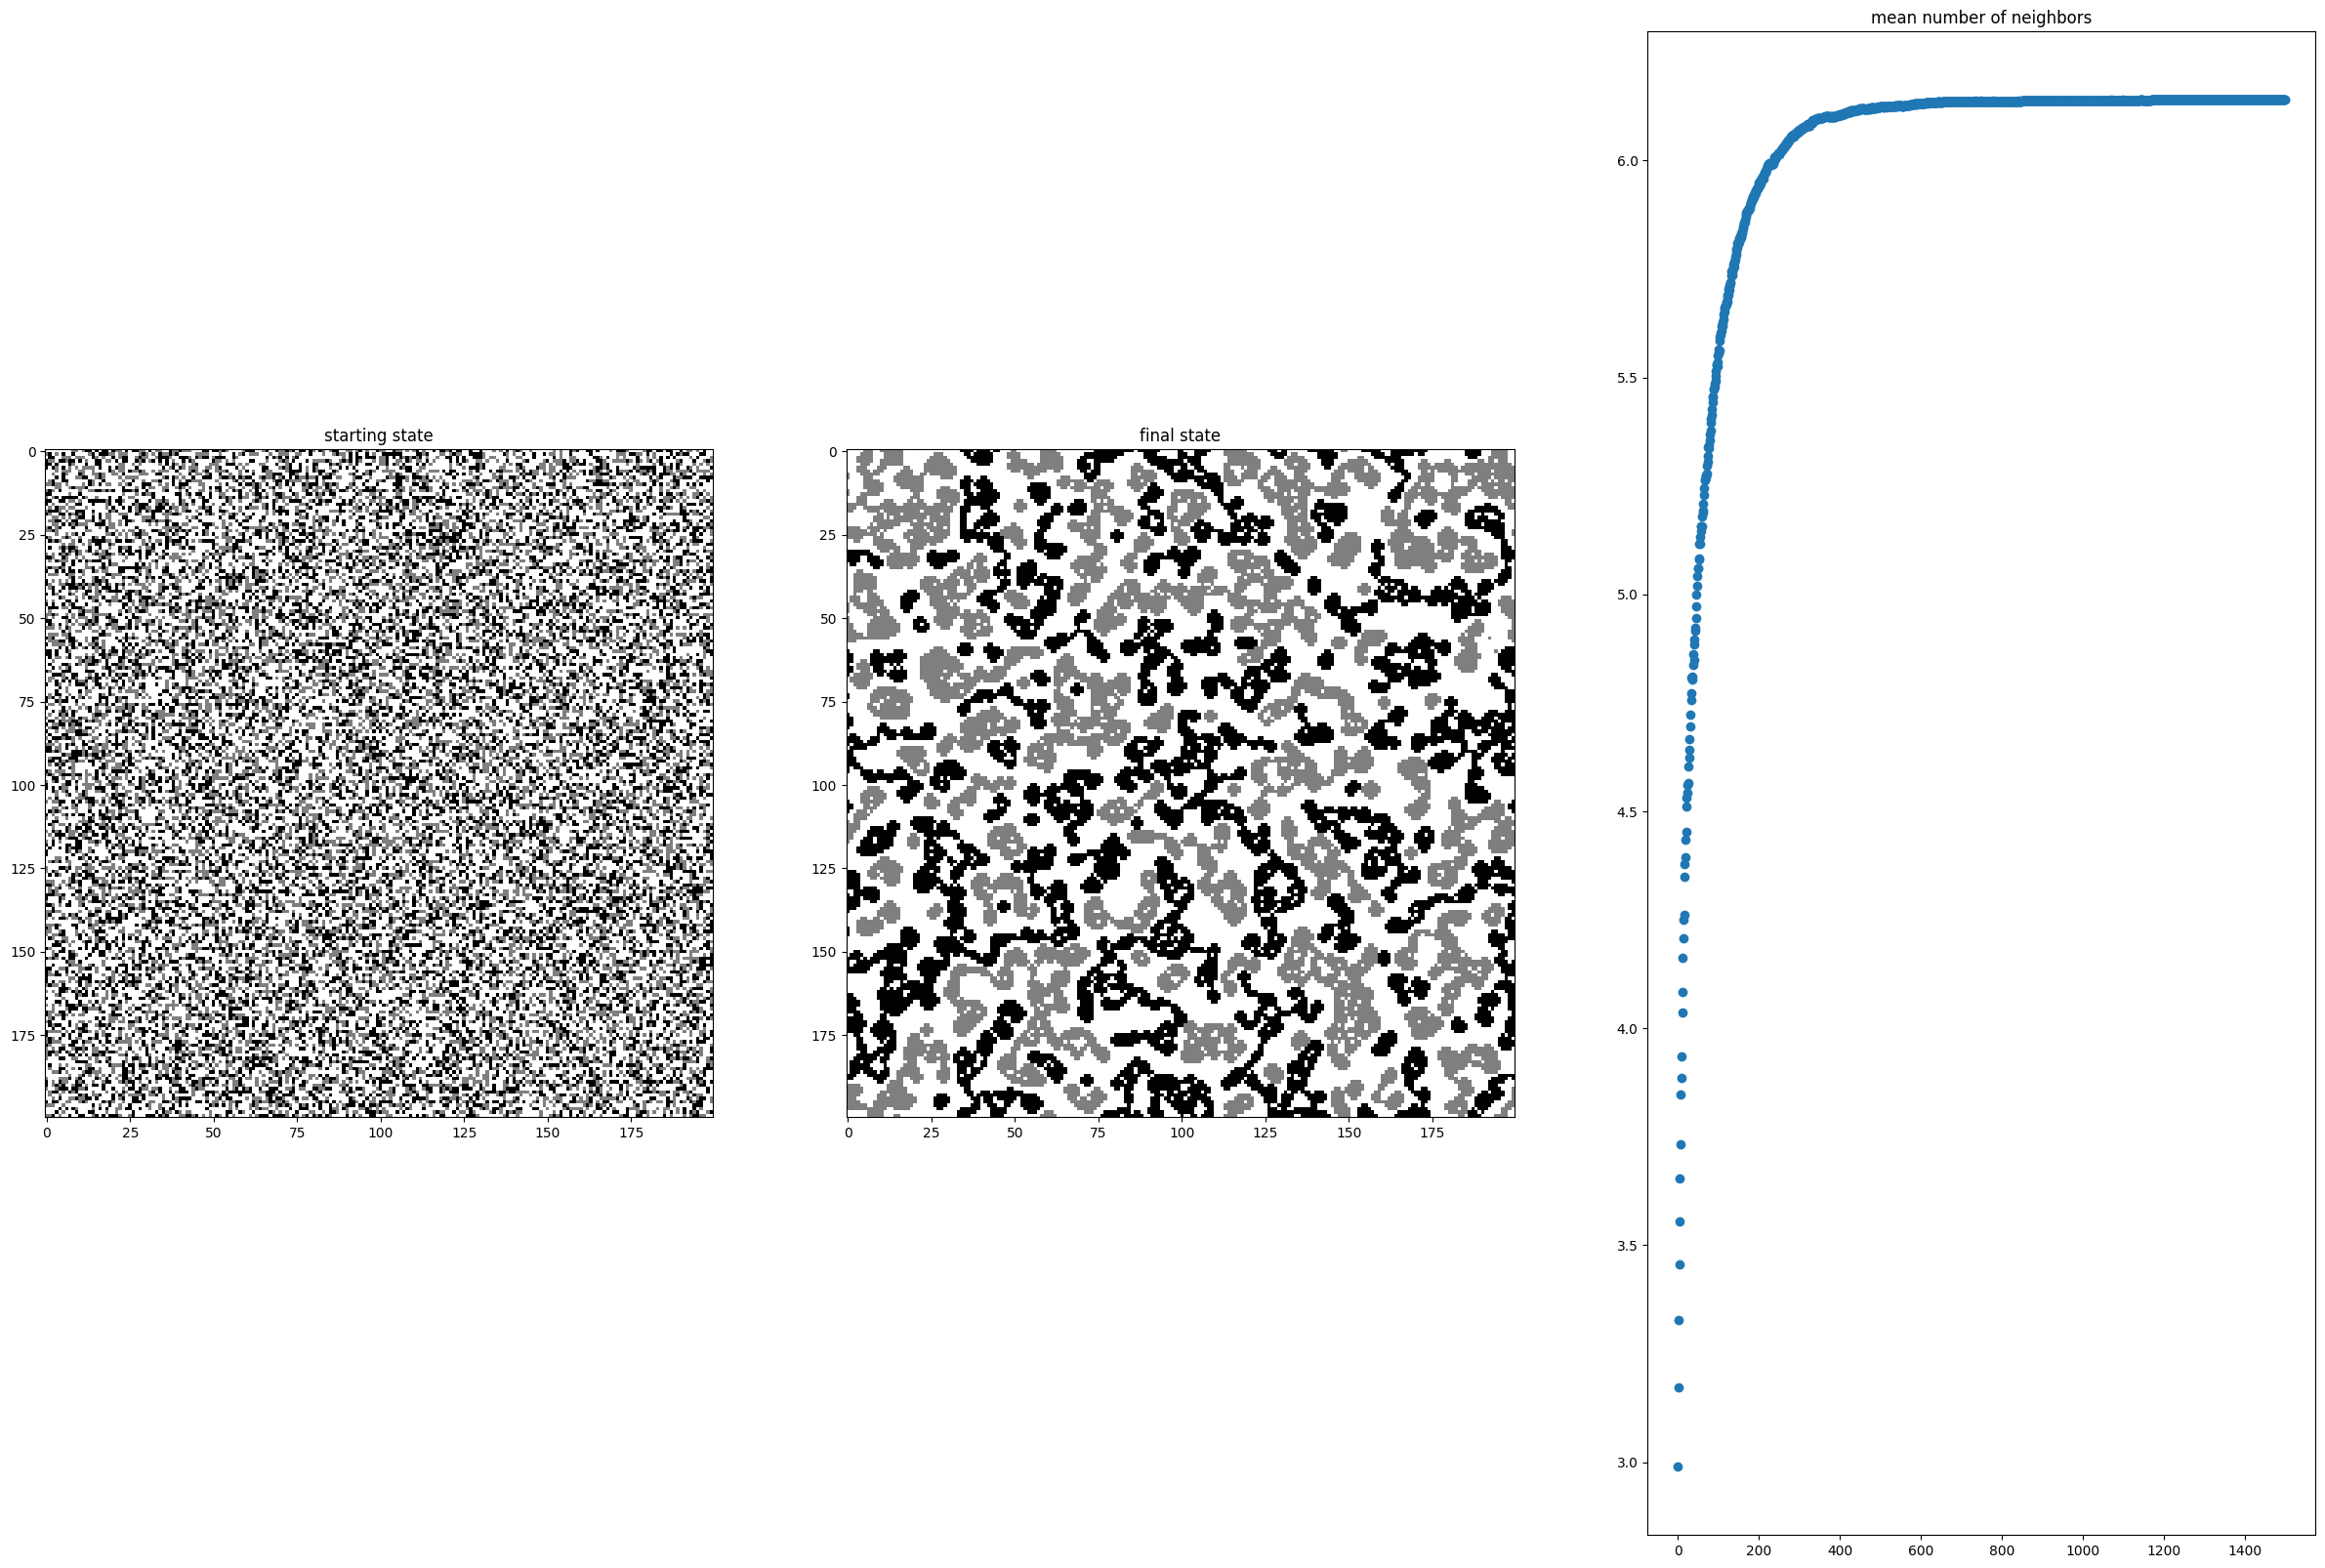

In [135]:
run_test2(*test_cases[8], it=1500)

L=20 p=0.35 a=4 t=4


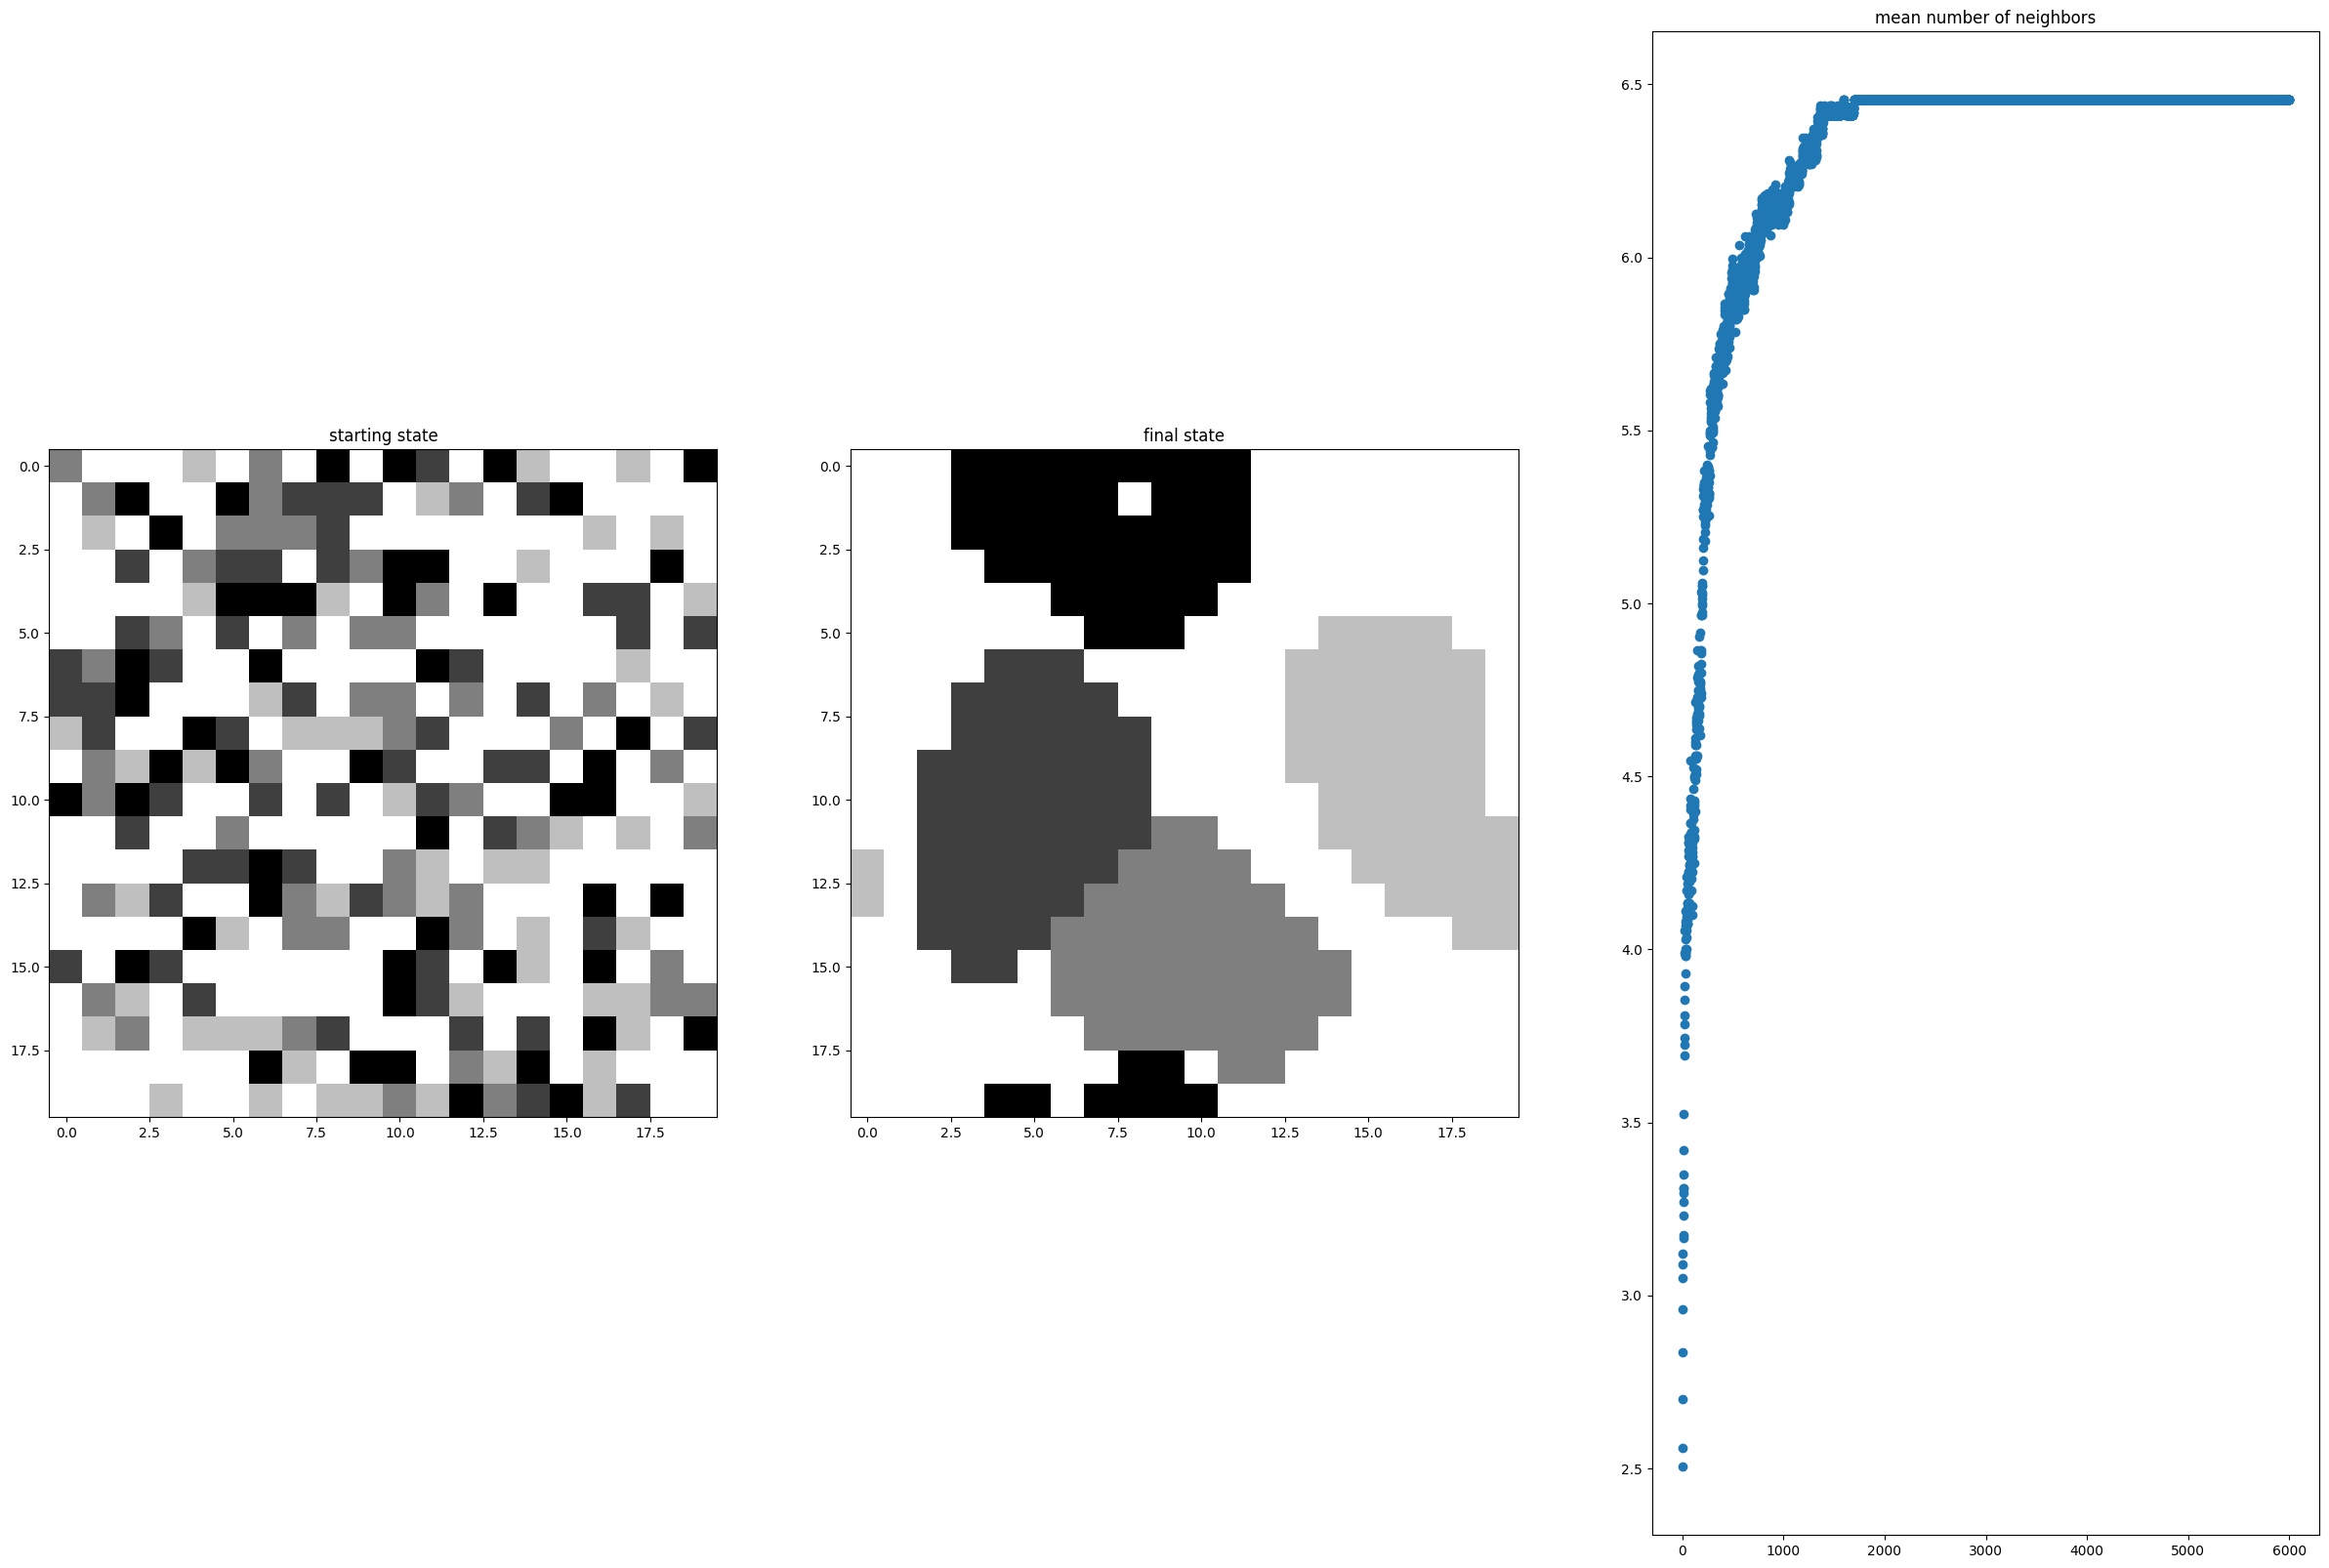

In [136]:
run_test2(*test_cases[9],it=6000)

L=20 p=0.5 a=4 t=4


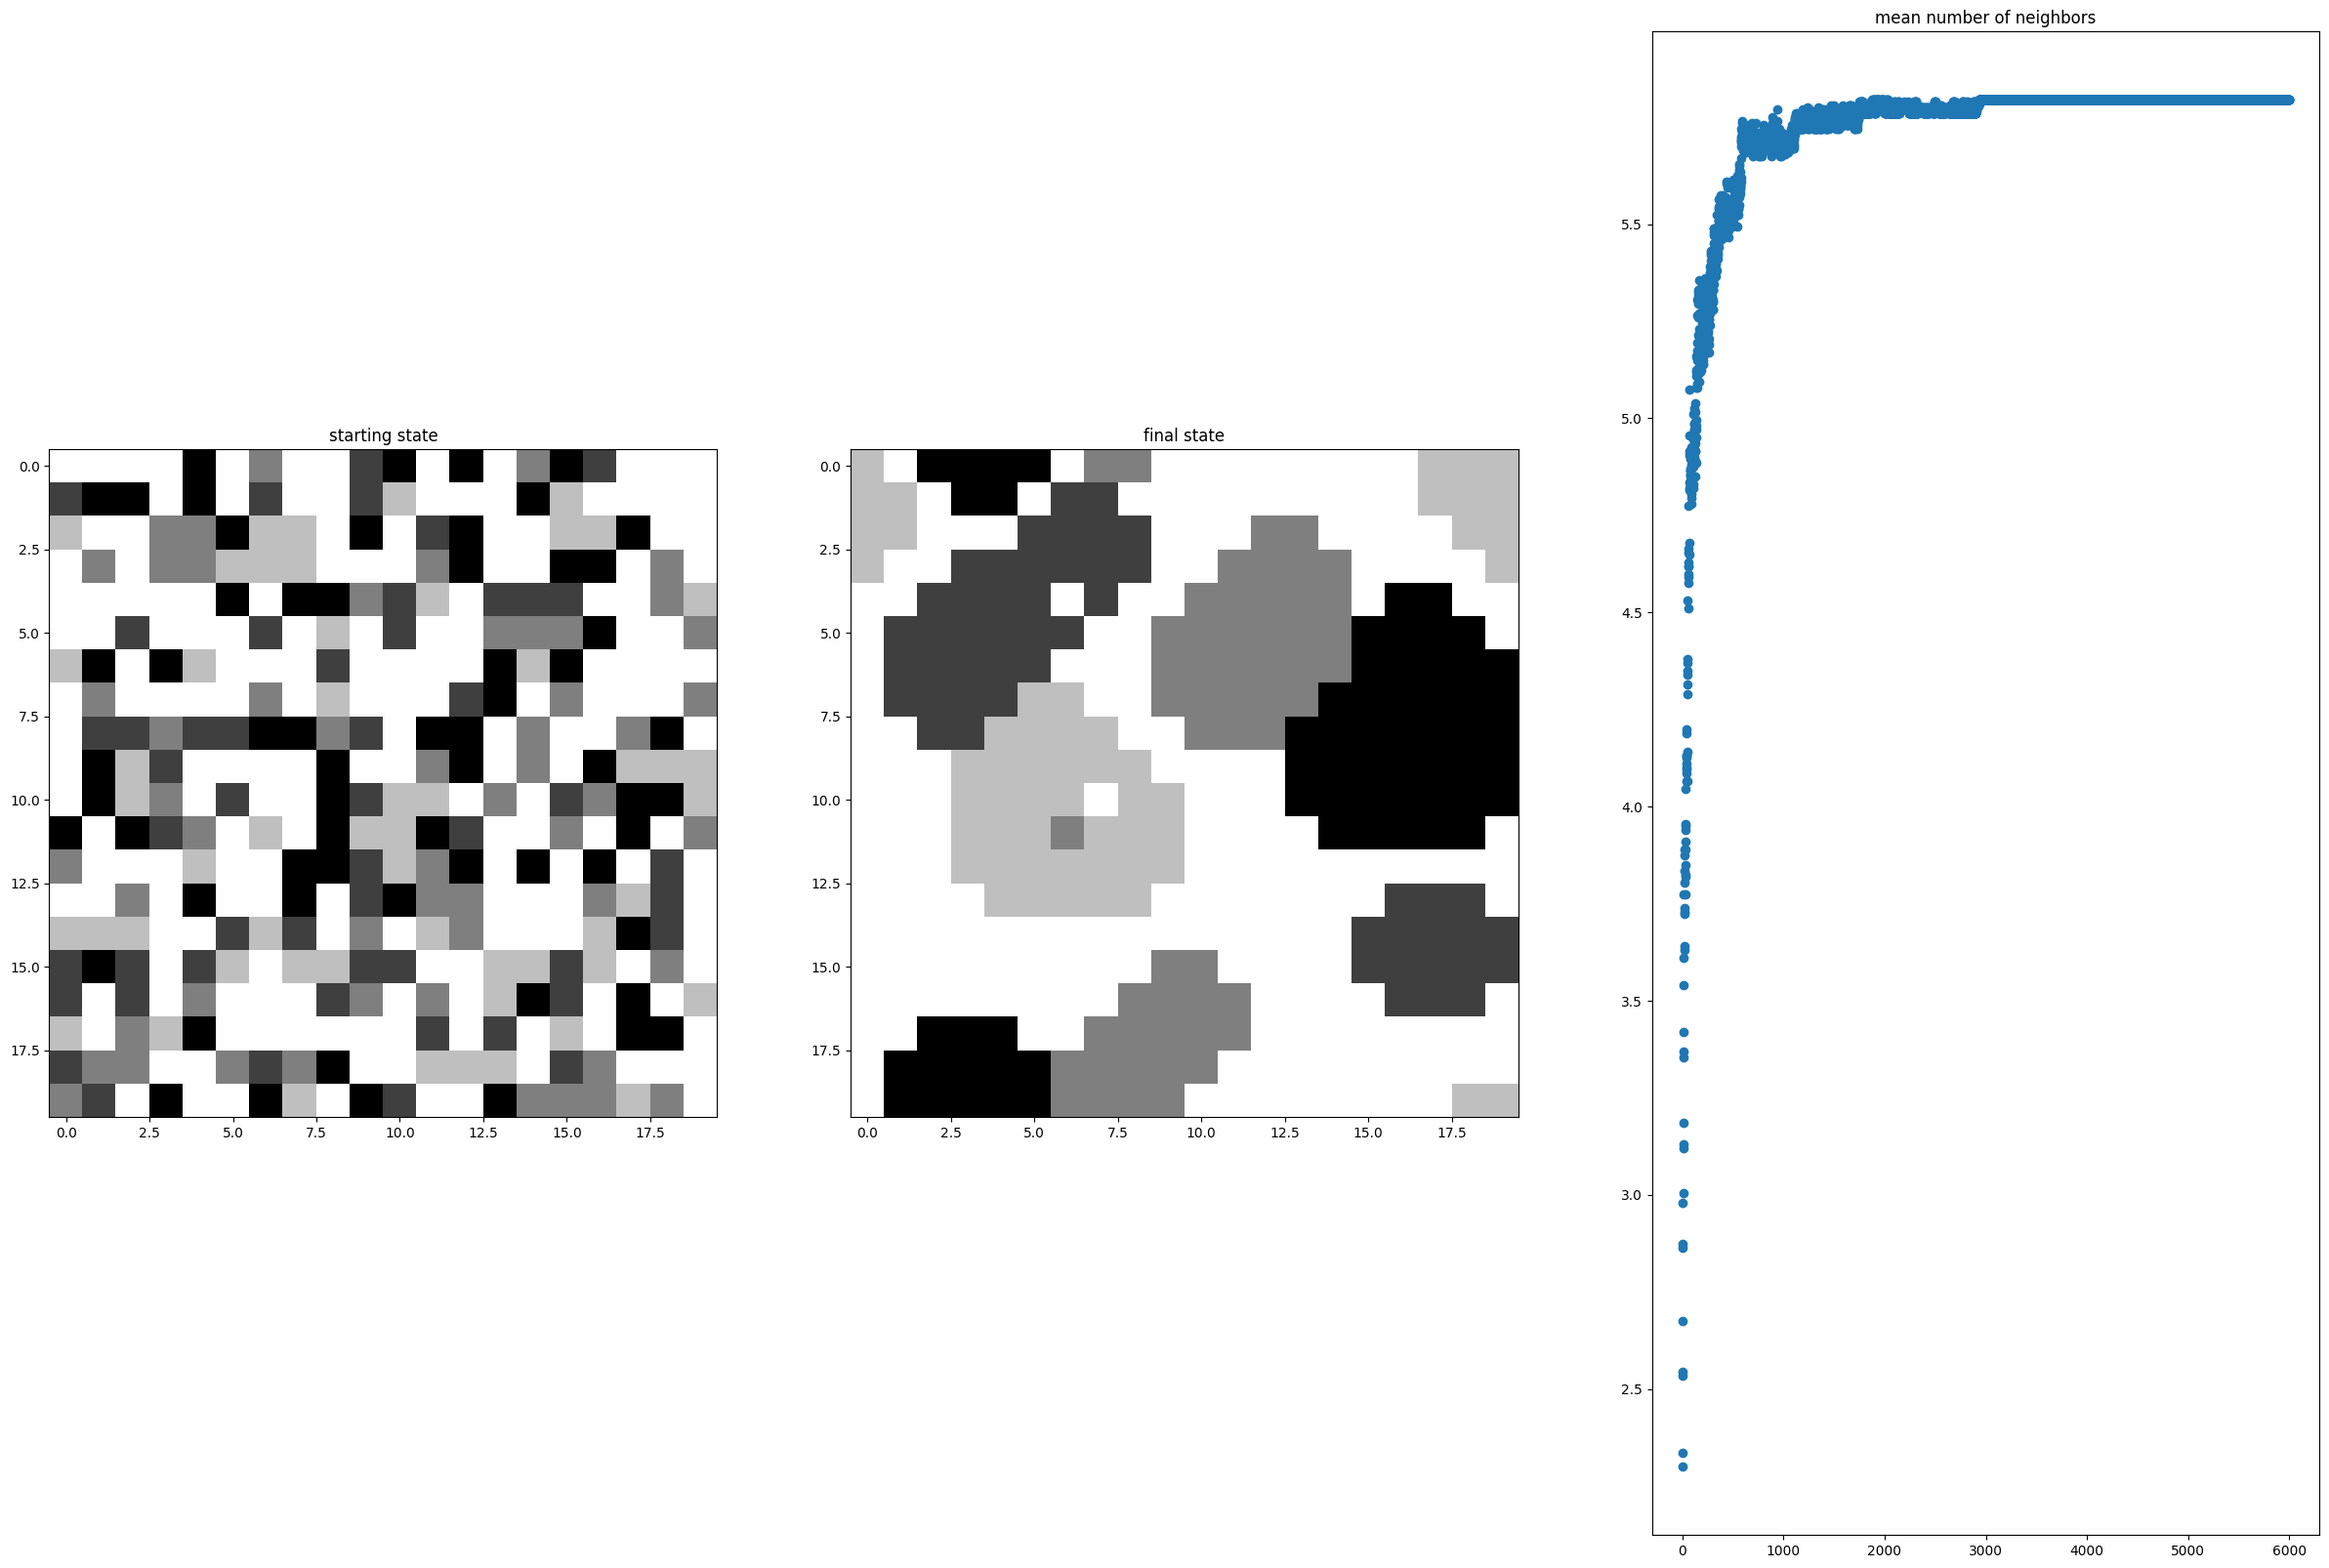

In [137]:
run_test2(*test_cases[10],it=6000)

L=20 p=0.65 a=4 t=4


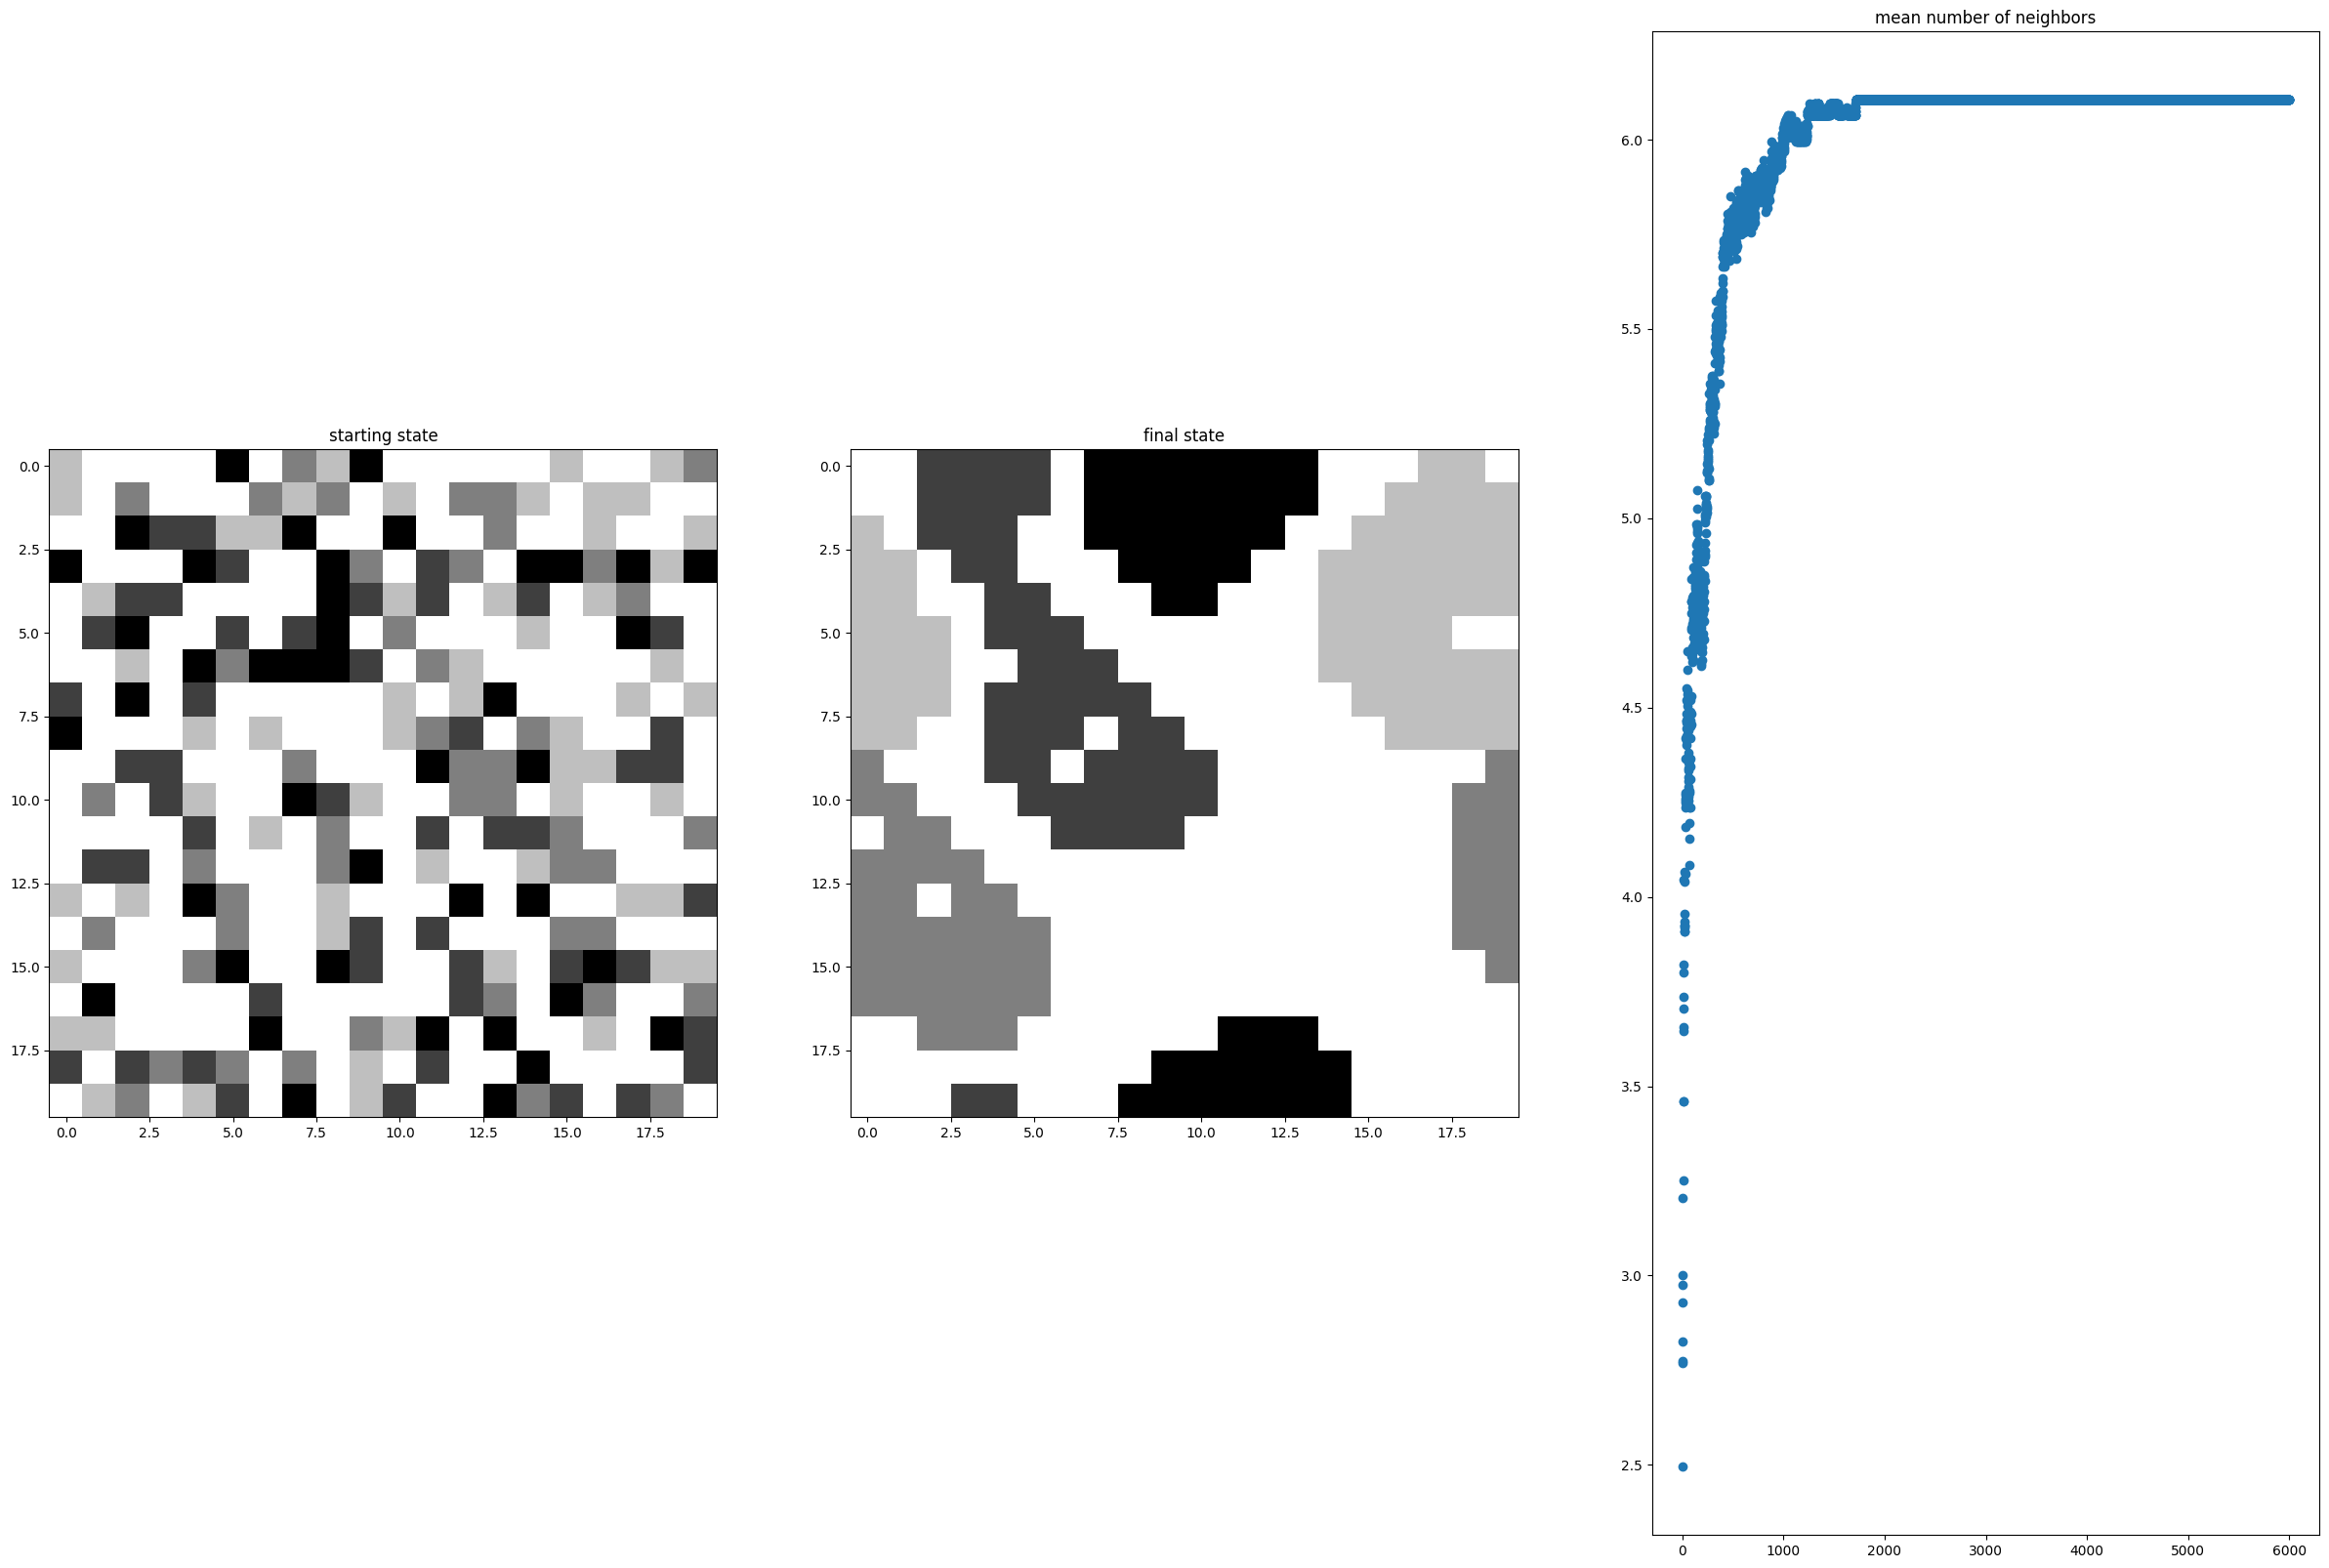

In [138]:
run_test2(*test_cases[11],it=6000)

L=80 p=0.35 a=4 t=4


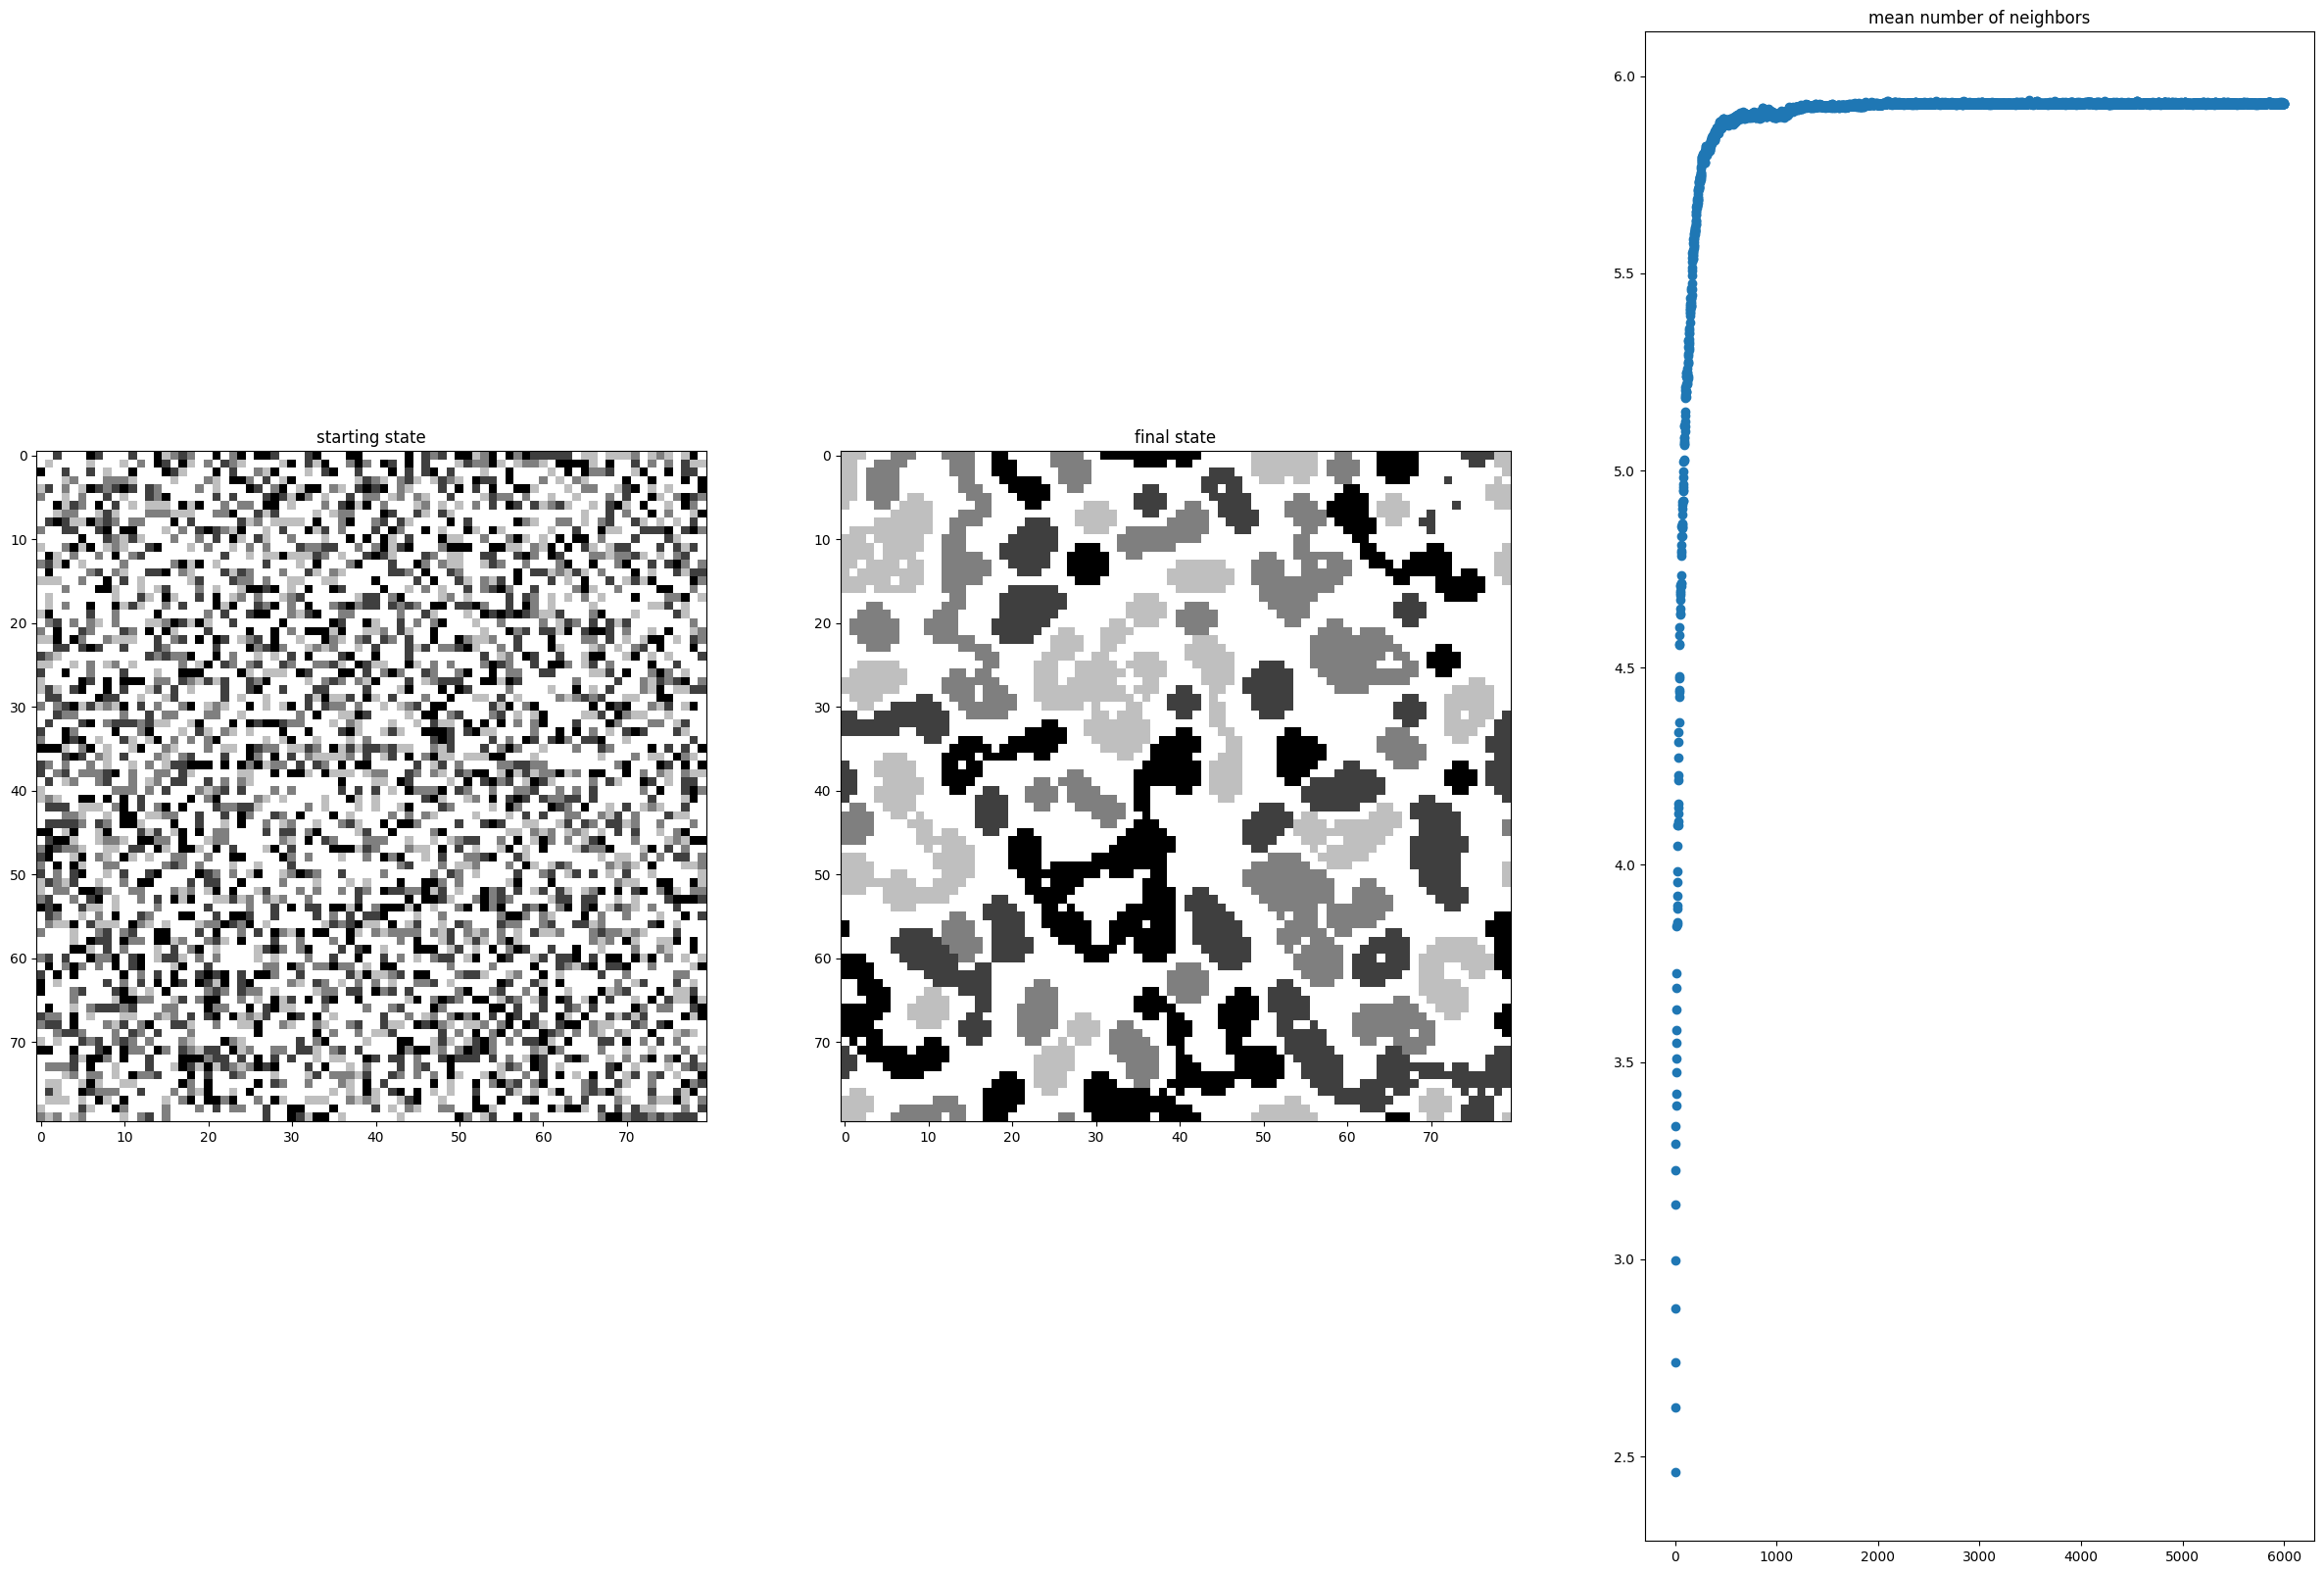

In [139]:
run_test2(*test_cases[12],it=6000)

L=80 p=0.5 a=4 t=4


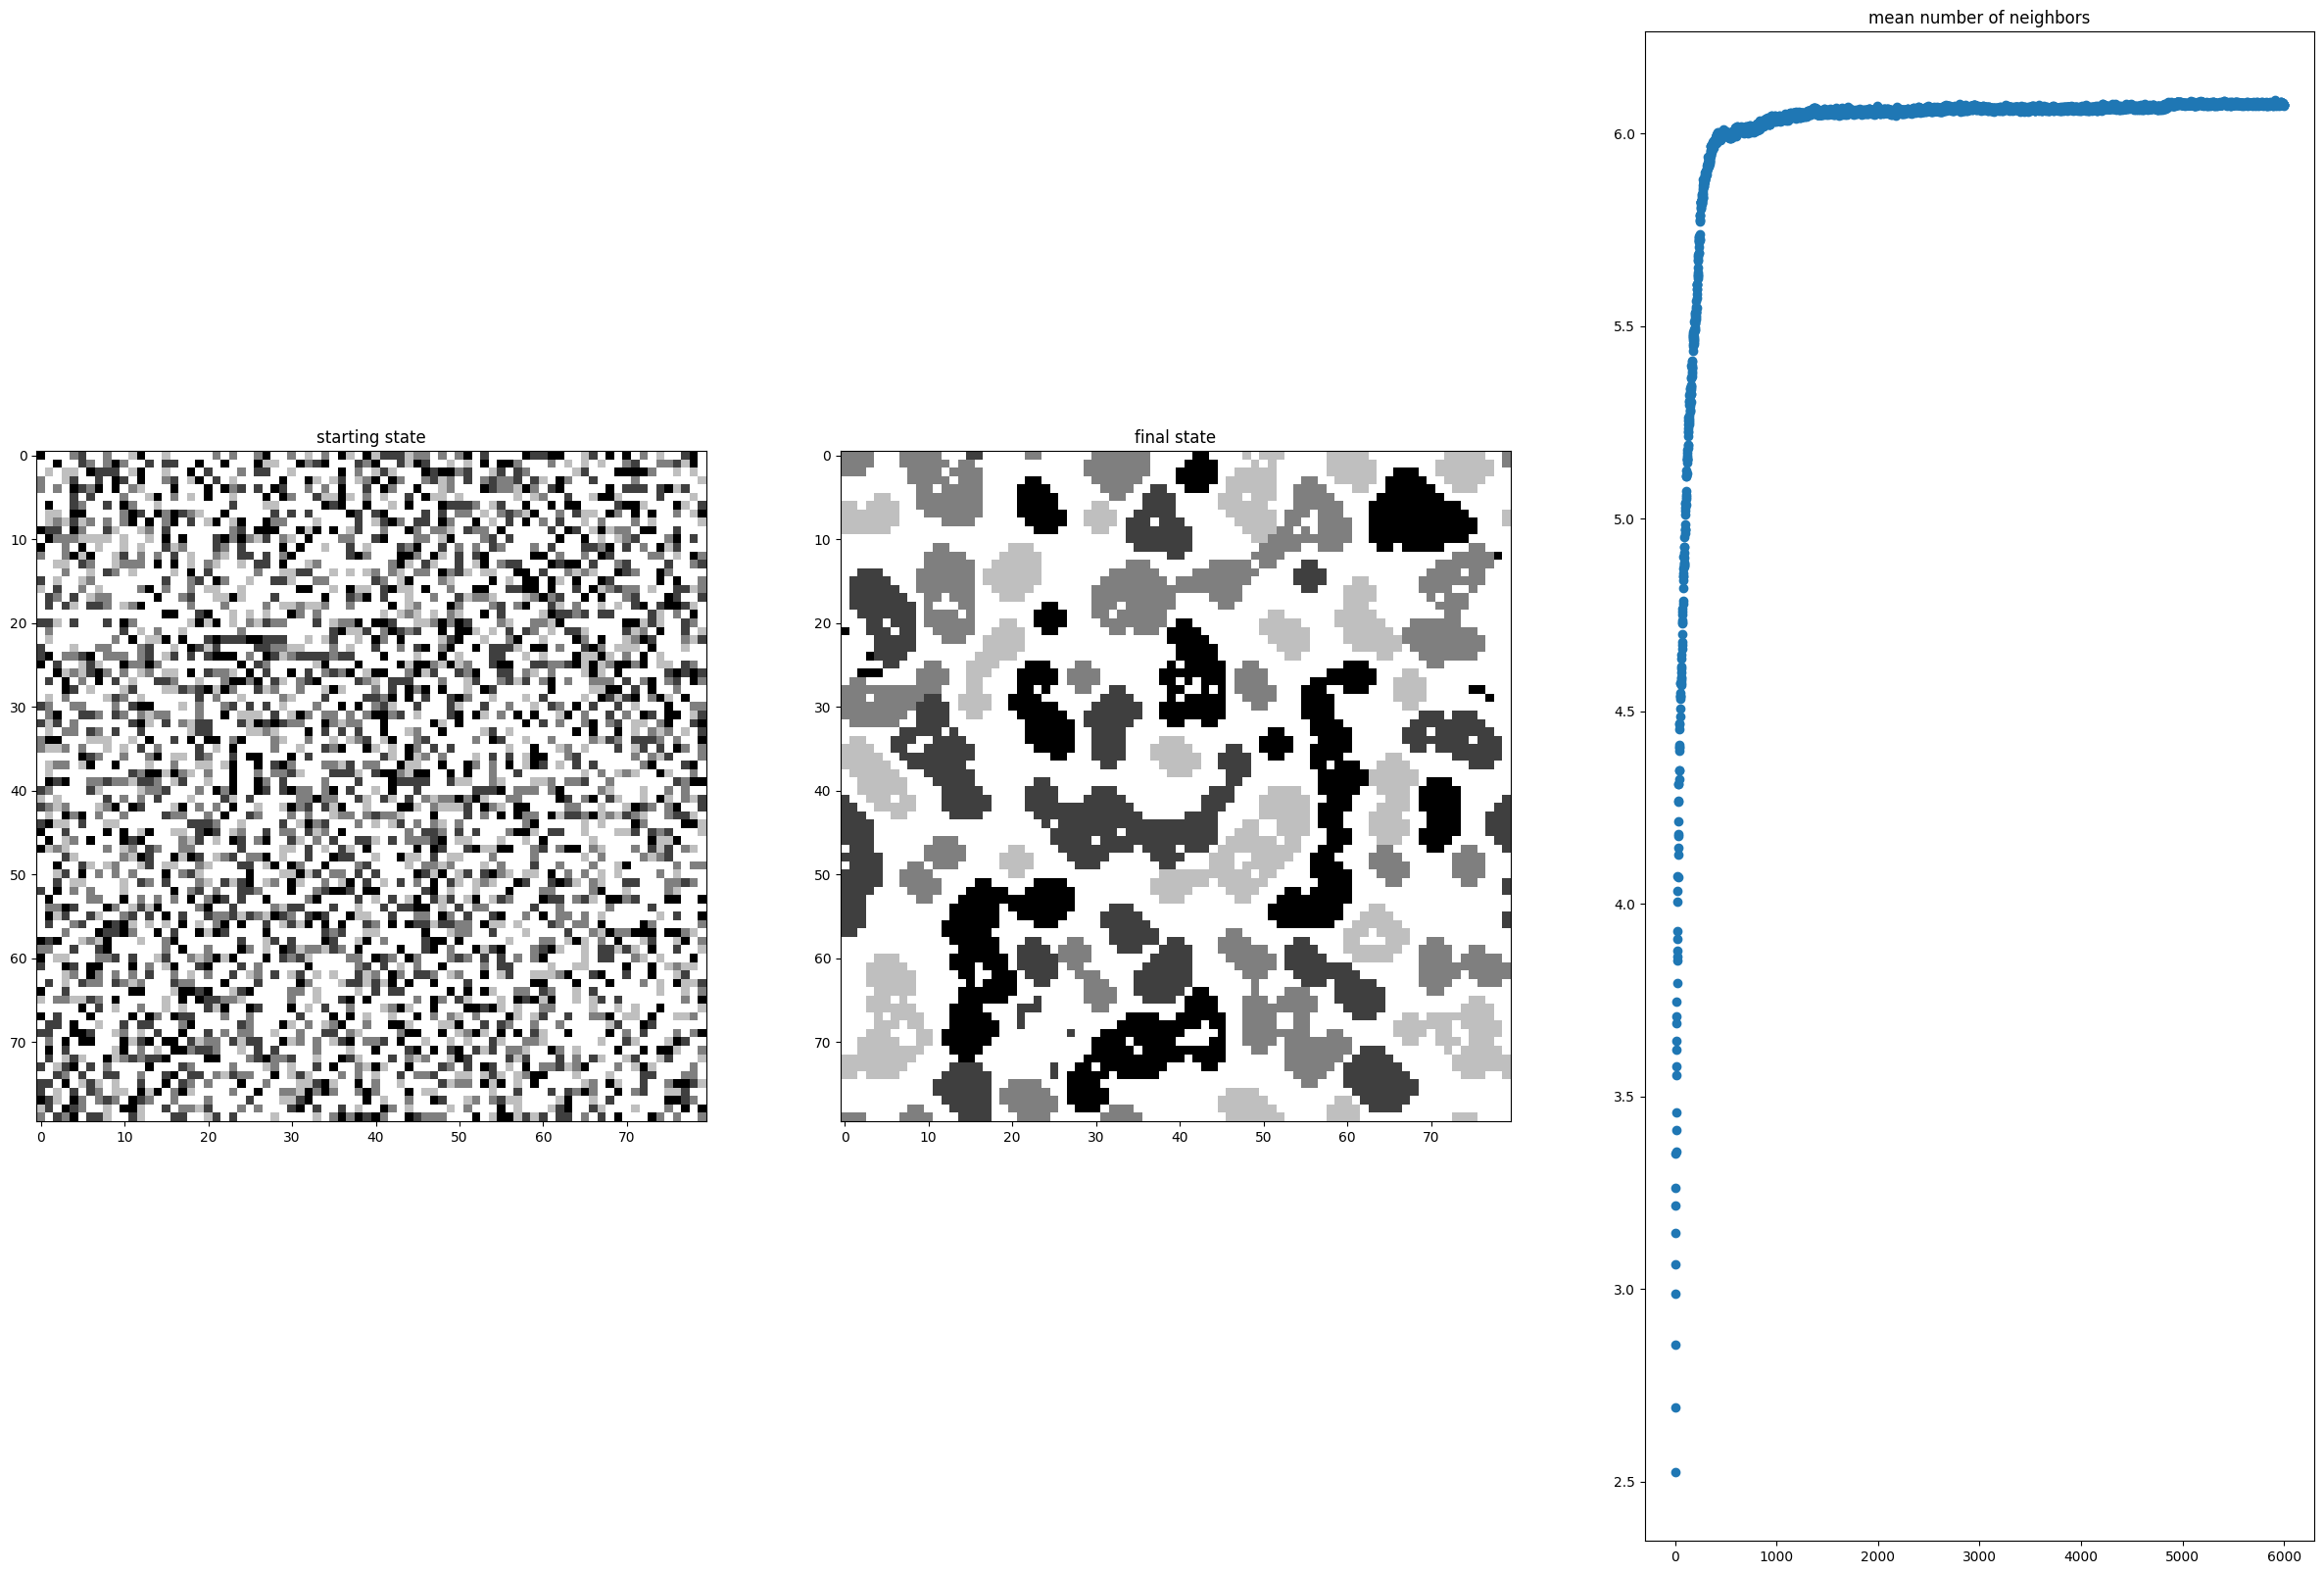

In [140]:
run_test2(*test_cases[13],it=6000)

L=80 p=0.65 a=4 t=4


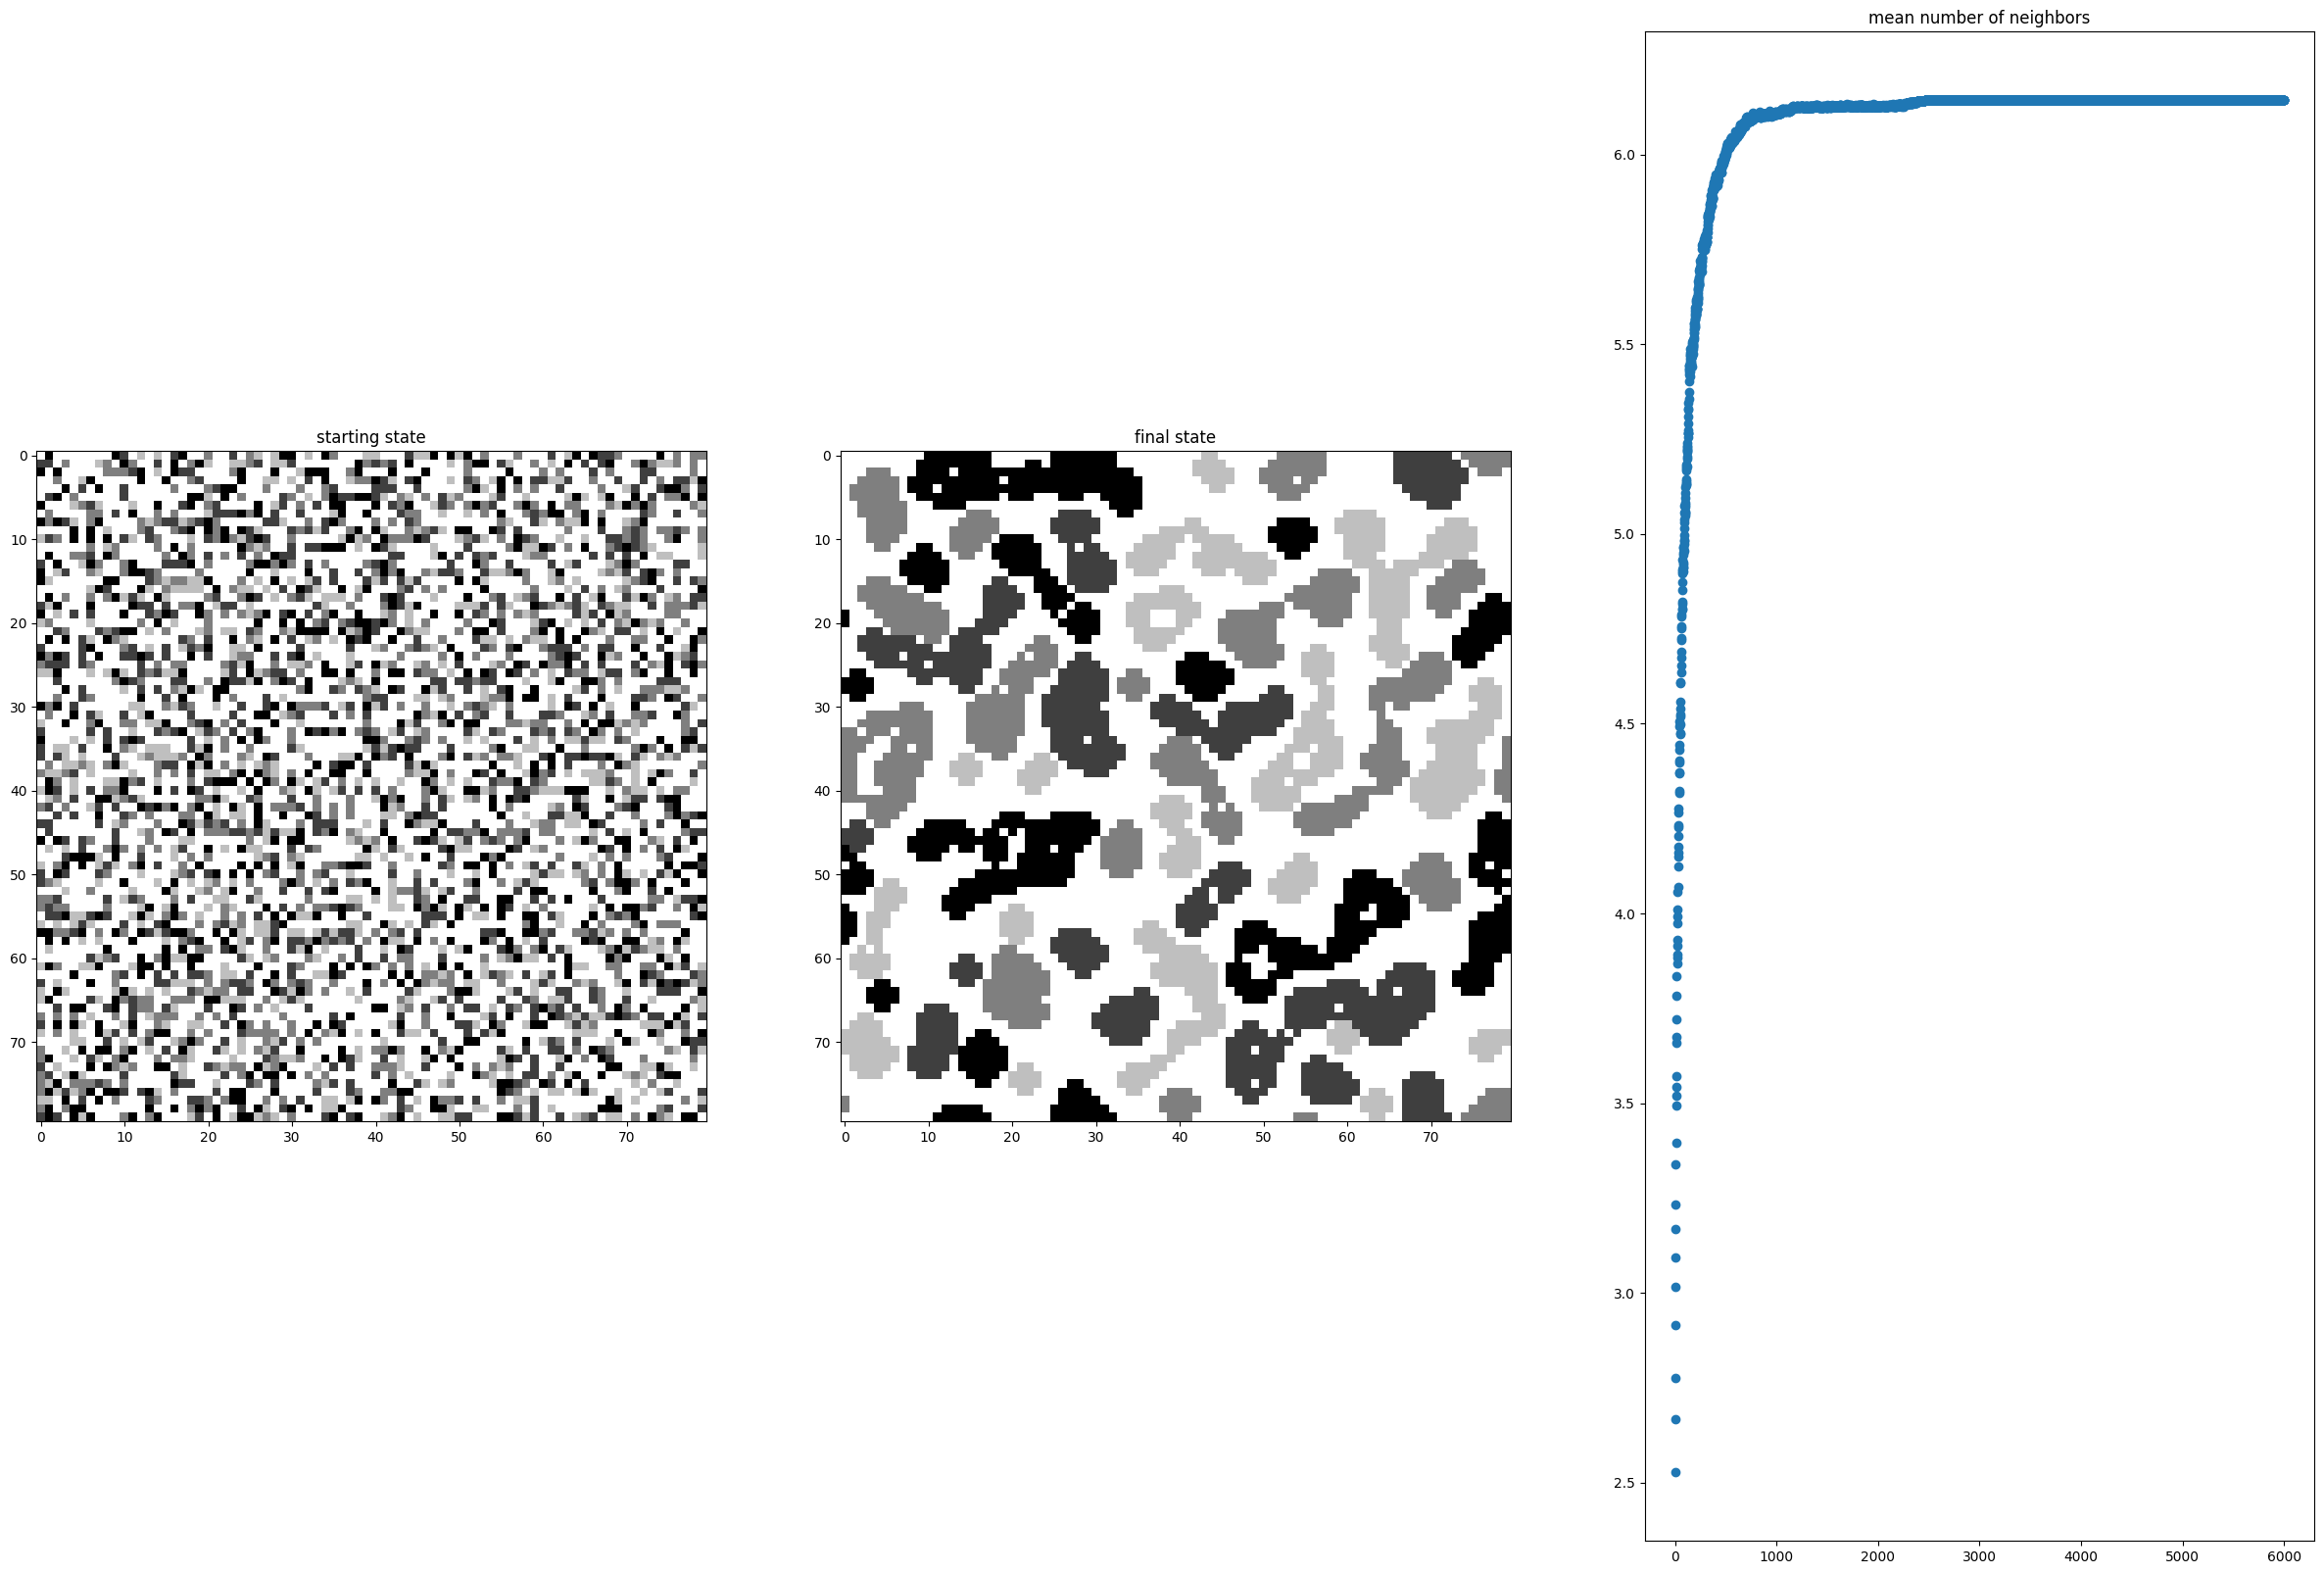

In [141]:
run_test2(*test_cases[14],it=6000)

L=200 p=0.35 a=4 t=4


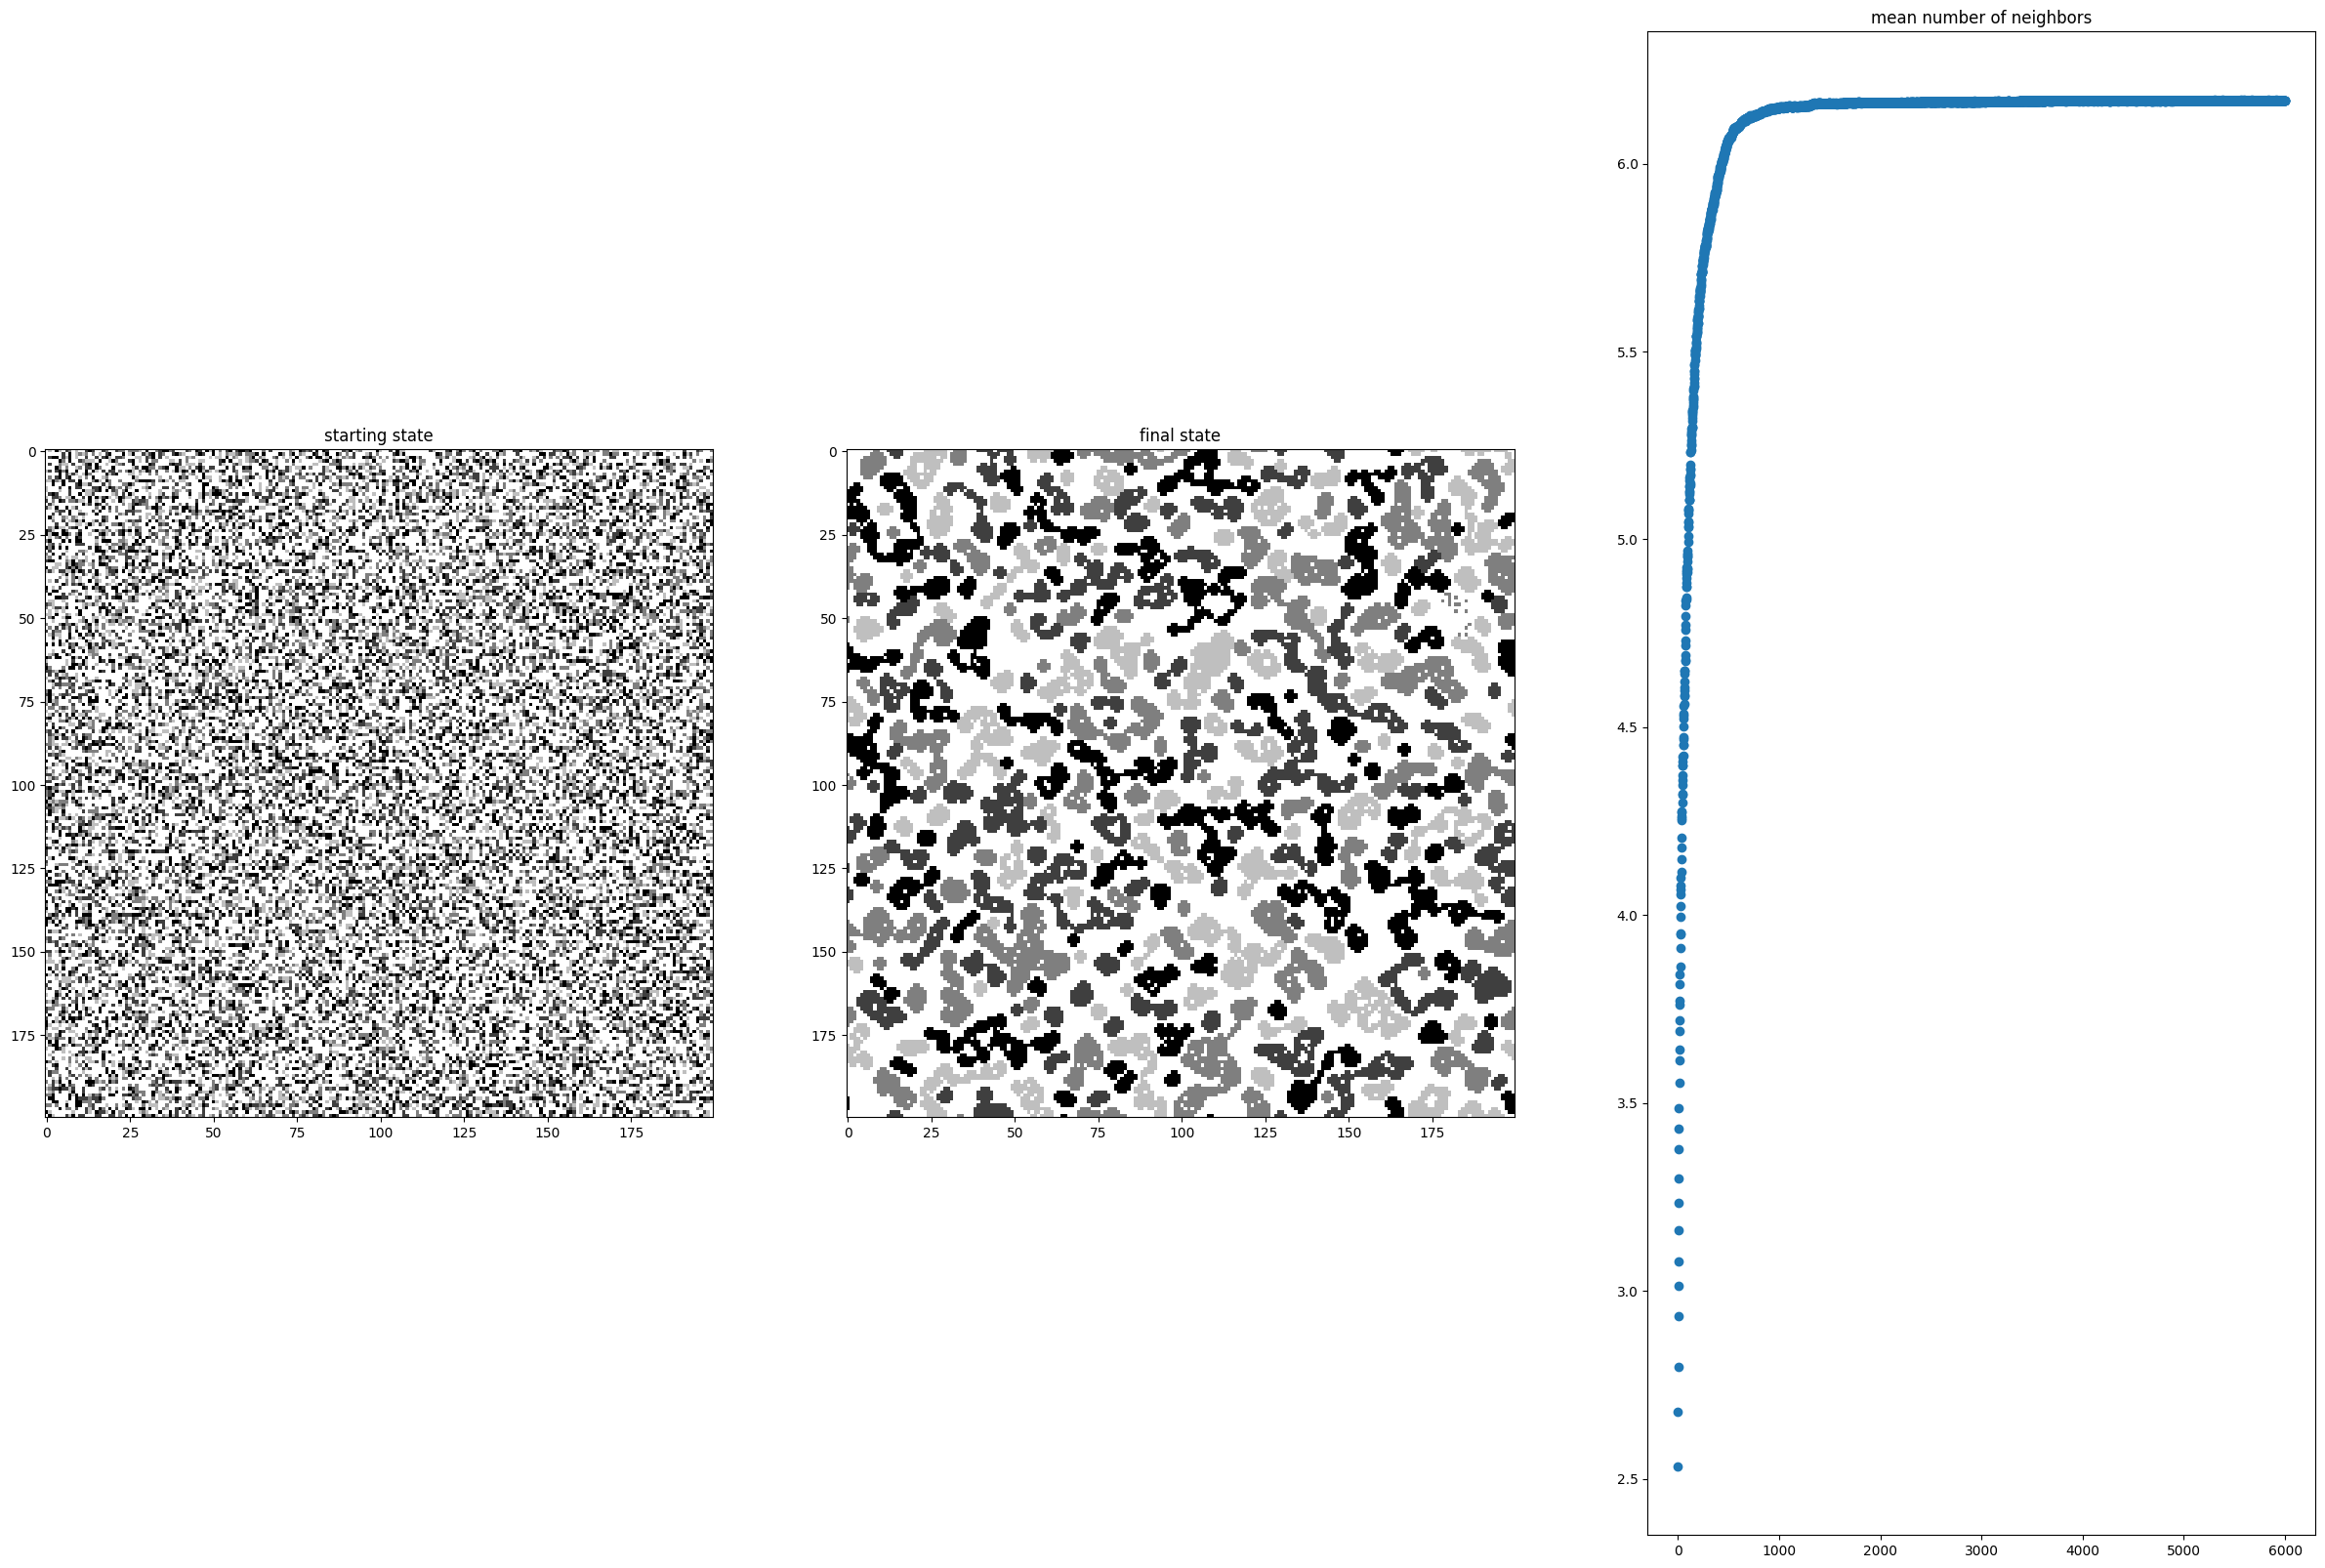

In [142]:
run_test2(*test_cases[15],it=6000)

L=200 p=0.5 a=4 t=4


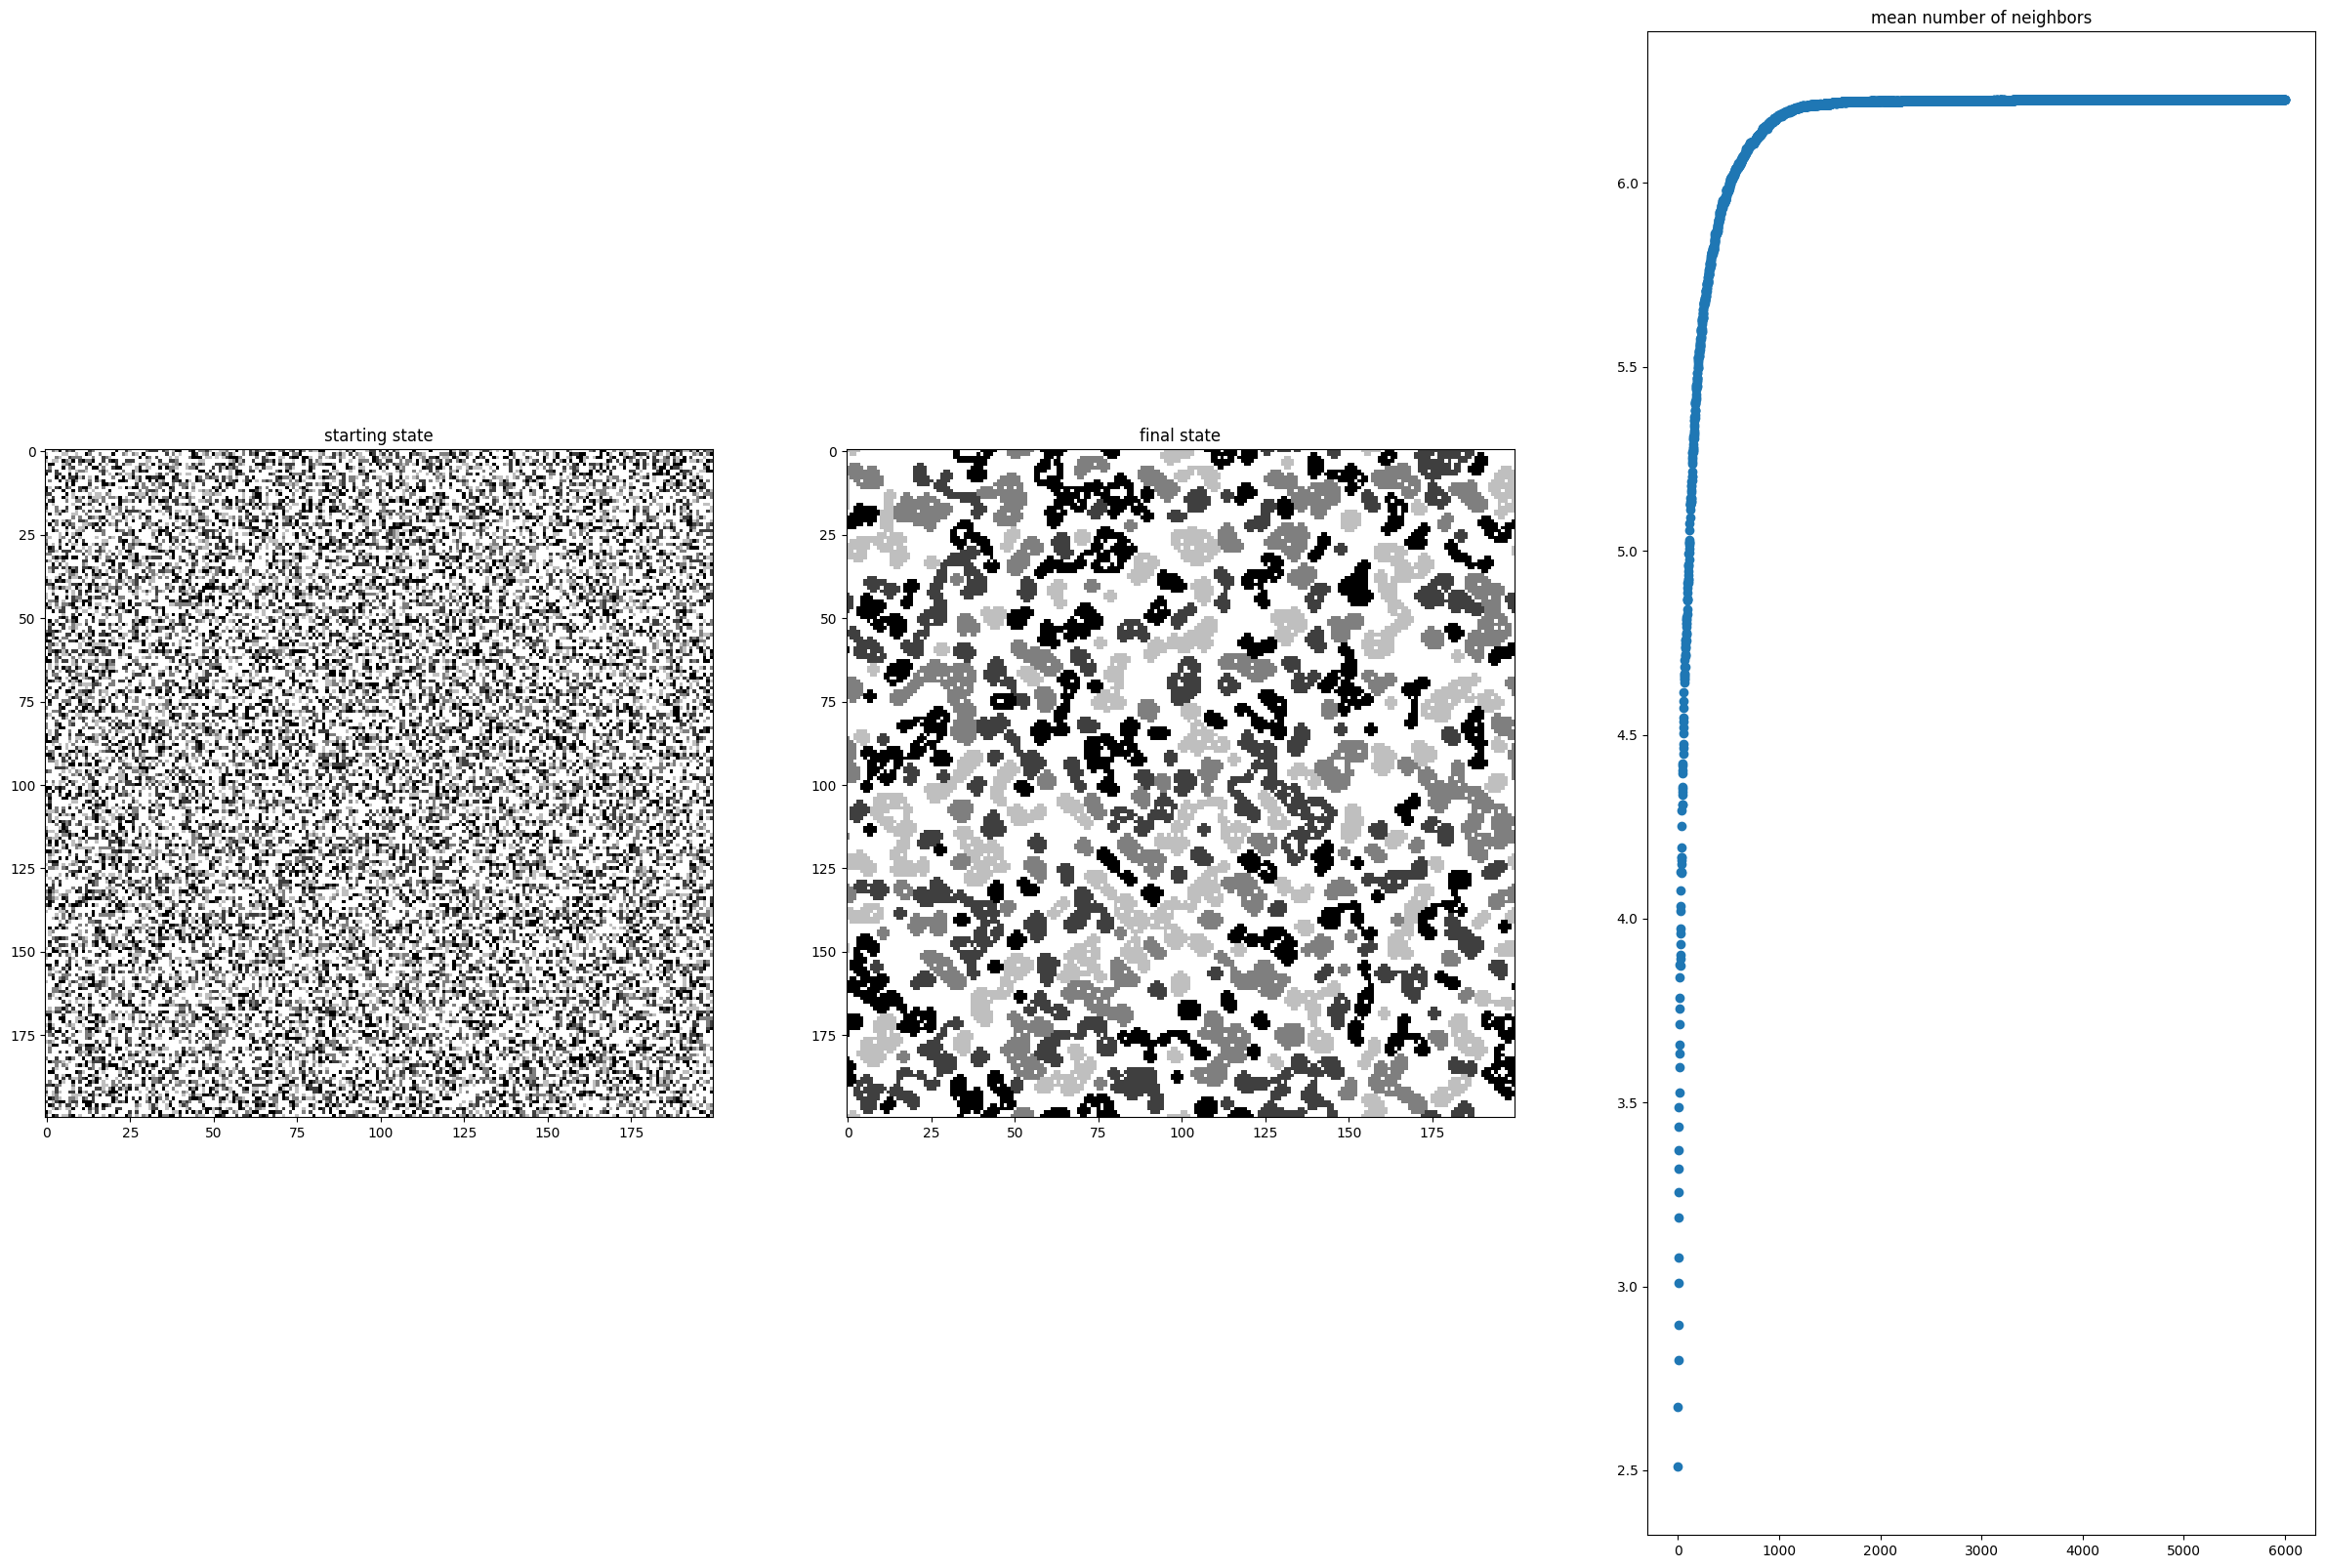

In [143]:
run_test2(*test_cases[16],it=6000)

L=200 p=0.65 a=4 t=4


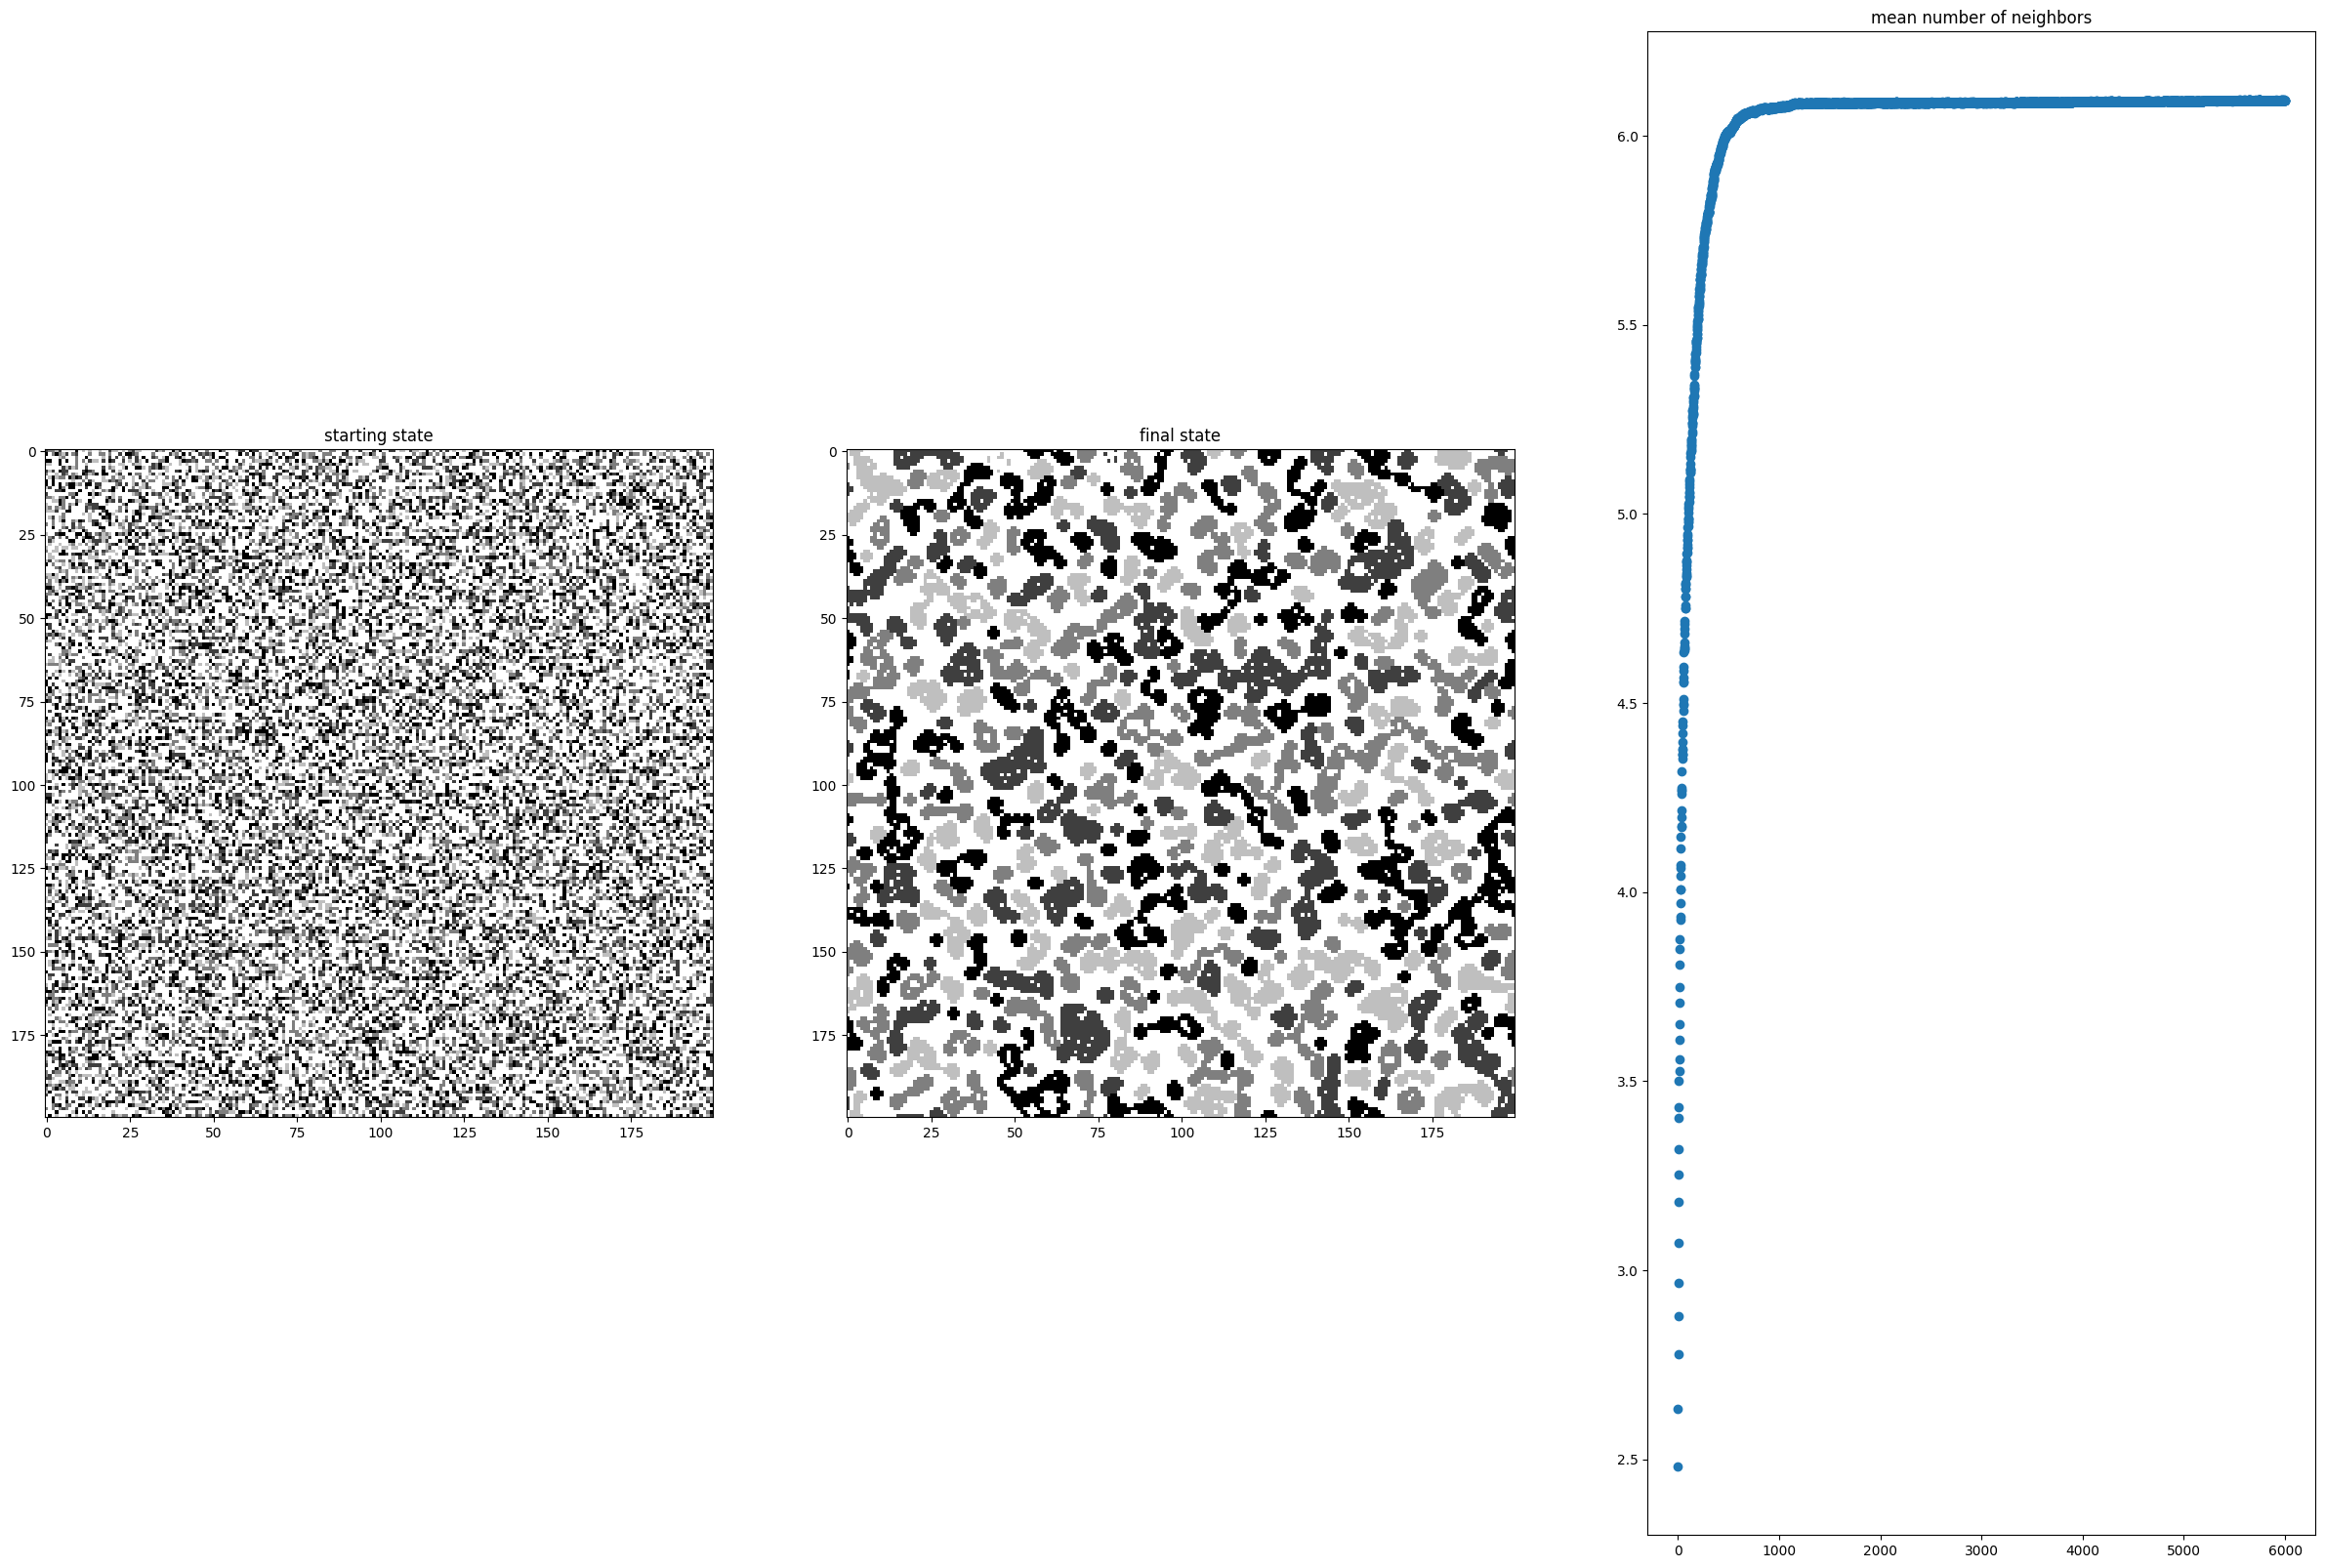

In [144]:
run_test2(*test_cases[17],it=6000)

Model Gaylorda - D’Andria cechuje się szybszą zbieżnością od modelu Schellinga - szczególnie w przypadku 4 klas. Dodatkowo wzory powstające w wyniku ewolucji modelu Gaylorda - D’Andria są nieco inne inż te generowane przez model Schellinga - "klastry" w modelu Schellinga są bardziej okrągłe podczas gdy w modelu Gaylorda - D'Andria są one bardziej wydłużone, oraz zawierają więcej "dziur" (pustych miejsc wewnątrz klastra).